In [2]:
# You can run this cell if you want to take a look at the individual components that go into the equations of motion
# but the next one has a super slow simplifying step, so avoid running that one if possible.
# The pickle containing the calculated and simplified expressions you need should be in the repo, so just start from the
# unpickling cell instead.

%reset
# DERIVE THE EOMs SYMBOLICALLY --------------------------------------------------------------------------------------------

# import libraries
import sympy as sym
import numpy as np

sym.init_printing()
from IPython.display import display #for pretty printing

# create symbolic variables

# system parameters

# b = body
# h = leg

g = sym.symbols('g')
mb,mn,mh1,mh2,mt = sym.symbols(['m_{b}','m_{n}','m_{h1}','m_{h2}','m_{t}']) # mass
lb,ln,lh1,lh2,lt = sym.symbols(['l_{b}','l_{n}','l_{h1}','l_{h2}','l_{t}']) # length
Inb,Inn,Inh1,Inh2,Int = sym.symbols(['In_{b}','In_{n}','In_{h1}','In_{h2}','In_{t}']) # mass
ks = sym.symbols('ks')   #spring constant
kd = sym.symbols('kd')   #spring constant

# generalized coordinates

# x, y = torso COM position
# thb = body angle ccw from X
# thf1, thf2, thh1, thh2 = angles ccw from parent link (aka shoulder, elbow, hip, knee)

sides = ['R','L']
x,y,thb,thn,tht = sym.symbols(['x','y','\\theta_{b}','\\theta_{n}','\\theta_{t}']) 
dx,dy,dthb,dthn,dtht = sym.symbols(['\dot{x}','\dot{y}','\dot{\\theta}_{b}','\dot{\\theta}_{n}','\dot{\\theta}_{t}']) 
ddx,ddy,ddthb,ddthn,ddtht = sym.symbols(['\ddot{x}','\ddot{y}','\ddot{\\theta}_{b}','\ddot{\\theta}_{n}','\ddot{\\theta}_{t}']) 


thh1  = [sym.symbols('\\theta_{h1%s}'%sides[i]) for i in range(len(sides))]
thh2  = [sym.symbols('\\theta_{h2%s}'%sides[i]) for i in range(len(sides))]


dthh1  = [sym.symbols('\dot{\\theta}_{h1%s}'%sides[i]) for i in range(len(sides))]
dthh2  = [sym.symbols('\dot{\\theta}_{h2%s}'%sides[i]) for i in range(len(sides))]


ddthh1  = [sym.symbols('\ddot{\\theta}_{h1%s}'%sides[i]) for i in range(len(sides))]
ddthh2  = [sym.symbols('\ddot{\\theta}_{h2%s}'%sides[i]) for i in range(len(sides))]

# q = sym.Matrix([x]+[y]+[thb]+thf1+thf2+thh1+thh2)
# dq = sym.Matrix([dx]+[dy]+[dthb]+dthf1+dthf2+dthh1+dthh2)
# ddq = sym.Matrix([ddx]+[ddy]+[ddthb]+ddthf1+ddthf2+ddthh1+ddthh2)

q = sym.Matrix([x]+[y]+[thb]+[thn]+[tht]+thh1+thh2)
dq = sym.Matrix([dx]+[dy]+[dthb]+[dthn]+[dtht]+dthh1+dthh2)
ddq = sym.Matrix([ddx]+[ddy]+[ddthb]+[ddthn]+[ddtht]+ddthh1+ddthh2)

# forces
# tauf1  = [sym.symbols('\\tau_{f1%s}'%sides[i]) for i in range(len(sides))]
# tauf2  = [sym.symbols('\\tau_{f2%s}'%sides[i]) for i in range(len(sides))]
taut,taun,GRFx,GRFy = sym.symbols(['\\taut','\\taun','GRFx','GRFy']) 


tauh1  = [sym.symbols('\\tau_{h1%s}'%sides[i]) for i in range(len(sides))]
tauh2  = [sym.symbols('\\tau_{h2%s}'%sides[i]) for i in range(len(sides))]

# Gxf  = [sym.symbols('G_{xf%s}'%sides[i]) for i in range(len(sides))]
# Gyf  = [sym.symbols('G_{yf%s}'%sides[i]) for i in range(len(sides))]
Gxh  = [sym.symbols('G_{xh%s}'%sides[i]) for i in range(len(sides))]
Gyh  = [sym.symbols('G_{yh%s}'%sides[i]) for i in range(len(sides))]


rb = sym.Matrix([[x+0.5*lb*sym.cos(thb)],
                [y+0.5*lb*sym.sin(thb)],
                [thb]])      ##center of mass of body

rn = sym.Matrix([[x+lb*sym.cos(thb)+0.2*sym.cos(thb+thn)],
                [y+lb*sym.sin(thb)+0.2*sym.sin(thb+thn)],
                [thb+thn]])      ##center of mass of body


rt = sym.Matrix([[x-0.43*sym.cos(thb+tht)],
                [y-0.43*sym.sin(thb+tht)],
                 [thb+tht]])        ##tail center of mass


rh1 = []       ##center of mass of "thigh"
rh2 = []      ##center of mass of "lower-leg section


p_knee = []      #position of knee
p_hip = []       #position of hip
p_footh = []    #position of foot


Jb = rb.jacobian(q) # jacobians
Jn = rn.jacobian(q)
Jt = rt.jacobian(q)
Jh1 = []
Jh2 = []


vb = Jb*dq # velocities
vn = Jn*dq # velocities
vt = Jt*dq
vh1 = []
vh2 = []
v_footh = []

for i in range(len(sides)):
    p_hip.append(sym.Matrix([[x],
                            [y]]))
    
    rh1.append(sym.Matrix([[p_hip[i][0] + 0.5*lh1*sym.sin(thb+thh1[i])],
                          [p_hip[i][1] - 0.5*lh1*sym.cos(thb+thh1[i])],
                          [thb+thh1[i]]]))
    
    p_knee.append(sym.Matrix([[p_hip[i][0] + lh1*sym.sin(thb+thh1[i])],
                            [p_hip[i][1] - lh1*sym.cos(thb+thh1[i])]]))
    
    rh2.append(sym.Matrix([[p_knee[i][0] + 0.5*lh2*sym.sin(thb+thh1[i]+thh2[i])],
                          [p_knee[i][1] - 0.5*lh2*sym.cos(thb+thh1[i]+thh2[i])],
                          [thb+thh1[i]+thh2[i]]]))
    
    p_footh.append(sym.Matrix([[p_knee[i][0] + lh2*sym.sin(thb+thh1[i]+thh2[i])],
                            [p_knee[i][1] - lh2*sym.cos(thb+thh1[i]+thh2[i])]]))
    
    Jh1.append(rh1[i].jacobian(q))
    Jh2.append(rh2[i].jacobian(q))
    
    vh1.append(Jh1[i]*dq)
    vh2.append(Jh2[i]*dq)
    v_footh.append(p_footh[i].jacobian(q)*dq)
    
Mb = sym.Matrix([[mb,mb,Inb]])
Mn = sym.Matrix([[mn,mn,Inn]])
Mt = sym.Matrix([[mt,mt,Int]])
Mh1 = sym.Matrix([[mh1,mh1,Inh1]])
Mh2 = sym.Matrix([[mh2,mh2,Inh2]])
T = 0.5*Mb*sym.matrix_multiply_elementwise(vb,vb)+0.5*Mt*sym.matrix_multiply_elementwise(vt,vt)+0.5*Mn*sym.matrix_multiply_elementwise(vn,vn)
V = mb*g*rb[1]+mt*g*rt[1]+mn*g*rn[1]

for i in range(len(sides)):
    T += 0.5*Mh1*sym.matrix_multiply_elementwise(vh1[i],vh1[i]) + \
    0.5*Mh2*sym.matrix_multiply_elementwise(vh2[i],vh2[i]) 
   
    V += mh1*g*rh1[i][1] + \
    mh2*g*rh2[i][1] 
######   
# STEP 4: partials of T and V ----------------------------------------------------------------------------------------------
# term 1
Lg1 = sym.zeros(len(q),1)
for i in range(len(q)):
    dT_ddq = sym.Matrix([sym.diff(T,dq[i])]) # get partial of T in dq_i
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq #...then get time derivative of that partial

# term 3
Lg3 = sym.Matrix([T]).jacobian(q).transpose() # partial of T in q

# term 4
Lg4 = sym.Matrix([V]).jacobian(q).transpose() # partial of U in q

# STEP 5: generalized forces -----------------------------------------------------------------------------------------------
tau_n_b = sym.Matrix([[0],[0],[-taun]])
tau_n_n = sym.Matrix([[0],[0],[taun]])
tau_t_b = sym.Matrix([[0],[0],[-taut]])
tau_t_t = sym.Matrix([[0],[0],[taut]])
tau_h1_b = sym.Matrix([[0],[0],[-sum(tauh1)]])
tau_h1_h1 = [sym.Matrix([[0],[0],[tauh1[i]]]) for i in range(len(sides))]
tau_h2_h1 = [sym.Matrix([[0],[0],[-tauh2[i]]]) for i in range(len(sides))]
tau_h2_h2 = [sym.Matrix([[0],[0],[tauh2[i]]]) for i in range(len(sides))]

GRF_h2 = [sym.Matrix([[Gxh[i]],
                    [Gyh[i]],
                    [Gxh[i]*0.5*lh2*sym.cos(thh2[i])+Gyh[i]*0.5*lh2*sym.sin(thh2[i])]]) for i in range(len(sides))]

Q = sym.zeros(len(q),1)
for j in range(len(q)):
    Qj = (tau_h1_b+tau_t_b+tau_n_b).transpose()*Jb[:,j]+ (tau_t_t).transpose()*Jt[:,j]+ (tau_n_n).transpose()*Jn[:,j]
    for i in range(len(sides)):
        Qj += (tau_h1_h1[i]+tau_h2_h1[i]).transpose()*Jh1[i][:,j] +\
        (tau_h2_h2[i]+GRF_h2[i]).transpose()*Jh2[i][:,j]
    Q[j] = Qj[0]
        
#AND combine!
EOM = Lg1 - Lg3 + Lg4 - Q

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# TAKES FOREVER. DO NOT RERUN UNLESS YOU ABSOLUTELY HAVE TO.
EOMs = sym.zeros(7,1)
ind = [0,1,2,3,4,5,7]


for j in range(7):
    EOMs[j] = EOM[ind[j]].simplify()

p_footh_s = sym.zeros(2,1)
v_footh_s = sym.zeros(2,1)

for j in range(2):
    p_footh_s[j] = p_footh[0][j].simplify()
    v_footh_s[j] = v_footh[0][j].simplify()

In [44]:
# Saving equations of motion so you don't have to generate them again
import pickle as pkl

data = {"EOM":EOMs,
       "pfooth":p_footh_s,
       "vfooth":v_footh_s}

outfile = open('Raptor - 2seg -unactuated tail','wb')
pkl.dump(data,outfile)
outfile.close()

In [2]:
# UNPICKLE (start here if you have saved EOM's to use instead)
import pickle as pkl
import sympy as sym
import numpy as np

infile = open('Raptor - 2seg -unactuated tail','rb')
data = pkl.load(infile)
infile.close()

EOMs = data['EOM']
p_footh_s = data['pfooth']
v_footh_s = data['vfooth']

g = sym.symbols('g')
mb,mn,mh1,mh2,mt = sym.symbols(['m_{b}','m_{n}','m_{h1}','m_{h2}','m_{t}']) # mass
lb,ln,lh1,lh2,lt = sym.symbols(['l_{b}','l_{n}','l_{h1}','l_{h2}','l_{t}']) # length
Inb,Inn,Inh1,Inh2,Int = sym.symbols(['In_{b}','In_{n}','In_{h1}','In_{h2}','In_{t}']) # mass
ks = sym.symbols('ks')   #spring constant
kd = sym.symbols('kd')   #spring constant

# generalized coordinates

# x, y = torso COM position
# thb = body angle ccw from X
# thf1, thf2, thh1, thh2 = angles ccw from parent link (aka shoulder, elbow, hip, knee)

sides = ['R','L']
x,y,thb,thn,tht = sym.symbols(['x','y','\\theta_{b}','\\theta_{n}','\\theta_{t}']) 
dx,dy,dthb,dthn,dtht = sym.symbols(['\dot{x}','\dot{y}','\dot{\\theta}_{b}','\dot{\\theta}_{n}','\dot{\\theta}_{t}']) 
ddx,ddy,ddthb,ddthn,ddtht = sym.symbols(['\ddot{x}','\ddot{y}','\ddot{\\theta}_{b}','\ddot{\\theta}_{n}','\ddot{\\theta}_{t}']) 


thh1  = [sym.symbols('\\theta_{h1%s}'%sides[i]) for i in range(len(sides))]
thh2  = [sym.symbols('\\theta_{h2%s}'%sides[i]) for i in range(len(sides))]


dthh1  = [sym.symbols('\dot{\\theta}_{h1%s}'%sides[i]) for i in range(len(sides))]
dthh2  = [sym.symbols('\dot{\\theta}_{h2%s}'%sides[i]) for i in range(len(sides))]


ddthh1  = [sym.symbols('\ddot{\\theta}_{h1%s}'%sides[i]) for i in range(len(sides))]
ddthh2  = [sym.symbols('\ddot{\\theta}_{h2%s}'%sides[i]) for i in range(len(sides))]

# q = sym.Matrix([x]+[y]+[thb]+thf1+thf2+thh1+thh2)
# dq = sym.Matrix([dx]+[dy]+[dthb]+dthf1+dthf2+dthh1+dthh2)
# ddq = sym.Matrix([ddx]+[ddy]+[ddthb]+ddthf1+ddthf2+ddthh1+ddthh2)

q = sym.Matrix([x]+[y]+[thb]+[thn]+[tht]+thh1+thh2)
dq = sym.Matrix([dx]+[dy]+[dthb]+[dthn]+[dtht]+dthh1+dthh2)
ddq = sym.Matrix([ddx]+[ddy]+[ddthb]+[ddthn]+[ddtht]+ddthh1+ddthh2)

# forces
# tauf1  = [sym.symbols('\\tau_{f1%s}'%sides[i]) for i in range(len(sides))]
# tauf2  = [sym.symbols('\\tau_{f2%s}'%sides[i]) for i in range(len(sides))]
taut,taun,GRFx,GRFy = sym.symbols(['\\taut','\\taun','GRFx','GRFy']) 


tauh1  = [sym.symbols('\\tau_{h1%s}'%sides[i]) for i in range(len(sides))]
tauh2  = [sym.symbols('\\tau_{h2%s}'%sides[i]) for i in range(len(sides))]

# Gxf  = [sym.symbols('G_{xf%s}'%sides[i]) for i in range(len(sides))]
# Gyf  = [sym.symbols('G_{yf%s}'%sides[i]) for i in range(len(sides))]
Gxh  = [sym.symbols('G_{xh%s}'%sides[i]) for i in range(len(sides))]
Gyh  = [sym.symbols('G_{yh%s}'%sides[i]) for i in range(len(sides))]


In [3]:
EOMs[3]

1.0*In_{n}*\ddot{\theta}_{b} + 1.0*In_{n}*\ddot{\theta}_{n} + 0.2*\ddot{\theta}_{b}*l_{b}*m_{n}*cos(\theta_{n}) + 0.04*\ddot{\theta}_{b}*m_{n} + 0.04*\ddot{\theta}_{n}*m_{n} - 0.2*\ddot{x}*m_{n}*sin(\theta_{b} + \theta_{n}) + 0.2*\ddot{y}*m_{n}*cos(\theta_{b} + \theta_{n}) + 0.2*\dot{\theta}_{b}**2*l_{b}*m_{n}*sin(\theta_{n}) - 1.0*\taun + 0.2*g*m_{n}*cos(\theta_{b} + \theta_{n})

In [4]:
# lambdify
from pyomo.environ import*
from pyomo.opt import SolverFactory
from pyomo.opt import SolverStatus, TerminationCondition

func_map = {'sin':sin, 'cos':cos} 

sym_list = [g,
            mb,mn,mh1,mh2,mt,
            lb,ln,lh1,lh2,lt,
            Inb,Inn,Inh1,Inh2,Int,
            x,y,thb,thn,tht]+thh1+thh2+\
            [dx,dy,dthb,dthn,dtht]+dthh1+dthh2+\
            [ddx,ddy,ddthb,ddthn,ddtht]+ddthh1+ddthh2+\
            [taut,taun]+tauh1+tauh2+\
            Gxh+Gyh

sym_list_side = [g,
            mb,mn,mt,mh1,mh2,
            lb,ln,lt,lh1,lh2,
            Inb,Inn,Int,Inh1,Inh2,
            x,y,thb,thn,tht,thh1[0],thh2[0],
            dx,dy,dthb,dthn,dtht,dthh1[0],dthh2[0],
            ddx,ddy,ddthb,ddthn,ddtht,ddthh1[0],ddthh2[0],
            taut,taun,tauh1[0],tauh2[0],
            Gxh[0],Gyh[0]]

sym_list_side2 = [lb,ln,lt,lh1,lh2,
            x,y,thb,thn,tht,thh1[0],thh2[0],
            dx,dy,dthb,dthn,dtht,dthh1[0],dthh2[0]]

lambEOM_x = sym.lambdify(sym_list,EOMs[0],modules = [func_map])
lambEOM_y = sym.lambdify(sym_list,EOMs[1],modules = [func_map])
lambEOM_thb = sym.lambdify(sym_list,EOMs[2],modules = [func_map])
lambEOM_thn = sym.lambdify(sym_list,EOMs[3],modules = [func_map])
lambEOM_tht = sym.lambdify(sym_list,EOMs[4],modules = [func_map])
lambEOM_thh1 = sym.lambdify(sym_list_side,EOMs[5],modules = [func_map])
lambEOM_thh2 = sym.lambdify(sym_list_side,EOMs[6],modules = [func_map]) 

lamb_pfooth_y = sym.lambdify(sym_list_side2,p_footh_s[1],modules = [func_map])

lamb_vfooth_x = sym.lambdify(sym_list_side2,v_footh_s[0],modules = [func_map])

In [5]:
# rerun from here if you don't want to calculate the EOM's again
if 'm' in globals():
    del m # deletes the model
    
m = ConcreteModel()

# SETS-----------------------------------------------------------------------------------------------------------------------

N = 100
m.N = RangeSet(N) # number of elements

P = 1
m.P = RangeSet(1) # number of collocation points (don't worry about this for now)

sides = ['R','L']
# links
# format: (lb, ls, ln) = branch, side, number
links = [('body','T',1)]+[('neck','T',1)]+[('tail','T',1)]+[('legH',s,1) for s in sides]+\
[('legH',s,2) for s in sides]
m.L = Set(dimen=3, initialize = links)

# generalized coordinates
DOFs = ['x','y','thb','thn','tht']+['thh1%s'%s for s in sides]+\
['thh2%s'%s for s in sides]
m.DOF = Set(initialize = DOFs) 

# PARAMETERS-----------------------------------------------------------------------------------------------------------------


m.g = Param(initialize = 9.81)
m.ks = Param(initialize = 25.0)
m.kd = Param(initialize = 25.0)

def get_m(n, lb, ls, ln):
    if lb == 'body':
        return 2.0
    if lb == 'neck':
        return 15.0
    if lb == 'tail':
        return 3.9
    else: return 3.0
m.m = Param(m.L, initialize = get_m) # mass of links

def get_len(n, lb, ls, ln):
    if lb == 'body':
        return 0.2
    if lb == 'neck':
        return 0.9
    if lb == 'tail':
        return 1.4
    else: return 0.22
m.len = Param(m.L, initialize = get_len) # length of links

def calculate_In(m, lb, ls, ln): 
    l = (lb,ls,ln)
    return m.m[l]*m.len[l]**2/12 
m.In = Param(m.L, initialize = calculate_In) # moment of inertia

mbody = sum(m.m[l] for l in links)
BW = mbody*m.g.value

# VARIABLES -----------------------------------------------------------------------------------------------------------------

# system coordinates
m.q = Var(m.N, m.P, m.DOF) # position

m.dq = Var(m.N, m.P, m.DOF) # velocity
m.ddq = Var(m.N, m.P, m.DOF) # acceleration

# bound variables
for n in range(1,N+1):
    for p in range(1,P+1):
        m.q[n,p,'y'].setlb(0.0)

In [6]:
# TIME AND INTEGRATION

# variable timestep
TT = 1
hm = TT/N # master timestep
# hm = 0.02
m.h = Var(m.N, bounds = (0.8,1.2)) 
#5m 1.5s

# Integration constraints 
def BwEuler_p(m,n,dof): # for positions
    if n > 1:
        return m.q[n,1,dof] == m.q[n-1,1,dof] + hm*m.h[n]*m.dq[n,1,dof]
    else:
        return Constraint.Skip #use this to leave out members of a set that the constraint doesn't apply to
m.integrate_p = Constraint(m.N, m.DOF, rule = BwEuler_p)

def BwEuler_v(m,n,dof): # for velocities
    if n > 1:
        return m.dq[n,1,dof] == m.dq[n-1,1,dof] + hm*m.h[n]*m.ddq[n-1,1,dof]
    else:
        return Constraint.Skip 
m.integrate_v = Constraint(m.N, m.DOF, rule = BwEuler_v)

In [7]:
lamb_pfooth_y

<function _lambdifygenerated(_Dummy_522, _Dummy_519, _Dummy_518, _Dummy_521, _Dummy_520, x, y, _Dummy_527, _Dummy_524, _Dummy_523, _Dummy_526, _Dummy_525, _Dummy_529, _Dummy_528, _Dummy_534, _Dummy_531, _Dummy_530, _Dummy_533, _Dummy_532)>

In [8]:
# GROUND INTERACTIONS -------------------------------------------------------------------------------------------------------

# paramters
m.mu = Param(initialize = 0.85) # friction coefficient

signs = ['ps','ng'] # sign set for positive and negative components
m.sgn = Set(initialize = signs)

WDOFs = ['X','Y',"THETA"] # absolute coordinates (see what I mean about switching between frames the whole time...?)
m.WDOF = Set(initialize = WDOFs) 

contacts = [('legH',s,2) for s in sides] # set of contacts
m.C = Set(dimen=3, initialize = contacts) 

# variables
m.footy = Var(m.N, m.P, m.C, bounds = (0.0,None)) # foot position
m.footdx = Var(m.N, m.P, m.C, m.sgn, bounds = (0.0,None)) # foot velocity

m.friction_cone = Var(m.N, m.P, m.C, bounds = (0.0,None))

m.GRF = Var(m.N, m.P, m.C, m.WDOF, m.sgn, bounds = (0.0,None)) # ground reaction forces

ground_constraints = ['contact','friction','slip_ps','slip_ng'] 
m.ground_constraints = Set(initialize = ground_constraints) # set for indexing ground-related penalties
m.ground_penalty = Var(m.N, m.C, m.ground_constraints, bounds = (0.0,None))

# constraints: aux variables
def def_footy(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    if lb == 'legH':
        var_list = [m.len[('body','T',1)],m.len[('neck','T',1)],m.len[('tail','T',1)],
                    m.len[('legH','R',1)],m.len[('legH','R',2)],
                    m.q[n,p,'x'],m.q[n,p,'y'],m.q[n,p,'thb'],m.q[n,p,'thn'],m.q[n,p,'tht'],
                    m.q[n,p,'thh1%s'%ls],m.q[n,p,'thh2%s'%ls],
                    m.dq[n,p,'x'],m.dq[n,p,'y'],m.dq[n,p,'thb'],m.dq[n,p,'thn'],m.dq[n,p,'tht'],
                    m.dq[n,p,'thh1%s'%ls],m.dq[n,p,'thh2%s'%ls]]
        return m.footy[n,p,c] == lamb_pfooth_y(*var_list)
    else:
        return Constraint.Skip
m.def_footy = Constraint(m.N, m.P, m.C, rule = def_footy)

def def_footdx(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    if lb == 'legH':
        var_list = [m.len[('body','T',1)],m.len[('neck','T',1)],m.len[('tail','T',1)],
                    m.len[('legH','R',1)],m.len[('legH','R',2)],
                    m.q[n,p,'x'],m.q[n,p,'y'],m.q[n,p,'thb'],m.q[n,p,'thn'],m.q[n,p,'tht'],
                    m.q[n,p,'thh1%s'%ls],m.q[n,p,'thh2%s'%ls],
                    m.dq[n,p,'x'],m.dq[n,p,'y'],m.dq[n,p,'thb'],m.dq[n,p,'thn'],m.dq[n,p,'tht'],
                    m.dq[n,p,'thh1%s'%ls],m.dq[n,p,'thh2%s'%ls]]
        return m.footdx[n,p,c,'ps']-m.footdx[n,p,c,'ng'] == lamb_vfooth_x(*var_list)
    else:
        return Constraint.Skip
m.def_footdx = Constraint(m.N, m.P, m.C, rule = def_footdx)

w=0.625
ci = 5.0
Hi = 0.55
def jump1(m,n):
    return m.q[n,1,'y'] >= -w*(m.q[n,1,'x'] - ci)**2 + Hi
m.jump1 = Constraint(m.N, rule = jump1)

def def_friction_cone(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    return m.friction_cone[n,p,c] == m.mu*m.GRF[n,p,c,'Y','ps'] - (m.GRF[n,p,c,'X','ps'] + m.GRF[n,p,c,'X','ng'])
m.def_friction_cone = Constraint(m.N, m.P, m.C, rule = def_friction_cone)

# constraints: complementarity

# contact
def ground_contact(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'contact'] == m.footy[n+1,1,c]*m.GRF[n,1,c,'Y','ps'] 
    else:
        return Constraint.Skip
m.ground_contact = Constraint(m.N, m.C, rule = ground_contact)

# friction
def ground_friction(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'friction'] == (m.footdx[n+1,1,c,'ps']+m.footdx[n+1,1,c,'ng'])*m.friction_cone[n,1,c]
    else:
        return Constraint.Skip
m.ground_friction = Constraint(m.N, m.C, rule = ground_friction)

# slipping
def ground_slip_ps(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'slip_ps'] == m.footdx[n+1,1,c,'ps']*m.GRF[n,1,c,'X','ps']
    else:
        return Constraint.Skip
m.ground_slip_ps = Constraint(m.N, m.C, rule = ground_slip_ps)

def ground_slip_ng(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'slip_ng'] == m.footdx[n+1,1,c,'ng']*m.GRF[n,1,c,'X','ng']
    else:
        return Constraint.Skip
m.ground_slip_ng = Constraint(m.N, m.C, rule = ground_slip_ng)

# bound contact forces at last node
for p in range(1,P+1):
    for c in contacts:
        for dof in WDOFs:
            for sgn in signs:
                m.GRF[N,p,c,dof,sgn].value = 0
                m.GRF[N,p,c,dof,sgn].fixed = True

In [9]:
# HARD JOINT STOPS ----------------------------------------------------------------------------------------------------------

# sets
joints = ['tht']+['thn']+['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.J = Set(initialize = joints)

jointsACT = ['thn']+['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.Jact = Set(initialize = jointsACT)

selectjoints = ['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.Jselect = Set(initialize = selectjoints)

joint_constraints = ['up','lo'] # set of joint penalties
m.joint_constraints = Set(initialize = joint_constraints)

# bound the joints
for n in range(1,N+1):
    for p in range(1,P+1):
        m.q[n,p,'thb'].setlb(-np.pi/12)
        m.q[n,p,'thb'].setub(np.pi/12)
        m.q[n,p,'tht'].setlb(-np.pi/2)
        m.q[n,p,'tht'].setub(np.pi/2)
        m.q[n,p,'thn'].setlb(-np.pi/8)
        m.q[n,p,'thn'].setub(np.pi/4)
        m.q[n,1,'x'].setlb(0.0)
        
        [m.q[n,p,'thh1%s'%s].setlb(-np.pi/2) for s in sides]
        [m.q[n,p,'thh1%s'%s].setub(np.pi/2) for s in sides]
        [m.q[n,p,'thh2%s'%s].setlb(-np.pi/2) for s in sides]
        [m.q[n,p,'thh2%s'%s].setub(0.0) for s in sides]
        

# variables
m.tau_a = Var(m.N, m.Jact, bounds = (-1.0,1.0)) # actuator torque

m.joint_penalty = Var(m.N, m.J, m.joint_constraints, bounds = (0.0,None))

# complementarity
def joint_limits(m,n,j,jc):
    if n < N:
        if jc == 'up':
            return m.joint_penalty[n,j,jc] == (m.q[2,1,j].ub - m.q[n+1,1,j])
        else:
            return m.joint_penalty[n,j,jc] == (m.q[n+1,1,j] - m.q[2,1,j].lb)
    else:
        return Constraint.Skip
m.joint_limits = Constraint(m.N, m.J, m.joint_constraints, rule = joint_limits)

In [10]:
# EQUATIONS OF MOTION -------------------------------------------------------------------------------------------------------
S = 0.3*BW    #scale

# sym_list = [g,
#             mb,mn,mh1,mh2,mt,
#             lb,ln,lh1,lh2,lt,
#             Inb,Inn,Inh1,Inh2,Int,
#             x,y,thb,thn,tht]+thh1+thh2+\
#             [dx,dy,dthb,dthn,dtht]+dthh1+dthh2+\
#             [ddx,ddy,ddthb,ddthn,ddtht]+ddthh1+ddthh2+\
#             [taut,taun]+tauh1+tauh2+\
#             Gxh+Gyh

def EOM_x(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [-m.kd*(m.dq[n,p,'tht'])-(0.5*m.ks*(m.q[n,p,'tht']))]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides] 
    return lambEOM_x(*var_list) == 0
m.EOM_x = Constraint(m.N, m.P, rule = EOM_x)

def EOM_y(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [-m.kd*(m.dq[n,p,'tht'])-(0.5*m.ks*(m.q[n,p,'tht']))]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_y(*var_list) == 0
m.EOM_y = Constraint(m.N, m.P, rule = EOM_y)

def EOM_thb(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [-m.kd*(m.dq[n,p,'tht'])-(0.5*m.ks*(m.q[n,p,'tht']))]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_thb(*var_list) == 0
m.EOM_thb = Constraint(m.N, m.P, rule = EOM_thb)

def EOM_tht(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [-m.kd*(m.dq[n,p,'tht'])-(0.5*m.ks*(m.q[n,p,'tht']))]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_tht(*var_list) == 0
m.EOM_tht = Constraint(m.N, m.P, rule = EOM_tht)

def EOM_thn(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [-m.kd*(m.dq[n,p,'tht'])-(0.5*m.ks*(m.q[n,p,'tht']))]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_thn(*var_list) == 0
m.EOM_thn = Constraint(m.N, m.P, rule = EOM_thn)



def EOM_thh1(m,n,p,lb,ls,ln):
    if lb == 'legH' and ln == 1:
        var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%ls]]+\
            [m.q[n,p,'thh2%s'%ls]]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%ls]]+\
            [m.dq[n,p,'thh2%s'%ls]]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%ls]]+\
            [m.ddq[n,p,'thh2%s'%ls]]+\
            [-m.kd*(m.dq[n,p,'tht'])-(0.5*m.ks*(m.q[n,p,'tht']))]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%ls]]+\
            [S*m.tau_a[n,'thh2%s'%ls]]+\
            [S*m.GRF[n,p,('legH',ls,2),'X','ps']-S*m.GRF[n,p,('legH',ls,2),'X','ng']]+\
            [S*m.GRF[n,p,('legH',ls,2),'Y','ps']]
        return lambEOM_thh1(*var_list) == 0
    else:
        return Constraint.Skip
m.EOM_thh1 = Constraint(m.N, m.P, m.L, rule = EOM_thh1)


def EOM_thh2(m,n,p,lb,ls,ln):
    if lb == 'legH' and ln == 2:
        var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%ls]]+\
            [m.q[n,p,'thh2%s'%ls]]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%ls]]+\
            [m.dq[n,p,'thh2%s'%ls]]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%ls]]+\
            [m.ddq[n,p,'thh2%s'%ls]]+\
            [-m.kd*(m.dq[n,p,'tht'])-(0.5*m.ks*(m.q[n,p,'tht']))]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%ls]]+\
            [S*m.tau_a[n,'thh2%s'%ls]]+\
            [S*m.GRF[n,p,('legH',ls,2),'X','ps']-S*m.GRF[n,p,('legH',ls,2),'X','ng']]+\
            [S*m.GRF[n,p,('legH',ls,2),'Y','ps']]
        return lambEOM_thh2(*var_list) == 0
    else:
        return Constraint.Skip
m.EOM_thh2 = Constraint(m.N, m.P, m.L, rule = EOM_thh2)

In [23]:
# INITIALIZATION
guide = np.linspace(0.0,5.0,N)
for n in range(1,N+1):
    m.q[n,1,'x'].value = guide[n-1] + np.random.uniform(-0.1,0.1)
    m.q[n,1,'y'].value  = np.random.uniform(0.5,1.1)
    m.q[n,1,'thb'].value  = np.random.uniform(-np.pi/8,np.pi/8)
    for j in joints:
        m.q[n,1,j].value = np.random.uniform(m.q[n,1,j].lb,m.q[n,1,j].ub)
    
    for c in contacts:
        m.GRF[n,1,c,'Y','ps'].value = np.random.uniform(0.0,1)
        m.GRF[n,1,c,'X','ps'].value = m.mu.value*m.GRF[n,1,c,'Y','ps'].value

In [12]:
# # HIGH DROP TEST
# # initial condition
# #N = 15

# for dof in DOFs:
#     m.q[1,1,dof].value = 0.0
#     m.q[1,1,dof].fixed = True
#     m.dq[1,1,dof].value = 0.0
#     m.dq[1,1,dof].fixed = True
    
# for n in range(1,N):
#     for j in jointsACT:
#         m.tau_a[n,j].value = 0.0
#         m.tau_a[n,j].fixed = True

# m.q[1,1,'x'].value = 0.0
# m.q[1,1,'y'].value = 10.0



# for n in range(1,N+1):
#     for c in contacts:
#         for dof in WDOFs:
#             for s in signs:
#                 m.GRF[n,1,c,dof,s].value = 0.0
#                 m.GRF[n,1,c,dof,s].fixed = True
                

In [13]:
# #LOW DROP TEST
# #initial condition

# m.q[1,1,'x'].value = 0.0
# m.q[1,1,'x'].fixed = True

# for j in joints:
#     m.q[1,1,j].value = 0.0
#     m.q[1,1,j].fixed = True
    
# for c in contacts:
#     m.footy[1,1,c].value = 0.1
#     m.footy[1,1,c].fixed = True
    
# for dof in DOFs:
#     m.dq[1,1,dof].value = 0.0
#     m.dq[1,1,dof].fixed = True
    
# for n in range(1,N):
#     for j in joints:
#         m.tau_a[n,j].value = 0.0
#         m.tau_a[n,j].fixed = True
        


In [14]:
# #STANDING TEST
# #initial condition

# m.q[1,1,'x'].value = 0.0
# m.q[1,1,'x'].fixed = True

# m.q[1,1,'thb'].value = 0.0
# m.q[1,1,'thb'].fixed = True

# for j in joints:
#     m.q[1,1,j].value = 0.0
#     m.q[1,1,j].fixed = True
    
# for c in contacts:
#     m.footy[1,1,c].value = 0.0
#     m.footy[1,1,c].fixed = True

# for dof in DOFs:
#     m.dq[1,1,dof].value = 0.0
#     m.dq[1,1,dof].fixed = True
    
# # for n in range(1,N):
# #     for j in jointsACT:
# #         m.tau_a[n,j].value = 0.0
# #         m.tau_a[n,j].fixed = True
        
# for j in jointsACT:
#     for n in range(N):
#         m.q[n+1,1,j].value = 0.0
#         m.q[n+1,1,j].fixed = True
#         m.q[n+1,1,'thb'].value = 0.0
#         m.q[n+1,1,'thb'].fixed = True
        

In [15]:
# # HOP TEST
# # initial condition

# m.q[1,1,'x'].value = 0.0
# m.q[1,1,'x'].fixed = True

# m.q[1,1,'thb'].value = 0.0
# m.q[1,1,'thb'].fixed = True

# m.q[1,1,'tht'].value = 0.0
# m.q[1,1,'tht'].fixed = True


# for j in jointsACT:
#     m.q[1,1,j].value = 0.0
#     m.q[1,1,j].fixed = True
    
# for c in contacts:
#     m.footy[1,1,c].value = 0.0
#     m.footy[1,1,c].fixed = True

# for dof in DOFs:
#     m.dq[1,1,dof].value = 0.0
#     m.dq[1,1,dof].fixed = True
    
# # final condition
# m.q[N,1,'y'].setlb(2.0)

In [24]:

# SPRINT TEST
# initial condition

# SPRINT TEST
# initial condition

m.q[1,1,'x'].value = 0.0
m.q[1,1,'x'].fixed = True

#m.q[1,1,'x'].fix(0.0)

m.q[1,1,'tht'].value = 0.0
m.q[1,1,'tht'].fixed = True

for j in jointsACT:
    m.q[1,1,j].value = 0.0
    m.q[1,1,j].fixed = True
    
m.q[1,1,'thb'].value = 0.0
m.q[1,1,'thb'].fixed = True


for c in contacts:
    m.footy[1,1,c].value = 0.0
    m.footy[1,1,c].fixed = True

for dof in DOFs:
    m.dq[1,1,dof].value = 0.0
    m.dq[1,1,dof].fixed = True
# m.q[N,1,'x'].value = 5.0
# m.q[N,1,'x'].fixed = True

m.q[N,1,'x'].setlb(10.0)

# for n in range(1,N):
#     jump = (-0.29*m.q[n,1,'x'].value*m.q[n,1,'x'].value)+3.1*m.q[n,1,'x'].value-8
#     m.q[n,1,'y'].setlb(jump)

#     jump = -w*(m.q[n,1,'x'].value - ci)**2 + H 



# for n in range(2,230):
#     m.taily[n,'Y'].setlb(jump)
#     m.heady[n,'Y'].setlb(jump)

    
# m.q[N,1,'thb'].setlb(0.0)
# m.q[N,1,'thb'].setub(np.pi/32)

for j in joints:
    m.q[N,1,j].value = 0.0
    m.q[N,1,j].fixed = True

m.q[N,1,'thb'].value = 0.0
m.q[N,1,'thb'].fixed = True
    
for j in joints:
    m.dq[N,1,j].value = 0.0
    m.dq[N,1,j].fixed = True
m.dq[N,1,'x'].value = 0.0
m.dq[N,1,'x'].fixed = True

m.dq[N,1,'y'].value = 0.0
m.dq[N,1,'y'].fixed = True


In [25]:
# COST FUNCTION -------------------------------------------------------------------------------------------------------------


def MinTime(m):
    T = sum(m.h[n] for n in range(1,N+1))
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return T + 1000*penalty_sum
m.MinTime = Objective(rule = MinTime)

# # minimum effort

def MinTorque(m):
    torque_sum = 0
    for n in range(1,N+1):
        for j in jointsACT:
            torque_sum += m.tau_a[n,j]**2
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return torque_sum + 1000*penalty_sum
m.MinTorque = Objective(rule = MinTorque)

#feasibility

def MinPenalty(m):
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return penalty_sum
m.MinPenalty = Objective(rule = MinPenalty)


def penalty_solved(m):
    ground_penalty_max = np.max([m.ground_penalty[n,c,gc].value for n in range(1,N+1) for c in contacts for gc in ground_constraints])
    threshold = 1e-4
    if ground_penalty_max <= threshold:
        return True
    else: return False


def get_status(results):
    try:
        status = results.solver.termination_condition == TerminationCondition.optimal
    except:
        status = False
    return status

def purge(m):
    for j in joints:
        for n in range(1,N):
            m.q[n,1,j].value = None
            m.dq[n,1,j].value = None
            m.ddq[n,1,j].value = None
    for i in jointsACT:
        for n in range(1,N):
            m.tau_a[n,i].value = None

    'pyomo.core.base.objective.SimpleObjective'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.objective.SimpleObjective'>). This
    is usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.objective.SimpleObjective'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.objective.SimpleObjective'>). This
    is usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.objective.SimpleObjective'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.objective.SimpleObjective'>). This
    is usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


In [18]:
# def output_sol(m,filename):
#     outfile = open(filename,'wb')
#     data = {}
#     for dof in DOFs:
#         data.update({('q',dof): [m.q[n,p,dof].value for n in range(2,N+1) for p in range(1,P+1)]})
#         data.update({('dq',dof): [m.dq[n,p,dof].value for n in range(2,N+1) for p in range(1,P+1)]})
#         data.update({('ddq',dof): [m.ddq[n,p,dof].value for n in range(2,N+1) for p in range(1,P+1)]})
#     for j in jointsACT:
#         data.update({('torque',j): [m.tau_a[n,j].value for n in range(2,N+1)]})
#     pkl.dump(data,outfile)
#     outfile.close()
    
def penalty_solved(m):
    ground_penalty_max = np.max([m.ground_penalty[n,c,gc].value for n in range(1,N+1) for c in contacts for gc in ground_constraints])
    threshold = 1e-4
    if ground_penalty_max <= threshold:
        return True
    else: return False
    
def get_status(results):
    try:
        status = results.solver.termination_condition == TerminationCondition.optimal
    except:
        status = False
    return status

def purge(m):
    m.ks.value = None
    m.kd.value = None
    for j in joints:
        for n in range(1,N):
            m.q[n,1,j].value = None
            m.dq[n,1,j].value = None
            m.ddq[n,1,j].value = None
    for i in jointsACT:
        for n in range(1,N):
            m.tau_a[n,i]
     

In [19]:
# testing

In [26]:
# solving
testing = 0
count = 10023
stringcount = str(count)
iterations = 1
timeout = 5
success = False
opt = SolverFactory('ipopt') # standard issue, garden variety ipopt
opt.options["expect_infeasible_problem"] = 'yes'
opt.options["print_level"] = 5 # prints a log with each iteration (you want to this - it's the only way to see progress.)
opt.options["max_iter"] = 30000 # maximum number of iterations
opt.options["max_cpu_time"] = 3600 # maximum cpu time in seconds
opt.options["Tol"] = 1e-6 # the tolerance for feasibility. Considers constraints satisfied when they're within this margin.   
m.MinTime.deactivate()
m.MinPenalty.deactivate() 
m.MinTorque.activate() 
while iterations > 0 and timeout > 0:
    timeout = timeout-1
    try:
        results1 = opt.solve(m, tee = True)
        success = get_status(results1) and penalty_solved(m)
    except:
        success = False
    if success == True:
        print('success')
        iterations = iterations - 1
    else:
        # INITIALIZATION
        guide = np.linspace(0.0,5.0,N)
        for n in range(1,N+1):
            m.q[n,1,'x'].value = guide[n-1] + np.random.uniform(-0.25,0.25)
            m.q[n,1,'y'].value  = np.random.uniform(0.5,1.1)
            m.q[n,1,'thb'].value  = np.random.uniform(-np.pi/8,np.pi/8)
            for j in joints:
                m.q[n,1,j].value = np.random.uniform(m.q[n,1,j].lb,m.q[n,1,j].ub)
    
            for c in contacts:
                m.GRF[n,1,c,'Y','ps'].value = np.random.uniform(0.0,1)
                m.GRF[n,1,c,'X','ps'].value = m.mu.value*m.GRF[n,1,c,'Y','ps'].value
        print('failure')
        

Ipopt 3.11.1: expect_infeasible_problem=yes
print_level=5
max_iter=30000
max_cpu_time=3600
Tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.11.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:    30482
Number of nonzeros in inequality constraint Jacobian.:      199
Number of nonzeros in Lagrangian Hessian.............:    13948

Total number of variables............................:     6647
                     variables with only 

  71 4.1933161e+005 1.78e+004 1.88e+003  -1.0 8.61e+002  -1.0 1.85e-004 9.83e-004f  1
  72 4.1888136e+005 1.78e+004 1.50e+003  -1.0 1.17e+003  -1.5 7.26e-004 1.49e-003f  1
  73 4.1790199e+005 1.78e+004 1.11e+003  -1.0 1.39e+003  -2.0 1.47e-003 3.21e-003f  1
  74 4.1771317e+005 1.78e+004 1.77e+003  -1.0 1.54e+003  -2.5 4.26e-003 5.90e-004f  1
  75 4.1695292e+005 1.77e+004 2.64e+003  -1.0 1.27e+003  -2.0 6.03e-003 2.50e-003f  1
  76 4.1621500e+005 1.77e+004 2.82e+003  -1.0 1.10e+003  -1.6 3.00e-003 2.57e-003f  1
  77 4.1506630e+005 1.76e+004 2.36e+003  -1.0 1.19e+003  -2.1 2.43e-003 3.99e-003f  1
  78 4.1503372e+005 1.76e+004 2.34e+003  -1.0 5.77e+002   0.1 7.66e-005 1.44e-004f  1
  79 4.1498557e+005 1.76e+004 2.35e+003  -1.0 6.71e+002  -0.3 4.14e-004 2.82e-004f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 4.1495182e+005 1.76e+004 2.35e+003  -1.0 8.64e+002  -0.8 2.70e-004 2.87e-004f  1
  81 4.1472936e+005 1.76e+004 2.30e+003  -1.0 9.97e+002  -1

 159 4.5961633e+005 1.68e+004 4.62e+004  -1.0 6.08e+002   0.3 8.47e-004 1.59e-005h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160 4.6079588e+005 1.68e+004 4.45e+004  -1.0 7.90e+002  -0.2 4.67e-005 4.82e-004h  1
 161 4.6125114e+005 1.68e+004 4.78e+004  -1.0 6.19e+002   0.3 5.66e-004 2.04e-004h  1
 162 4.6284736e+005 1.68e+004 4.67e+004  -1.0 7.05e+003  -0.2 1.83e-004 4.41e-004h  1
 163 4.6587623e+005 1.67e+004 4.23e+004  -1.0 6.35e+002   0.2 8.25e-004 1.35e-003h  1
 164 4.6618207e+005 1.67e+004 5.12e+004  -1.0 1.73e+003  -0.3 2.73e-003 1.38e-004h  1
 165 4.6851390e+005 1.67e+004 5.17e+004  -1.0 6.50e+002   0.2 1.07e-003 1.01e-003h  1
 166 4.6920410e+005 1.67e+004 5.00e+004  -1.0 5.09e+002   0.6 2.41e-004 3.36e-004h  1
 167 4.6956767e+005 1.67e+004 4.92e+004  -1.0 6.63e+002   0.1 5.65e-005 1.48e-004h  1
 168 4.7108832e+005 1.67e+004 4.24e+004  -1.0 5.27e+002   0.5 2.67e-004 6.82e-004h  1
 169 4.7249123e+005 1.67e+004 4.26e+004  -1.0 7.11e+002   0

 246r8.7413819e+005 1.33e+004 1.56e+004   1.0 7.15e-001   3.3 4.95e-001 2.91e-001f  1
 247r8.7598522e+005 1.33e+004 4.32e+003   1.0 2.68e-001   3.7 1.00e+000 7.95e-001f  1
 248r8.7788852e+005 1.33e+004 4.41e+003   1.0 8.03e-001   3.2 3.07e-001 2.76e-001f  1
 249r8.7961211e+005 1.33e+004 5.09e+003   1.0 2.40e+000   2.8 1.08e-001 8.38e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250r8.8181391e+005 1.32e+004 2.97e+004   1.0 9.03e-001   3.2 6.41e-001 2.79e-001f  1
 251r8.8362319e+005 1.32e+004 2.45e+004   1.0 4.92e+000   2.7 7.07e-002 7.57e-002f  1
 252r8.8436005e+005 1.32e+004 2.26e+004   1.0 2.83e+001   2.2 2.51e-003 1.07e-002f  1
 253r8.8808597e+005 1.32e+004 1.89e+004   1.0 3.03e+000   2.7 3.73e-001 1.47e-001f  1
 254r8.9030278e+005 1.32e+004 2.87e+004   1.0 1.14e+000   3.1 1.00e+000 2.28e-001f  1
 255r8.9590375e+005 1.31e+004 2.48e+004   1.0 4.05e+000   2.6 4.13e-001 1.94e-001f  1
 256r8.9644296e+005 1.31e+004 1.55e+004   1.0 1.89e-001   3

 333r1.1209405e+006 1.14e+004 2.97e+004   1.0 5.15e+000   2.4 4.07e-001 1.25e-001f  1
 334r1.1244750e+006 1.14e+004 4.44e+004   1.0 1.94e+000   2.8 8.28e-001 3.12e-001f  1
 335r1.1260184e+006 1.14e+004 3.09e+004   1.0 7.30e-001   3.3 1.00e+000 3.65e-001f  1
 336r1.1293008e+006 1.13e+004 2.97e+004   1.0 2.17e+000   2.8 6.94e-001 2.63e-001f  1
 337r1.1350604e+006 1.13e+004 2.64e+004   1.0 6.53e+000   2.3 2.55e-001 1.65e-001f  1
 338r1.1370579e+006 1.13e+004 2.72e+004   1.0 2.45e+000   2.7 6.01e-001 1.53e-001f  1
 339r1.1423071e+006 1.13e+004 2.20e+004   1.0 7.45e+000   2.3 6.06e-002 1.48e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340r1.1435747e+006 1.12e+004 2.30e+004   1.0 2.75e+000   2.7 4.85e-001 8.93e-002f  1
 341r1.1453620e+006 1.12e+004 1.46e+004   1.0 1.03e+000   3.1 1.00e+000 3.28e-001f  1
 342r1.1485104e+006 1.12e+004 1.37e+004   1.0 3.09e+000   2.6 4.60e-001 2.02e-001f  1
 343r1.1502665e+006 1.12e+004 1.08e+004   1.0 1.16e+000   3

 420r1.3175183e+006 9.81e+003 1.96e+004   1.0 4.76e+000   2.5 3.24e-001 2.55e-001f  1
 421r1.3184023e+006 9.81e+003 3.75e+004   1.0 1.78e+000   2.9 6.96e-001 1.70e-001f  1
 422r1.3204656e+006 9.80e+003 3.54e+004   1.0 5.36e+000   2.4 2.85e-001 1.38e-001f  1
 423r1.3240798e+006 9.77e+003 3.28e+004   1.0 1.82e+001   1.9 1.55e-001 8.61e-002f  1
 424r1.3255276e+006 9.77e+003 5.47e+004   1.0 6.04e+000   2.4 6.99e-001 8.53e-002f  1
 425r1.3307569e+006 9.74e+003 4.56e+004   1.0 1.88e+001   1.9 1.26e-002 1.10e-001f  1
 426r1.3325319e+006 9.73e+003 4.56e+004   1.0 6.81e+000   2.3 2.98e-001 9.15e-002f  1
 427r1.3356775e+006 9.71e+003 4.80e+004   1.0 2.07e+001   1.8 2.69e-001 6.42e-002f  1
 428r1.3399314e+006 9.69e+003 4.65e+004   1.0 7.67e+000   2.3 1.00e+000 2.01e-001f  1
 429r1.3465845e+006 9.65e+003 7.26e+003   1.0 2.87e+000   2.7 1.00e+000 8.26e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 430r1.3478007e+006 9.64e+003 9.64e+003   1.0 8.67e+000   2

 508r1.5869414e+006 8.47e+003 8.82e+003   1.0 1.11e+001   2.0 3.61e-001 6.04e-002f  1
 509r1.5881136e+006 8.46e+003 1.34e+004   1.0 1.22e+002   1.5 1.23e-002 2.43e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510r1.5929920e+006 8.44e+003 1.41e+004   1.0 1.25e+001   2.0 4.60e-001 1.80e-001f  1
 511r1.5992897e+006 8.40e+003 1.33e+004   1.0 3.71e+001   1.5 2.09e-001 8.41e-002f  1
 512r1.6016798e+006 8.39e+003 3.62e+004   1.0 1.40e+001   1.9 8.99e-001 7.73e-002f  1
 513r1.6043168e+006 8.37e+003 2.45e+004   1.0 5.26e+000   2.3 1.00e+000 2.16e-001f  1
 514r1.6098279e+006 8.35e+003 2.46e+004   1.0 1.58e+001   1.9 4.43e-001 1.58e-001f  1
 515r1.6143084e+006 8.32e+003 1.62e+004   1.0 5.92e+000   2.3 1.00e+000 3.42e-001f  1
 516r1.6179488e+006 8.30e+003 1.62e+004   1.0 1.77e+001   1.8 2.44e-001 9.40e-002f  1
 517r1.6266239e+006 8.26e+003 6.84e+003   1.0 6.66e+000   2.2 1.00e+000 6.19e-001f  1
 518r1.6270688e+006 8.25e+003 1.68e+004   1.0 1.99e+001   1

 595r1.7738613e+006 6.36e+003 1.76e+004  -0.4 1.57e+001   1.1 4.34e-002 1.21e-001f  1
 596r1.7706267e+006 6.37e+003 1.84e+004  -0.4 5.67e+000   1.6 2.18e-001 4.56e-002f  1
 597r1.7670276e+006 6.37e+003 1.55e+004  -0.4 2.09e+000   2.0 1.41e-002 1.23e-001f  1
 598r1.7659283e+006 6.38e+003 1.15e+004  -0.4 9.38e-002   3.3 7.22e-002 6.34e-001f  1
 599r1.7647061e+006 6.38e+003 6.77e+003  -0.4 2.91e-001   2.8 6.48e-001 2.61e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600r1.7598433e+006 6.39e+003 1.92e+004  -0.4 8.80e-001   2.4 1.00e+000 4.04e-001f  1
 601r1.7458840e+006 6.40e+003 1.02e+004  -0.4 2.66e+000   1.9 4.34e-001 4.59e-001f  1
 602r1.7363264e+006 6.42e+003 2.05e+003  -0.4 9.95e-001   2.3 7.91e-001 8.58e-001f  1
 603r1.7328530e+006 6.42e+003 2.02e+003  -0.4 2.97e+000   1.8 1.48e-001 1.21e-001f  1
 604r1.7315348e+006 6.42e+003 3.46e+003  -0.4 7.09e+000   1.4 1.13e-001 1.73e-002f  1
 605r1.7292528e+006 6.42e+003 3.29e+003  -0.4 1.28e+002   0

 682r1.3454117e+006 6.25e+003 1.01e+004  -0.4 2.93e+001   0.3 2.64e-002 5.54e-002f  1
 683r1.3437542e+006 6.24e+003 9.53e+003  -0.4 2.10e+002  -0.2 7.41e-003 1.46e-002f  1
 684r1.3415717e+006 6.23e+003 8.69e+003  -0.4 5.55e+001   0.2 2.93e-002 3.80e-002f  1
 685r1.3387224e+006 6.22e+003 1.06e+004  -0.4 1.26e+001   0.6 1.50e-001 9.56e-002f  1
 686r1.3384241e+006 6.22e+003 1.61e+004  -0.4 6.19e+000   1.1 1.87e-001 2.53e-002f  1
 687r1.3347341e+006 6.21e+003 1.22e+003  -0.4 1.80e+000   1.5 7.19e-001 8.12e-001f  1
 688r1.3347056e+006 6.21e+003 5.60e+003  -0.4 2.54e-001   2.8 3.93e-001 8.60e-002f  1
 689r1.3345236e+006 6.21e+003 3.77e+003  -0.4 7.15e-001   2.3 1.20e-001 1.88e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 690r1.3344774e+006 6.20e+003 5.06e+003  -0.4 2.32e-001   2.8 1.45e-001 4.71e-001f  1
 691r1.3342480e+006 6.20e+003 4.69e+003  -0.4 2.83e-001   2.3 9.70e-001 5.97e-001f  1
 692r1.3325687e+006 6.20e+003 1.87e+003  -0.4 8.46e-001   1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 770r1.2961989e+006 3.77e+003 1.43e+003  -0.4 9.65e+000   0.7 4.55e-001 2.70e-001f  1
 771r1.2963694e+006 3.76e+003 2.47e+003  -0.4 2.88e+001   0.3 2.24e-001 1.03e-002f  1
 772r1.3039135e+006 3.57e+003 2.07e+003  -0.4 8.60e+001  -0.2 3.37e-002 1.28e-001f  1
 773r1.3102583e+006 3.42e+003 1.56e+003  -0.4 3.24e+001   0.2 2.40e-001 2.46e-001f  1
 774r1.3123055e+006 3.39e+003 1.43e+003  -0.4 1.22e+001   0.6 1.98e-001 1.52e-001f  1
 775r1.3123303e+006 3.39e+003 1.54e+003  -0.4 3.63e+001   0.1 2.88e-002 1.10e-003f  1
 776r1.3123492e+006 3.38e+003 3.06e+003  -0.4 1.37e+001   0.6 3.64e-001 1.23e-002f  1
 777r1.3152169e+006 3.23e+003 1.64e+003  -0.4 4.08e+001   0.1 6.90e-002 2.47e-001f  1
 778r1.3148032e+006 3.19e+003 2.39e+003  -0.4 1.54e+001   0.5 3.30e-001 1.30e-001f  1
 779r1.3148635e+006 3.17e+003 2.35e+003  -0.4 4.59e+001   0.0 4.81e-002 3.59e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 857r1.3525108e+006 1.19e+003 1.29e+003  -0.4 7.92e-001   1.7 4.38e-001 2.59e-001f  1
 858r1.3528583e+006 1.19e+003 7.40e+002  -0.4 2.33e+000   1.2 1.00e+000 4.18e-001f  1
 859r1.3542098e+006 1.17e+003 2.49e+002  -0.4 7.04e+000   0.7 6.56e-001 7.47e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 860r1.3548891e+006 1.16e+003 9.24e+002  -0.4 2.18e+001   0.2 4.95e-001 2.06e-001f  1
 861r1.3550033e+006 1.15e+003 8.15e+003  -0.4 7.34e+001  -0.2 2.51e-001 2.20e-002f  1
 862r1.3544419e+006 1.15e+003 7.98e+003  -0.4 3.50e+002  -0.7 1.86e-003 7.58e-003f  1
 863r1.3570541e+006 1.10e+003 3.32e+003  -0.4 8.45e+001  -0.3 6.54e-002 1.94e-001f  1
 864r1.3602310e+006 1.07e+003 5.13e+003  -0.4 2.91e+001   0.1 4.64e-001 2.98e-001f  1
 865r1.3617031e+006 1.06e+003 5.25e+003  -0.4 1.00e+002  -0.3 8.46e-002 4.07e-002f  1
 866r1.3654245e+006 1.03e+003 2.84e+003  -0.4 3.31e+001   0.1 1.62e-001 3.16e-001f  1
 867r1.3708299e+006 9.81e+002 2.79e+003  -0.4 1.20e+002  -0

 944r1.3992165e+006 2.74e+001 4.82e+002  -1.1 4.87e+001  -1.0 2.82e-002 6.35e-002f  1
 945r1.3995718e+006 2.71e+001 5.86e+002  -1.1 1.96e+001  -0.6 3.03e-001 3.21e-002f  1
 946r1.4014003e+006 2.45e+001 5.68e+002  -1.1 5.36e+001  -1.1 1.07e-001 7.40e-002f  1
 947r1.4016130e+006 2.44e+001 6.24e+002  -1.1 1.74e+001  -0.6 1.59e-001 1.93e-002f  1
 948r1.4034068e+006 2.36e+001 5.10e+002  -1.1 5.74e+001  -1.1 1.04e-002 7.44e-002f  1
 949r1.4024032e+006 2.35e+001 4.98e+002  -1.1 1.71e+001  -0.7 5.67e-002 4.50e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 950r1.4033995e+006 2.31e+001 5.28e+002  -1.1 4.89e+001  -1.2 7.37e-002 4.22e-002f  1
 951r1.4076602e+006 2.25e+001 3.91e+002  -1.1 1.79e+001  -0.7 1.59e-001 1.93e-001f  1
 952r1.4100121e+006 2.18e+001 3.75e+002  -1.1 5.93e+001  -1.2 6.84e-002 5.89e-002f  1
 953r1.4102721e+006 2.18e+001 3.68e+002  -1.1 2.23e+001  -0.8 4.17e-002 2.44e-002f  1
 954r1.4119736e+006 2.15e+001 3.47e+002  -1.1 7.05e+001  -1

1031r1.3193883e+006 2.71e+000 9.94e+002  -1.1 2.70e+001  -1.0 4.56e-001 9.75e-002f  1
1032r1.3091293e+006 2.85e+000 8.81e+002  -1.1 8.34e+001  -1.5 5.36e-002 1.21e-001f  1
1033r1.3077484e+006 2.12e+000 3.55e+002  -1.1 3.50e+000  -0.1 1.00e+000 2.68e-001f  1
1034r1.3030905e+006 1.76e+000 4.75e+002  -1.1 1.07e+001  -0.6 6.93e-001 3.12e-001f  1
1035r1.2976103e+006 2.03e+000 4.98e+002  -1.1 3.35e+001  -1.1 2.51e-001 1.24e-001f  1
1036r1.2869529e+006 5.26e+000 4.73e+002  -1.1 1.64e+002  -1.6 7.96e-002 6.89e-002f  1
1037r1.2812510e+006 5.50e+000 6.46e+002  -1.1 4.34e+001  -1.1 2.81e-001 1.15e-001f  1
1038r1.2736822e+006 4.64e+000 3.68e+002  -1.1 1.53e+001  -0.7 3.39e-001 4.25e-001f  1
1039r1.2734853e+006 4.61e+000 2.92e+002  -1.1 2.11e+001  -1.2 1.26e-001 6.33e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1040r1.2648534e+006 1.85e+000 8.57e+002  -1.1 8.44e+000  -0.8 1.14e-001 7.11e-001f  1
1041r1.2602932e+006 1.85e+000 7.21e+002  -1.1 2.54e+001  -1

1119 8.2912744e+004 2.58e+002 2.61e+003  -1.0 4.03e+003  -4.1 7.26e-003 5.70e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1120 8.3439234e+004 2.56e+002 3.58e+003  -1.0 2.81e+003  -3.7 1.47e-002 6.89e-003h  1
1121 8.3510948e+004 2.55e+002 3.71e+003  -1.0 5.29e+003  -4.1 6.65e-003 5.21e-003h  1
1122 8.4317363e+004 2.52e+002 4.38e+003  -1.0 2.76e+003  -3.7 1.34e-002 8.59e-003h  1
1123 8.4480159e+004 2.50e+002 4.52e+003  -1.0 6.34e+003  -4.2 9.44e-003 8.00e-003h  1
1124 8.4953103e+004 2.49e+002 5.50e+003  -1.0 3.32e+003  -3.8 1.05e-002 4.43e-003h  1
1125 8.5047689e+004 2.48e+002 5.17e+003  -1.0 6.08e+003  -4.2 2.31e-003 4.64e-003h  1
1126 8.6177181e+004 2.44e+002 5.11e+003  -1.0 3.49e+003  -3.8 1.09e-002 1.10e-002h  1
1127 8.6361180e+004 2.43e+002 6.53e+003  -1.0 6.42e+003  -4.3 1.27e-002 4.19e-003h  1
1128 8.7010041e+004 2.42e+002 6.16e+003  -1.0 3.62e+003  -3.9 3.69e-003 5.58e-003h  1
1129 8.7463019e+004 2.41e+002 7.08e+003  -1.0 3.33e+003  -3

1206 1.6857939e+005 1.95e+002 8.83e+004  -1.0 8.22e+002   0.5 1.20e-003 2.76e-003h  1
1207 1.7191349e+005 1.95e+002 6.72e+004  -1.0 9.72e+002  -0.0 5.94e-005 2.22e-003h  1
1208 1.7297453e+005 1.95e+002 1.44e+005  -1.0 8.19e+002   0.4 6.30e-003 8.35e-004h  1
1209 1.7611331e+005 1.94e+002 1.46e+005  -1.0 8.85e+002  -0.1 2.24e-003 2.00e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1210 1.7902719e+005 1.94e+002 1.68e+005  -1.0 7.68e+002   0.4 3.85e-003 2.20e-003h  1
1211 1.8039418e+005 1.94e+002 1.61e+005  -1.0 8.12e+002  -0.1 1.32e-004 8.48e-004h  1
1212 1.8279718e+005 1.93e+002 1.65e+005  -1.0 7.59e+002   0.3 2.09e-003 1.78e-003h  1
1213 1.8648730e+005 1.93e+002 1.39e+005  -1.0 6.61e+002   0.7 1.99e-003 3.49e-003h  1
1214 1.8965432e+005 1.92e+002 1.63e+005  -1.0 7.59e+002   0.3 4.24e-003 2.29e-003h  1
1215 1.9409724e+005 1.91e+002 1.97e+005  -1.0 6.68e+002   0.7 6.17e-003 4.08e-003h  1
1216 1.9424001e+005 1.91e+002 2.09e+005  -1.0 7.37e+002   0

1293 3.3340555e+005 1.57e+002 8.72e+005  -1.0 2.79e+002   1.4 1.81e-005 1.55e-002h  1
1294 3.3346058e+005 1.57e+002 7.68e+005  -1.0 1.58e+002   1.8 2.56e-003 2.43e-004h  1
1295 3.3634988e+005 1.56e+002 8.50e+005  -1.0 3.00e+002   1.3 3.96e-003 7.18e-003h  1
1296 3.3637584e+005 1.56e+002 8.04e+005  -1.0 1.71e+002   1.8 1.18e-003 9.67e-005h  1
1297 3.3644213e+005 1.56e+002 7.90e+005  -1.0 3.17e+002   1.3 6.70e-004 1.71e-004h  1
1298 3.3794210e+005 1.55e+002 9.67e+005  -1.0 1.82e+002   1.7 1.65e-003 5.87e-003h  1
1299 3.3796590e+005 1.55e+002 8.77e+005  -1.0 3.38e+002   1.2 3.72e-003 5.94e-005h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1300 3.3925273e+005 1.54e+002 9.53e+005  -1.0 1.96e+002   1.7 2.71e-003 4.63e-003h  1
1301 3.4198593e+005 1.53e+002 1.06e+006  -1.0 3.54e+002   1.2 1.71e-003 6.71e-003h  1
1302 3.4203492e+005 1.53e+002 7.96e+005  -1.0 2.04e+002   1.6 6.55e-003 1.68e-004h  1
1303 3.4536428e+005 1.52e+002 9.43e+005  -1.0 3.91e+002   1

1380 4.3409897e+005 1.17e+002 1.26e+006  -1.0 2.71e+002   1.4 4.80e-003 4.57e-003h  1
1381 4.3428568e+005 1.17e+002 1.26e+006  -1.0 4.74e+002   1.0 4.38e-004 3.58e-004h  1
1382 4.3614071e+005 1.17e+002 1.22e+006  -1.0 2.91e+002   1.4 4.95e-003 6.37e-003h  1
1383 4.3624616e+005 1.17e+002 1.23e+006  -1.0 5.40e+002   0.9 9.88e-004 1.75e-004h  1
1384 4.3647245e+005 1.17e+002 1.51e+006  -1.0 3.02e+002   1.3 1.53e-002 8.54e-004h  1
1385 4.3754988e+005 1.16e+002 1.51e+006  -1.0 1.14e+003   0.8 5.26e-004 1.14e-003h  1
1386 4.3782805e+005 1.16e+002 1.54e+006  -1.0 3.21e+002   1.3 2.90e-003 1.03e-003h  1
1387 4.3824792e+005 1.16e+002 1.54e+006  -1.0 6.86e+002   0.8 6.13e-004 7.17e-004h  1
1388 4.4219062e+005 1.15e+002 1.30e+006  -1.0 3.40e+002   1.2 1.70e-004 1.37e-002h  1
1389 4.4225834e+005 1.15e+002 1.30e+006  -1.0 9.04e+002   0.7 1.39e-003 6.45e-005h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1390 4.4241119e+005 1.15e+002 1.33e+006  -1.0 3.56e+002   1

1468 5.5582951e+005 7.84e+001 4.10e+006  -1.0 4.53e+002   1.0 1.20e-003 1.74e-002h  1
1469 5.5670825e+005 7.81e+001 4.04e+006  -1.0 2.27e+002   1.4 5.05e-004 3.73e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1470 5.5665710e+005 7.79e+001 4.10e+006  -1.0 7.03e+002   0.9 4.77e-004 3.25e-003f  1
1471 5.5796032e+005 7.75e+001 4.04e+006  -1.0 2.40e+002   1.4 1.57e-003 4.93e-003h  1
1472 5.5794288e+005 7.75e+001 3.93e+006  -1.0 1.79e+003   0.9 1.49e-003 2.44e-005f  1
1473 5.6316810e+005 7.62e+001 4.22e+006  -1.0 2.53e+002   1.3 6.03e-002 1.87e-002h  1
1474 5.6439866e+005 7.56e+001 4.33e+006  -1.0 1.44e+002   1.7 1.44e-002 7.59e-003h  1
1475 5.6461283e+005 7.56e+001 4.32e+006  -1.0 2.64e+002   1.3 4.01e-004 7.29e-004h  1
1476 5.6463112e+005 7.56e+001 4.32e+006  -1.0 1.55e+002   1.7 8.81e-005 1.02e-004h  1
1477 5.6694681e+005 7.50e+001 4.27e+006  -1.0 3.03e+002   1.2 4.25e-003 7.35e-003h  1
1478 5.6757610e+005 7.48e+001 4.30e+006  -1.0 1.67e+002   1

1555 4.8368530e+005 4.49e+001 1.51e+002  -1.0 2.76e+005    -  3.14e-004 7.58e-004f  1
1556 4.7286444e+005 4.48e+001 1.42e+002  -1.0 4.00e+005    -  1.84e-003 3.98e-004f  1
1557 4.5534890e+005 4.45e+001 1.42e+002  -1.0 3.55e+005    -  7.53e-004 7.31e-004f  1
1558 3.9811350e+005 4.02e+001 1.38e+002  -1.0 3.29e+005    -  2.04e-003 2.59e-003f  1
1559 3.4404254e+005 3.99e+001 1.64e+002  -1.0 2.96e+005    -  3.73e-004 3.09e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1560 3.4103358e+005 3.99e+001 1.56e+002  -1.0 2.43e+005    -  8.82e-004 2.06e-004f  1
1561 3.2181872e+005 3.98e+001 1.58e+002  -1.0 2.20e+005    -  1.17e-003 1.38e-003f  1
1562 3.1524426e+005 3.98e+001 1.49e+002  -1.0 1.97e+005    -  1.34e-003 5.30e-004f  1
1563 2.7869688e+005 3.92e+001 1.68e+002  -1.0 1.71e+005    -  1.37e-003 3.18e-003f  1
1564 2.7864429e+005 3.92e+001 1.67e+002  -1.0 8.08e+001   0.7 4.26e-004 1.30e-004f  1
1565 2.7765718e+005 3.92e+001 1.65e+002  -1.0 2.66e+005    

1642 1.5394275e+005 3.48e+001 2.37e+004  -1.0 2.09e+003  -2.1 3.08e-003 6.88e-004h  1
1643 1.5496239e+005 3.47e+001 2.50e+004  -1.0 2.61e+003  -2.6 3.00e-003 1.53e-003h  1
1644 1.5549544e+005 3.46e+001 2.59e+004  -1.0 3.53e+003  -3.1 3.92e-003 1.54e-003h  1
1645 1.5537576e+005 3.45e+001 2.59e+004  -1.0 5.37e+003  -3.5 9.36e-003 7.09e-003f  1
1646 1.5987749e+005 3.41e+001 2.30e+004  -1.0 3.81e+003  -3.1 5.64e-003 1.34e-002h  1
1647 1.5983657e+005 3.41e+001 2.41e+004  -1.0 5.39e+003  -3.6 1.68e-002 1.83e-003f  1
1648 1.6344732e+005 3.38e+001 2.14e+004  -1.0 3.95e+003  -3.2 2.87e-003 1.14e-002h  1
1649 1.6352705e+005 3.38e+001 2.46e+004  -1.0 9.82e+002  -0.9 5.19e-004 1.35e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1650 1.6354515e+005 3.38e+001 2.91e+004  -1.0 1.50e+003  -1.4 8.60e-004 2.37e-005h  1
1651 1.6724658e+005 3.36e+001 1.81e+004  -1.0 1.98e+003  -1.9 6.57e-004 4.54e-003h  1
1652 1.6824408e+005 3.36e+001 2.04e+004  -1.0 1.58e+003  -1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1730 2.4314242e+005 2.66e+001 4.74e+005  -1.0 3.17e+002   0.2 1.80e-003 5.30e-003h  1
1731 2.4332468e+005 2.65e+001 6.31e+005  -1.0 1.70e+002   0.6 1.60e-002 3.85e-003h  1
1732 2.4334785e+005 2.65e+001 6.48e+005  -1.0 1.22e+002   1.0 2.30e-003 1.15e-003h  1
1733 2.4380179e+005 2.63e+001 5.81e+005  -1.0 1.85e+002   0.5 2.05e-003 7.04e-003h  1
1734 2.4387887e+005 2.62e+001 5.57e+005  -1.0 1.27e+002   1.0 1.72e-003 3.15e-003h  1
1735 2.4545339e+005 2.57e+001 3.69e+005  -1.0 2.01e+002   0.5 6.59e-003 2.09e-002h  1
1736 2.4547598e+005 2.56e+001 4.91e+005  -1.0 1.31e+002   0.9 8.84e-003 8.41e-004h  1
1737 2.4586510e+005 2.55e+001 5.31e+005  -1.0 2.18e+002   0.4 8.23e-003 4.69e-003h  1
1738 2.4590083e+005 2.55e+001 5.95e+005  -1.0 1.39e+002   0.9 5.70e-003 1.06e-003h  1
1739 2.4962871e+005 2.45e+001 4.10e+005  -1.0 2.36e+002   0.4 2.52e-002 3.92e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1817 3.1563815e+005 1.21e+001 3.81e+006  -1.0 4.34e+002   0.2 5.59e-004 1.10e-002h  1
1818 3.1732478e+005 1.16e+001 3.50e+006  -1.0 1.87e+002   0.6 1.92e-002 3.83e-002h  1
1819 3.1736920e+005 1.16e+001 3.53e+006  -1.0 7.98e+001   1.0 6.03e-003 2.31e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1820 3.1750848e+005 1.15e+001 3.50e+006  -1.0 2.05e+002   0.6 9.35e-004 3.35e-003h  1
1821 3.1763141e+005 1.15e+001 3.90e+006  -1.0 8.81e+001   1.0 4.88e-002 6.14e-003h  1
1822 3.1779481e+005 1.14e+001 3.87e+006  -1.0 4.37e+002   0.5 2.03e-004 2.52e-003h  1
1823 3.1806301e+005 1.14e+001 3.90e+006  -1.0 5.57e+002   0.0 7.34e-003 2.46e-003h  1
1824 3.1992172e+005 1.10e+001 3.56e+006  -1.0 2.51e+002   0.5 1.16e-002 3.83e-002h  1
1825 3.1994247e+005 1.10e+001 3.66e+006  -1.0 6.17e+002  -0.0 1.59e-002 1.56e-004h  1
1826 3.2057421e+005 1.08e+001 3.63e+006  -1.0 2.79e+002   0.4 1.29e-002 1.17e-002h  1
1827 3.2084453e+005 1.07e+001 3.53e+006  -1.0 1.21e+002   0

1904 2.4817250e+005 2.49e+001 3.46e+002  -1.0 1.38e+005    -  3.80e-004 1.71e-003f  1
1905 2.4058433e+005 2.54e+001 3.39e+002  -1.0 1.24e+005    -  2.43e-003 7.14e-004f  1
1906 2.2899430e+005 2.68e+001 3.43e+002  -1.0 1.10e+005    -  1.69e-004 1.27e-003f  1
1907 2.2898700e+005 2.68e+001 3.43e+002  -1.0 7.56e+001  -0.0 5.06e-004 1.98e-004h  1
1908 2.2897996e+005 2.67e+001 3.74e+002  -1.0 1.35e+002  -0.5 9.17e-004 3.52e-004h  1
1909 2.2899803e+005 2.67e+001 9.78e+002  -1.0 1.48e+002  -0.1 5.89e-004 1.58e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1910 2.2903585e+005 2.67e+001 1.24e+003  -1.0 2.47e+002  -0.6 6.18e-004 3.79e-004h  1
1911 2.2906112e+005 2.67e+001 1.52e+003  -1.0 3.78e+002  -1.1 5.80e-004 2.51e-004h  1
1912 2.2906258e+005 2.67e+001 1.83e+003  -1.0 5.96e+002  -1.5 6.69e-004 2.29e-004h  1
1913 2.2900757e+005 2.67e+001 1.99e+003  -1.0 8.10e+002  -2.0 6.83e-004 3.86e-004f  1
1914 2.2879313e+005 2.67e+001 1.93e+003  -1.0 1.15e+003  -2

1991 8.8865261e+004 4.13e+001 1.46e+004  -1.0 7.80e+003  -4.0 2.90e-003 1.51e-003h  1
1992 8.9440578e+004 4.12e+001 1.49e+004  -1.0 1.01e+003  -1.8 1.67e-003 2.46e-003h  1
1993 8.9960755e+004 4.11e+001 1.50e+004  -1.0 1.55e+003  -2.2 1.45e-003 1.74e-003h  1
1994 9.0558342e+004 4.10e+001 1.51e+004  -1.0 2.40e+003  -2.7 2.63e-003 1.83e-003h  1
1995 9.1396248e+004 4.09e+001 1.64e+004  -1.0 3.89e+003  -3.2 5.37e-003 2.78e-003h  1
1996 9.2921312e+004 4.08e+001 1.36e+004  -1.0 5.60e+003  -3.7 1.15e-003 5.78e-003h  1
1997 9.3735635e+004 4.07e+001 1.47e+004  -1.0 3.57e+003  -3.3 4.67e-003 2.34e-003h  1
1998 9.3882131e+004 4.06e+001 1.49e+004  -1.0 4.19e+002  -1.0 1.69e-004 1.24e-003h  1
1999 9.4186946e+004 4.06e+001 1.53e+004  -1.0 1.16e+003  -1.5 3.24e-005 1.15e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2000 9.5252628e+004 4.05e+001 1.53e+004  -1.0 1.47e+003  -2.0 3.04e-003 3.04e-003h  1
2001 9.5747652e+004 4.04e+001 1.51e+004  -1.0 2.20e+003  -2

2079 2.0465907e+005 2.80e+001 1.36e+005  -1.0 6.32e+001   0.1 2.04e-002 2.58e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2080 2.0593525e+005 2.75e+001 1.25e+005  -1.0 1.51e+002  -0.4 2.61e-003 2.03e-002h  1
2081 2.0667387e+005 2.66e+001 1.23e+005  -1.0 6.98e+001   0.0 3.81e-002 3.26e-002h  1
2082 2.0810348e+005 2.61e+001 1.22e+005  -1.0 1.55e+002  -0.5 2.21e-002 1.96e-002h  1
2083 2.1163198e+005 2.55e+001 1.21e+005  -1.0 3.61e+002  -0.9 2.16e-002 2.01e-002h  1
2084 2.1464455e+005 2.53e+001 1.17e+005  -1.0 8.21e+002  -1.4 7.07e-003 8.82e-003h  1
2085 2.1471235e+005 2.53e+001 1.20e+005  -1.0 1.82e+003  -1.9 2.90e-003 1.54e-004h  1
2086 2.1523038e+005 2.53e+001 1.22e+005  -1.0 8.86e+002  -1.5 6.91e-003 2.57e-003h  1
2087 2.1610320e+005 2.52e+001 1.20e+005  -1.0 1.92e+003  -1.9 3.19e-004 2.64e-003h  1
2088 2.1662083e+005 2.51e+001 1.27e+005  -1.0 9.61e+002  -1.5 1.64e-002 2.75e-003h  1
2089 2.1758939e+005 2.50e+001 1.25e+005  -1.0 2.13e+003  -2

2166 8.8613435e+004 1.03e+002 4.60e+002  -1.0 3.95e+002  -2.1 2.46e-003 1.23e-003f  1
2167 8.8427447e+004 1.03e+002 2.95e+003  -1.0 1.02e+003  -2.6 5.69e-003 2.73e-003f  1
2168 8.8106895e+004 1.02e+002 2.20e+003  -1.0 1.89e+003  -3.1 2.83e-003 3.69e-003f  1
2169 8.7607823e+004 1.02e+002 1.61e+003  -1.0 4.29e+003  -3.5 2.21e-003 3.07e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2170 8.6534524e+004 1.01e+002 1.29e+003  -1.0 8.71e+003  -4.0 4.02e-003 4.73e-003f  1
2171 8.5701085e+004 1.01e+002 1.50e+003  -1.0 4.91e+003  -4.5 4.30e-003 3.41e-003f  1
2172 8.4817591e+004 1.01e+002 1.98e+003  -1.0 9.20e+003  -5.0 6.75e-003 2.91e-003f  1
2173 8.1944427e+004 1.00e+002 2.00e+003  -1.0 1.50e+004  -5.5 9.13e-003 8.49e-003f  1
2174 8.1474567e+004 9.99e+001 2.04e+003  -1.0 5.40e+004  -5.9 3.30e-003 1.31e-003f  1
2175 7.9939674e+004 9.97e+001 2.11e+003  -1.0 6.38e+004  -6.4 5.41e-003 3.44e-003f  1
2176 7.9036472e+004 9.94e+001 2.83e+003  -1.0 1.95e+004  -6

2253 7.8565583e+004 6.59e+001 2.28e+004  -1.0 2.37e+004    -  1.42e-002 1.33e-004h  9
2254 7.9784166e+004 6.51e+001 2.13e+004  -1.0 2.23e+004    -  4.31e-003 1.11e-002h  3
2255 8.0310773e+004 6.48e+001 2.07e+004  -1.0 6.30e+004    -  1.69e-003 4.52e-003h  2
2256 8.0482980e+004 6.47e+001 2.11e+004  -1.0 1.49e+005    -  4.90e-003 1.60e-003h  2
2257 8.0818576e+004 6.45e+001 2.27e+004  -1.0 7.32e+004    -  1.36e-002 3.18e-003h  3
2258 8.1409310e+004 6.41e+001 2.82e+004  -1.0 3.43e+004    -  3.72e-002 5.48e-003h  3
2259 8.2901542e+004 6.32e+001 3.15e+004  -1.0 1.66e+004    -  3.17e-002 1.30e-002h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2260 8.4381003e+004 6.23e+001 3.32e+004  -1.0 1.50e+004    -  2.36e-002 1.20e-002h  3
2261 9.0888489e+004 5.67e+001 3.42e+004  -1.0 1.36e+004    -  6.54e-002 5.12e-002w  1
2262 9.4553583e+004 5.94e+001 3.32e+004  -1.0 1.44e+004    -  2.72e-002 2.73e-002w  1
2263 9.7179637e+004 6.16e+001 3.38e+004  -1.0 1.12e+004    

2340 1.9087098e+005 2.93e+001 2.62e+004  -1.0 5.79e+002  -2.4 1.28e-002 1.41e-002h  1
2341 1.9423138e+005 2.87e+001 2.49e+004  -1.0 1.21e+003  -2.8 1.77e-002 1.91e-002h  1
2342 1.9524985e+005 2.86e+001 2.79e+004  -1.0 3.39e+003  -3.3 1.04e-002 5.58e-003h  1
2343 1.9803393e+005 2.81e+001 3.55e+004  -1.0 1.28e+003  -2.9 2.75e-002 1.52e-002h  1
2344 1.9968262e+005 2.79e+001 3.44e+004  -1.0 3.21e+003  -3.4 7.93e-003 9.08e-003h  1
2345 1.9989790e+005 2.77e+001 3.38e+004  -1.0 1.36e+002  -1.1 5.95e-003 7.04e-003h  1
2346 2.0005715e+005 2.74e+001 3.83e+004  -1.0 6.20e+001  -0.7 2.40e-002 1.06e-002h  1
2347 2.0024682e+005 2.66e+001 3.30e+004  -1.0 2.64e+001  -0.3 1.48e-002 2.68e-002h  1
2348 2.0080368e+005 2.58e+001 3.35e+004  -1.0 7.22e+001  -0.8 3.48e-002 3.07e-002h  1
2349 2.0129726e+005 2.44e+001 2.36e+004  -1.0 3.01e+001  -0.3 3.17e-002 5.39e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2350 2.0161821e+005 2.27e+001 8.33e+004  -1.0 1.32e+001   0

2428 3.4133169e+005 2.72e-001 8.13e+005  -1.0 3.41e+002  -1.0 1.78e-001 1.30e-002h  2
2429 3.4340634e+005 2.72e-001 7.62e+005  -1.0 1.35e+002  -0.6 1.32e-002 4.57e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2430 3.4340537e+005 2.72e-001 7.86e+005  -1.0 1.07e+002  -0.2 7.81e-002 3.03e-004f  2
2431 3.4734206e+005 2.95e-001 6.95e+005  -1.0 1.52e+002  -0.6 1.59e-002 7.82e-002h  1
2432 3.4746808e+005 2.80e-001 1.08e+006  -1.0 7.56e+000   0.7 1.00e+000 4.97e-002h  1
2433 3.4796466e+005 2.63e-001 1.07e+006  -1.0 2.26e+001   0.2 9.39e-001 6.55e-002h  1
2434 3.5098303e+005 2.54e-001 9.30e+005  -1.0 6.64e+001  -0.3 2.25e-002 1.22e-001h  2
2435 3.5371818e+005 2.02e-001 6.85e+005  -1.0 2.58e+001   0.2 4.29e-001 2.96e-001h  1
2436 3.5382807e+005 1.96e-001 1.12e+006  -1.0 1.02e+001   0.6 1.00e+000 3.12e-002h  1
2437 3.5644914e+005 1.58e-001 8.20e+005  -1.0 3.06e+001   0.1 2.65e-001 2.66e-001h  1
2438 3.5887260e+005 7.31e-002 4.38e+005  -1.0 1.19e+001   0

2515 2.6496681e+005 3.32e+001 3.13e+003  -1.0 2.95e+004    -  2.58e-002 4.38e-003f  1
2516 2.5882707e+005 4.57e+001 3.68e+003  -1.0 4.67e+004    -  2.23e-004 2.02e-002f  1
2517 2.5862431e+005 4.54e+001 3.08e+003  -1.0 1.04e+002  -1.7 1.30e-002 7.10e-003f  1
2518 2.5843916e+005 4.48e+001 6.17e+003  -1.0 1.91e+002  -2.2 1.76e-002 1.22e-002h  1
2519 2.5841821e+005 4.45e+001 9.88e+003  -1.0 4.11e+002  -2.7 1.47e-002 6.41e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2520 2.5803409e+005 4.36e+001 4.61e+003  -1.0 8.60e+002  -3.1 6.29e-003 2.04e-002f  1
2521 2.5777112e+005 4.32e+001 1.62e+004  -1.0 1.29e+003  -3.6 3.59e-002 1.09e-002f  1
2522 2.5748494e+005 4.20e+001 9.05e+003  -1.0 1.88e+003  -4.1 1.47e-002 2.66e-002f  1
2523 2.5753214e+005 4.16e+001 1.79e+004  -1.0 3.18e+003  -4.6 2.65e-002 9.15e-003h  1
2524 2.5751119e+005 4.16e+001 1.79e+004  -1.0 8.19e+004  -5.0 2.40e-004 4.28e-004f  1
2525 2.5803807e+005 4.00e+001 7.04e+003  -1.0 2.74e+003  -4

2602 3.7265757e+005 1.13e-002 1.63e+005  -1.0 2.48e+001  -0.7 2.84e-001 9.53e-002h  3
2603 3.7311582e+005 1.13e-002 7.95e+004  -1.0 7.00e+001  -1.2 2.05e-001 2.23e-002h  5
2604 3.7347441e+005 1.14e-002 7.86e+004  -1.0 1.77e+002  -1.7 3.26e-002 7.04e-003h  6
2605 3.7375299e+005 1.14e-002 8.83e+004  -1.0 3.61e+002  -2.2 5.05e-002 2.67e-003h  6
2606 3.7408658e+005 1.14e-002 8.77e+004  -1.0 1.93e+002  -1.7 5.03e-002 6.01e-003h  6
2607 3.7444447e+005 1.15e-002 3.76e+005  -1.0 8.62e+001  -1.3 5.48e-001 1.42e-002h  6
2608 3.7475678e+005 1.15e-002 3.90e+005  -1.0 2.11e+002  -1.8 6.15e-002 5.22e-003h  6
2609 3.7509384e+005 1.15e-002 6.42e+005  -1.0 9.55e+001  -1.4 1.00e+000 1.21e-002h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2610 3.7541002e+005 1.16e-002 6.41e+005  -1.0 2.30e+002  -1.8 7.48e-002 4.95e-003h  6
2611 3.7574215e+005 1.16e-002 6.39e+005  -1.0 1.06e+002  -1.4 4.57e-001 1.09e-002h  6
2612 3.8739334e+005 1.68e-001 5.25e+005  -1.0 2.50e+002  -1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2690 3.9967097e+005 1.68e+001 1.11e+002  -2.5 2.08e+005    -  1.02e-003 8.09e-004f  1
2691 3.9869798e+005 1.70e+001 1.00e+003  -2.5 1.05e+005    -  2.03e-003 5.00e-004f  1
2692 3.9360098e+005 2.36e+001 2.61e+002  -2.5 1.04e+005    -  1.63e-003 2.85e-003f  1
2693 3.9275599e+005 2.38e+001 2.00e+002  -2.5 1.04e+005    -  4.34e-004 5.34e-004f  1
2694 3.8723490e+005 3.41e+001 1.24e+003  -2.5 1.05e+005    -  1.22e-003 3.57e-003f  1
2695 3.8486026e+005 3.57e+001 2.18e+002  -2.5 1.04e+005    -  4.08e-003 1.78e-003f  1
2696 3.7954337e+005 4.41e+001 2.85e+003  -2.5 9.59e+004    -  4.39e-005 4.69e-003f  1
2697 3.7739984e+005 4.62e+001 4.03e+003  -2.5 1.37e+005    -  4.87e-004 2.13e-003f  1
2698 3.7504183e+005 4.94e+001 2.03e+003  -2.5 1.67e+005    -  5.23e-003 2.42e-003f  1
2699 3.7398104e+005 5.21e+001 2.58e+003  -2.5 4.48e+005    -  4.84e-006 9.68e-004f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2777 3.8274134e+005 9.55e+000 1.19e+005  -2.5 7.39e+002  -3.4 1.01e-002 2.59e-002h  1
2778 3.8547860e+005 9.19e+000 1.29e+005  -2.5 1.97e+003  -3.9 3.68e-003 3.67e-002h  1
2779 3.8571169e+005 9.13e+000 8.66e+004  -2.5 8.35e+002  -3.4 6.69e-002 6.47e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2780 3.8745847e+005 8.92e+000 9.19e+004  -2.5 2.20e+003  -3.9 2.71e-004 2.21e-002h  1
2781 3.8747568e+005 8.92e+000 7.60e+004  -2.5 8.87e+002  -3.5 2.57e-002 5.13e-004h  1
2782 3.8741891e+005 8.92e+000 7.58e+004  -2.5 1.10e+005  -4.0 2.43e-006 5.70e-005f  1
2783 3.8764744e+005 8.85e+000 3.97e+004  -2.5 9.39e+002  -3.6 6.52e-002 7.59e-003h  1
2784 3.8863874e+005 8.37e+000 7.47e+004  -2.5 4.16e+002  -3.1 2.62e-003 5.42e-002h  1
2785 3.8932503e+005 8.23e+000 6.88e+004  -2.5 1.08e+003  -3.6 2.54e-002 1.74e-002h  1
2786 3.9442249e+005 6.20e+000 1.73e+005  -2.5 4.69e+002  -3.2 7.95e-002 2.48e-001h  1
2787 3.9474612e+005 6.16e+000 1.69e+005  -2.5 1.32e+003  -3

2864 3.6193858e+005 5.62e+001 4.09e+004  -2.5 2.78e+004    -  4.08e-004 3.27e-003f  1
2865 3.6171856e+005 5.62e+001 3.96e+004  -2.5 2.81e+004    -  2.06e-003 8.44e-004f  1
2866 3.6082056e+005 5.59e+001 4.15e+004  -2.5 2.63e+004    -  1.71e-003 3.80e-003f  1
2867 3.6037626e+005 5.58e+001 4.30e+004  -2.5 2.50e+004    -  4.45e-004 2.07e-003f  1
2868 3.5915840e+005 5.55e+001 4.45e+004  -2.5 2.37e+004    -  4.09e-003 5.91e-003f  1
2869 3.5913641e+005 5.55e+001 4.36e+004  -2.5 1.90e+004    -  9.74e-004 1.20e-004f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2870 3.5853082e+005 5.53e+001 2.10e+004  -2.5 1.88e+004    -  2.53e-002 3.36e-003f  1
2871 3.5525992e+005 5.42e+001 4.24e+004  -2.5 1.60e+004    -  1.46e-004 2.21e-002f  1
2872 3.5525093e+005 5.42e+001 4.24e+004  -2.5 7.57e+005    -  7.51e-005 2.20e-005f  1
2873 3.5495338e+005 5.42e+001 4.27e+004  -2.5 4.65e+005    -  4.29e-004 1.04e-003f  1
2874 3.5488771e+005 5.41e+001 3.72e+004  -2.5 1.55e+004    

2951 3.5312852e+005 2.85e+000 1.99e+005  -2.5 8.78e+002    -  1.04e-001 2.46e-002h  3
2952 3.5385776e+005 2.78e+000 1.92e+005  -2.5 8.81e+002    -  1.48e-002 2.18e-002h  4
2953 3.5472855e+005 2.71e+000 1.78e+005  -2.5 8.77e+002    -  3.63e-003 2.59e-002h  4
2954 3.5575630e+005 2.65e+000 1.62e+005  -2.5 9.04e+002    -  3.14e-003 2.85e-002h  4
2955 3.5670920e+005 2.59e+000 1.69e+005  -2.5 8.96e+002    -  5.11e-002 2.63e-002h  4
2956 3.5765573e+005 2.54e+000 1.68e+005  -2.5 9.24e+002    -  3.49e-002 2.61e-002h  4
2957 3.5894246e+005 2.53e+000 1.54e+005  -2.5 1.34e+003    -  1.45e-002 3.46e-002h  3
2958 3.5924533e+005 2.59e+000 1.51e+005  -2.5 6.15e+003    -  2.61e-004 5.07e-003h  3
2959 3.5946378e+005 2.63e+000 1.51e+005  -2.5 8.51e+003    -  6.14e-003 3.16e-003h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2960 3.6019648e+005 2.55e+000 1.87e+005  -2.5 4.71e+002  -4.4 1.15e-001 3.18e-002h  1
2961 3.6222796e+005 2.21e+000 9.87e+004  -2.5 2.51e+002  -4

3039r4.3122560e+005 8.28e-003 4.28e+002  -2.5 2.99e+001    -  6.33e-001 4.54e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3040r4.3447482e+005 1.70e-002 2.80e+002  -2.5 1.76e+001    -  3.61e-001 1.00e+000f  1
3041r4.3465368e+005 3.92e-003 8.08e+001  -2.5 8.10e-002   0.0 6.74e-001 7.70e-001f  1
3042r4.3558716e+005 4.14e-003 1.31e+002  -2.5 7.38e+000    -  4.79e-001 6.87e-001f  1
3043r4.3638446e+005 3.36e-003 1.70e+002  -2.5 7.26e+000    -  2.49e-001 3.23e-001f  1
3044r4.3667647e+005 3.34e-003 1.39e+002  -2.5 1.44e-001   0.4 2.11e-001 1.98e-001f  1
3045r4.3690774e+005 3.34e-003 1.29e+002  -2.5 8.28e+000    -  3.73e-002 6.38e-002f  1
3046r4.3691169e+005 3.34e-003 1.29e+002  -2.5 1.26e+000  -0.1 2.09e-003 1.85e-003f  1
3047r4.3691180e+005 3.34e-003 1.29e+002  -2.5 3.79e+001    -  6.50e-005 1.12e-004h  1
3048r4.3691193e+005 3.34e-003 1.29e+002  -2.5 1.28e+001   0.4 2.00e-002 3.12e-005h  1
3049r4.3953149e+005 5.75e-003 3.86e+002  -2.5 8.46e+000    

   6 4.7766604e+005 4.63e+004 1.10e+002  -1.0 9.02e+004    -  3.99e-003 8.16e-003f  1
   7 4.7236792e+005 4.61e+004 1.00e+002  -1.0 5.60e+004    -  8.49e-003 4.73e-003f  1
   8 4.6509118e+005 4.57e+004 1.03e+002  -1.0 3.94e+004    -  6.24e-003 8.31e-003f  1
   9 4.5708957e+005 4.52e+004 1.03e+002  -1.0 3.10e+004    -  9.99e-003 1.11e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 4.5033195e+005 4.47e+004 9.49e+001  -1.0 2.96e+004    -  2.44e-002 1.11e-002f  1
  11 4.4975427e+005 4.46e+004 1.59e+002  -1.0 2.41e+004    -  1.00e-002 1.09e-003f  1
  12 4.3869391e+005 4.37e+004 9.73e+001  -1.0 2.23e+004    -  6.30e-003 2.14e-002f  1
  13 4.3054531e+005 4.29e+004 9.12e+001  -1.0 2.03e+004    -  1.94e-002 1.68e-002f  1
  14 4.1020055e+005 4.11e+004 1.25e+002  -1.0 2.05e+004    -  1.60e-002 4.42e-002f  1
  15 3.9857493e+005 4.00e+004 1.39e+002  -1.0 2.06e+004    -  1.67e-002 2.73e-002f  1
  16 3.9133101e+005 3.93e+004 1.16e+002  -1.0 1.94e+004    

  93 2.7682818e+005 2.69e+004 8.45e+003  -1.0 9.97e+003  -3.5 1.14e-003 1.97e-003f  1
  94 2.7682962e+005 2.69e+004 8.30e+003  -1.0 3.00e+004  -3.9 1.07e-003 3.77e-005h  1
  95 2.7693282e+005 2.69e+004 8.37e+003  -1.0 1.50e+004  -3.5 1.03e-003 1.22e-003h  1
  96 2.7704866e+005 2.69e+004 9.97e+003  -1.0 4.12e+004  -4.0 1.75e-003 4.15e-004h  1
  97 2.7718216e+005 2.68e+004 1.02e+004  -1.0 1.54e+004  -3.6 1.92e-003 1.57e-003h  1
  98 2.7719399e+005 2.68e+004 1.01e+004  -1.0 4.64e+004  -4.0 6.45e-006 3.52e-005h  1
  99 2.7723143e+005 2.68e+004 1.11e+004  -1.0 1.63e+004  -3.6 1.30e-003 3.09e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 2.7787076e+005 2.67e+004 1.32e+004  -1.0 1.10e+004  -3.2 9.12e-004 5.38e-003h  1
 101 2.7811762e+005 2.67e+004 1.24e+004  -1.0 2.22e+004  -3.7 1.44e-004 6.02e-004h  1
 102 2.7871036e+005 2.66e+004 1.21e+004  -1.0 1.04e+004  -3.2 8.78e-005 3.13e-003h  1
 103 2.7887586e+005 2.66e+004 1.17e+004  -1.0 2.02e+004  -3

 180r4.2709704e+005 2.39e+004 2.52e+004   0.9 2.73e-001   3.7 1.00e+000 3.50e-001f  1
 181r4.3155137e+005 2.38e+004 2.86e+004   0.9 8.08e-001   3.2 5.53e-001 2.99e-001f  1
 182r4.3740378e+005 2.37e+004 2.45e+004   0.9 2.44e+000   2.7 1.73e-001 1.63e-001f  1
 183r4.3959391e+005 2.36e+004 2.89e+004   0.9 9.00e-001   3.2 3.69e-001 1.41e-001f  1
 184r4.4198720e+005 2.36e+004 2.18e+004   0.9 3.38e-001   3.6 1.00e+000 3.90e-001f  1
 185r4.4619597e+005 2.35e+004 1.78e+004   0.9 1.05e+000   3.1 3.16e-001 2.51e-001f  1
 186r4.4812571e+005 2.35e+004 1.46e+004   0.9 3.90e-001   3.5 6.11e-001 2.90e-001f  1
 187r4.4998777e+005 2.35e+004 2.96e+003   0.9 1.46e-001   4.0 1.00e+000 7.35e-001f  1
 188r4.5249571e+005 2.34e+004 4.41e+003   0.9 4.42e-001   3.5 5.17e-001 3.45e-001f  1
 189r4.5611450e+005 2.34e+004 8.59e+003   0.9 1.34e+000   3.0 4.85e-001 1.88e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190r4.5861409e+005 2.33e+004 8.55e+003   0.9 5.00e-001   3

 268r7.0974873e+005 1.83e+004 3.92e+004   0.9 6.82e+000   2.3 1.55e-001 1.53e-001f  1
 269r7.1299346e+005 1.82e+004 3.64e+004   0.9 2.54e+000   2.8 4.87e-001 1.41e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270r7.2050466e+005 1.81e+004 3.14e+004   0.9 1.24e+001   2.3 6.36e-002 1.25e-001f  1
 271r7.2352767e+005 1.80e+004 2.81e+004   0.9 2.87e+000   2.7 2.45e-001 1.25e-001f  1
 272r7.2503248e+005 1.80e+004 2.36e+004   0.9 1.08e+000   3.1 2.47e-001 1.63e-001f  1
 273r7.2846452e+005 1.79e+004 2.02e+004   0.9 1.08e+001   2.7 7.40e-003 1.32e-001f  1
 274r7.2962650e+005 1.79e+004 2.44e+004   0.9 1.21e+000   3.1 5.41e-001 1.14e-001f  1
 275r7.3125081e+005 1.79e+004 1.87e+004   0.9 7.64e-001   3.5 6.78e-001 4.29e-001f  1
 276r7.3363581e+005 1.78e+004 1.53e+004   0.9 1.37e+000   3.0 2.85e-001 2.08e-001f  1
 277r7.3759921e+005 1.78e+004 1.33e+004   0.9 4.07e+000   2.6 1.34e-001 1.18e-001f  1
 278r7.3917485e+005 1.77e+004 1.28e+004   0.9 4.77e+001   2

 355r9.7103207e+005 1.27e+004 2.34e+004   0.9 6.18e+000   2.4 9.08e-002 1.42e-001f  1
 356r9.7533925e+005 1.26e+004 2.24e+004   0.9 2.48e+001   1.9 9.08e-002 5.04e-002f  1
 357r9.7762604e+005 1.25e+004 2.08e+004   0.9 6.79e+000   2.3 1.24e-001 7.20e-002f  1
 358r9.7931146e+005 1.25e+004 4.58e+004   0.9 2.42e+000   2.8 1.00e+000 1.43e-001f  1
 359r9.8370330e+005 1.23e+004 4.08e+004   0.9 7.35e+000   2.3 1.53e-001 1.25e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360r9.8678147e+005 1.23e+004 3.89e+004   0.9 2.74e+000   2.7 1.00e+000 2.32e-001f  1
 361r9.9068742e+005 1.22e+004 3.50e+004   0.9 8.27e+000   2.2 1.01e-001 1.01e-001f  1
 362r9.9275079e+005 1.21e+004 2.75e+004   0.9 3.10e+000   2.7 3.63e-001 1.43e-001f  1
 363r9.9618047e+005 1.20e+004 2.53e+004   0.9 1.34e+001   2.2 9.18e-002 7.98e-002f  1
 364r9.9827542e+005 1.19e+004 2.07e+004   0.9 3.49e+000   2.6 8.85e-001 1.32e-001f  1
 365r1.0001241e+006 1.19e+004 1.36e+004   0.9 1.30e+000   3

 442r1.2380337e+006 7.21e+003 7.32e+003   0.9 5.13e+000   2.4 1.00e+000 1.51e-001f  1
 443r1.2419720e+006 7.17e+003 7.39e+003   0.9 1.56e+001   1.9 1.56e-001 6.92e-002f  1
 444r1.2457717e+006 7.15e+003 1.49e+004   0.9 5.80e+000   2.4 7.15e-001 1.69e-001f  1
 445r1.2514468e+006 7.10e+003 1.39e+004   0.9 1.77e+001   1.9 1.05e-001 9.71e-002f  1
 446r1.2537591e+006 7.08e+003 2.06e+004   0.9 6.54e+000   2.3 2.69e-001 1.01e-001f  1
 447r1.2578935e+006 7.04e+003 1.77e+004   0.9 2.00e+001   1.8 1.67e-002 6.86e-002f  1
 448r1.2597331e+006 7.02e+003 1.86e+004   0.9 7.39e+000   2.3 1.95e-001 7.31e-002f  1
 449r1.2609206e+006 7.01e+003 2.33e+004   0.9 2.75e+000   2.7 3.81e-001 1.17e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450r1.2681780e+006 6.95e+003 1.45e+004   0.9 8.33e+000   2.2 1.07e-001 2.66e-001f  1
 451r1.2691800e+006 6.94e+003 1.71e+004   0.9 3.11e+000   2.6 2.55e-001 9.62e-002f  1
 452r1.2699965e+006 6.93e+003 1.65e+004   0.9 1.52e+001   2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 530r1.4754319e+006 4.65e+003 1.85e+004   0.9 1.43e+001   2.0 7.01e-001 1.32e-001f  1
 531r1.4789596e+006 4.59e+003 1.57e+004   0.9 4.20e+001   1.5 9.81e-003 5.30e-002f  1
 532r1.4850985e+006 4.51e+003 1.93e+004   0.9 1.60e+001   1.9 5.22e-001 2.04e-001f  1
 533r1.4824650e+006 4.48e+003 1.99e+004   0.9 2.08e+002   1.4 3.18e-003 2.00e-002f  1
 534r1.4863579e+006 4.43e+003 2.36e+004   0.9 1.79e+001   1.9 3.90e-001 1.10e-001f  1
 535r1.4871176e+006 4.42e+003 1.48e+004   0.9 8.45e-001   3.2 3.65e-001 4.27e-001f  1
 536r1.4883632e+006 4.40e+003 1.14e+004   0.9 2.53e+000   2.7 2.85e-001 2.18e-001f  1
 537r1.4903247e+006 4.38e+003 7.12e+003   0.9 9.50e-001   3.1 3.57e-001 9.07e-001f  1
 538r1.4910559e+006 4.37e+003 1.32e+003   0.9 3.56e-001   3.6 1.00e+000 9.16e-001f  1
 539r1.4927688e+006 4.35e+003 2.16e+003   0.9 1.06e+000   3.1 1.00e+000 7.52e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 617r1.6677054e+006 3.07e+003 1.08e+003   0.9 1.36e+000   2.9 9.58e-001 1.00e+000f  1
 618r1.6694328e+006 3.07e+003 1.44e+003   0.9 4.07e+000   2.4 5.37e-001 9.62e-001f  1
 619r1.6694583e+006 3.07e+003 1.11e+003   0.9 1.53e+000   2.9 1.00e+000 3.74e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 620r1.6707496e+006 3.07e+003 1.08e+003   0.9 4.58e+000   2.4 8.03e-001 7.27e-001f  1
 621r1.6714932e+006 3.07e+003 3.01e+003   0.9 1.38e+001   1.9 6.17e-001 1.95e-001f  1
 622r1.6739228e+006 3.07e+003 1.18e+003   0.9 4.13e+001   1.4 1.81e-001 2.86e-001f  1
 623r1.6766654e+006 3.06e+003 4.93e+003   0.9 1.55e+001   1.8 9.27e-001 6.42e-001f  1
 624r1.6781862e+006 3.06e+003 1.09e+003   0.9 5.85e+000   2.3 1.00e+000 1.00e+000f  1
 625r1.6795337e+006 3.06e+003 1.09e+003   0.9 1.76e+001   1.8 6.00e-001 4.45e-001f  1
 626r1.6791882e+006 3.06e+003 3.99e+003   0.9 5.30e+001   1.3 2.12e-001 2.02e-002f  1
 627r1.6791704e+006 3.06e+003 5.60e+003   0.9 1.99e+001   1

 704r1.6718084e+006 2.71e+003 1.30e+004   0.9 2.56e+001   1.1 1.00e+000 4.08e-003f  1
 705r1.6675604e+006 2.64e+003 4.95e+003   0.9 1.51e+001   0.7 5.40e-001 5.84e-001f  1
 706r1.6653423e+006 2.61e+003 2.18e+003   0.9 5.33e+000   1.1 4.59e-001 6.93e-001f  1
 707r1.6647708e+006 2.59e+003 4.30e+003   0.9 1.60e+001   0.6 4.48e-001 1.84e-001f  1
 708r1.6651203e+006 2.57e+003 7.04e+003   0.9 5.98e+000   1.0 5.61e-001 3.57e-001f  1
 709r1.6658321e+006 2.55e+003 2.58e+002   0.9 2.24e+000   1.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 710r1.6235524e+006 2.54e+003 1.75e+002   0.2 8.38e-001   1.9 6.54e-001 6.83e-001f  1
 711r1.6211629e+006 2.54e+003 6.62e+001   0.2 4.11e-002   3.2 1.00e+000 1.00e+000f  1
 712r1.6200567e+006 2.54e+003 1.30e+003  -0.5 2.09e-002   3.6 6.55e-001 8.19e-001f  1
 713r1.6184193e+006 2.54e+003 2.00e+003  -0.5 7.96e-002   3.2 7.69e-001 5.59e-001f  1
 714r1.6173405e+006 2.54e+003 1.20e+002  -0.5 3.16e-002   3

 791r1.0566175e+006 1.80e+003 7.33e+002  -0.5 1.14e+001   0.3 1.50e-001 2.07e-001f  1
 792r1.0525662e+006 1.77e+003 7.30e+002  -0.5 3.19e+001  -0.2 3.72e-002 4.13e-002f  1
 793r1.0463842e+006 1.75e+003 2.31e+003  -0.5 1.25e+001   0.2 3.44e-001 1.35e-001f  1
 794r1.0440554e+006 1.72e+003 1.94e+003  -0.5 3.53e+001  -0.3 7.27e-003 3.83e-002f  1
 795r1.0432462e+006 1.72e+003 3.90e+003  -0.5 2.27e+000   1.1 5.69e-001 1.09e-001f  1
 796r1.0340271e+006 1.68e+003 1.44e+003  -0.5 5.38e+000   0.6 3.34e-001 5.02e-001f  1
 797r1.0273048e+006 1.63e+003 1.10e+003  -0.5 1.55e+001   0.1 1.29e-001 1.87e-001f  1
 798r1.0203703e+006 1.59e+003 2.06e+003  -0.5 5.89e+000   0.5 2.76e-001 4.60e-001f  1
 799r1.0198653e+006 1.59e+003 1.56e+003  -0.5 1.70e+001   0.1 1.02e-001 1.66e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 800r1.0176653e+006 1.57e+003 1.57e+003  -0.5 6.49e+000   0.5 5.26e-001 1.87e-001f  1
 801r1.0150714e+006 1.54e+003 6.63e+002  -0.5 2.49e+000   0

 879r9.8144016e+005 3.33e+001 1.97e+003  -0.5 1.69e+000   0.7 9.82e-001 4.59e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 880r9.8094929e+005 3.33e+001 1.35e+003  -0.5 4.71e+000   0.2 6.21e-001 4.29e-001f  1
 881r9.8105276e+005 3.34e+001 9.68e+002  -0.5 1.82e+000   0.7 1.00e+000 4.27e-001f  1
 882r9.8091513e+005 3.34e+001 4.06e+002  -0.5 4.64e+000   0.2 3.61e-001 6.32e-001f  1
 883r9.8092034e+005 3.34e+001 3.85e+002  -0.5 2.25e+000   0.6 5.58e-001 1.64e-001f  1
 884r9.8077086e+005 3.34e+001 5.02e+002  -0.5 4.99e+000   0.1 8.77e-001 4.38e-001f  1
 885r9.8041789e+005 3.34e+001 6.67e+002  -0.5 1.34e+001  -0.3 3.54e-001 2.15e-001f  1
 886r9.8050215e+005 3.34e+001 6.41e+002  -0.5 5.84e+001  -0.8 7.12e-003 1.38e-002f  1
 887r9.8050606e+005 3.33e+001 8.14e+002  -0.5 2.15e+000   0.5 2.90e-001 5.08e-001f  1
 888r9.8031770e+005 3.33e+001 4.77e+002  -0.5 5.73e+000   0.0 4.71e-001 3.37e-001f  1
 889r9.8369946e+005 3.33e+001 1.44e+003  -0.5 3.48e+001  -0

 966r9.0438113e+005 4.86e+001 1.06e+003  -0.5 7.28e+000  -0.2 5.83e-001 1.63e-002f  1
 967r9.0476039e+005 3.37e+001 8.38e+002  -0.5 3.44e+001  -0.6 3.74e-001 2.86e-001f  1
 968r9.0490302e+005 3.09e+001 1.24e+003  -0.5 1.33e+001  -0.2 1.00e+000 8.23e-002f  1
 969r9.0421730e+005 2.01e+001 7.53e+002  -0.5 1.68e+001  -0.7 2.93e-001 3.79e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 970 8.8032393e+005 2.01e+001 9.90e+001  -1.0 8.02e+005    -  2.16e-004 3.75e-004f  1
 971 8.5960938e+005 2.01e+001 9.91e+001  -1.0 7.09e+005    -  1.73e-004 3.38e-004f  1
 972 7.9992612e+005 2.00e+001 9.93e+001  -1.0 6.00e+005    -  2.03e-004 1.01e-003f  1
 973 7.6326129e+005 2.17e+001 9.94e+001  -1.0 5.71e+005    -  5.26e-004 6.82e-004f  1
 974 6.8708744e+005 3.15e+001 9.99e+001  -1.0 5.45e+005    -  7.70e-004 1.55e-003f  1
 975 6.4532332e+005 3.38e+001 1.01e+002  -1.0 4.73e+005    -  5.79e-004 1.01e-003f  1
 976 5.6836345e+005 5.06e+001 1.04e+002  -1.0 4.24e+005    

1053 1.0171732e+005 1.92e+002 1.88e+004  -1.0 1.00e+003  -0.6 7.42e-004 2.33e-003h  1
1054 1.0282938e+005 1.91e+002 2.25e+004  -1.0 7.54e+002  -0.1 1.13e-003 5.97e-004h  1
1055 1.0331188e+005 1.91e+002 2.15e+004  -1.0 5.02e+002   0.3 2.81e-004 3.58e-004h  1
1056 1.0630927e+005 1.91e+002 2.07e+004  -1.0 7.76e+002  -0.2 2.82e-005 1.52e-003h  1
1057 1.0684633e+005 1.91e+002 2.06e+004  -1.0 5.30e+002   0.2 4.20e-004 3.63e-004h  1
1058 1.0825211e+005 1.91e+002 2.31e+004  -1.0 8.09e+002  -0.2 2.41e-003 6.78e-004h  1
1059 1.0907898e+005 1.91e+002 1.95e+004  -1.0 5.56e+002   0.2 1.82e-004 4.95e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1060 1.1624930e+005 1.90e+002 1.77e+004  -1.0 8.31e+002  -0.3 2.28e-003 3.14e-003h  1
1061 1.1651490e+005 1.90e+002 2.50e+004  -1.0 5.81e+002   0.1 1.14e-003 1.38e-004h  1
1062 1.1759549e+005 1.90e+002 2.54e+004  -1.0 8.56e+002  -0.3 4.59e-004 3.94e-004h  1
1063 1.2004147e+005 1.90e+002 1.76e+004  -1.0 6.11e+002   0

1140 2.1801194e+005 1.75e+002 2.63e+005  -1.0 4.65e+002   0.4 2.88e-004 2.15e-003h  1
1141 2.1820597e+005 1.75e+002 3.24e+005  -1.0 9.42e+002  -0.1 6.17e-003 1.49e-004h  1
1142 2.2151900e+005 1.74e+002 2.55e+005  -1.0 5.05e+002   0.3 5.95e-005 4.31e-003h  1
1143 2.2225763e+005 1.74e+002 2.61e+005  -1.0 1.02e+003  -0.2 1.16e-003 5.38e-004h  1
1144 2.2570686e+005 1.73e+002 2.25e+005  -1.0 5.49e+002   0.3 1.83e-003 4.14e-003h  1
1145 2.2609492e+005 1.73e+002 2.07e+005  -1.0 3.05e+002   0.7 7.38e-005 9.68e-004h  1
1146 2.2831391e+005 1.73e+002 1.78e+005  -1.0 5.97e+002   0.2 5.66e-004 2.51e-003h  1
1147 2.2832598e+005 1.73e+002 2.80e+005  -1.0 3.21e+002   0.6 5.18e-003 2.73e-005h  1
1148 2.3335313e+005 1.72e+002 2.11e+005  -1.0 6.69e+002   0.2 1.54e-004 5.05e-003h  1
1149 2.3393732e+005 1.72e+002 3.36e+005  -1.0 3.46e+002   0.6 7.61e-003 1.10e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1150 2.3952806e+005 1.71e+002 2.96e+005  -1.0 7.21e+002   0

1228 3.3639156e+005 1.47e+002 7.46e+005  -1.0 1.09e+003  -0.1 1.02e-005 6.13e-003h  1
1229 3.3648948e+005 1.47e+002 9.39e+005  -1.0 5.32e+002   0.4 1.22e-002 1.67e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1230 3.3880610e+005 1.47e+002 9.38e+005  -1.0 1.49e+003  -0.1 1.01e-003 1.07e-003h  1
1231 3.4008665e+005 1.47e+002 9.45e+005  -1.0 5.64e+002   0.3 2.23e-003 1.66e-003h  1
1232 3.4053427e+005 1.46e+002 1.12e+006  -1.0 3.09e+002   0.7 8.94e-003 1.26e-003h  1
1233 3.4064747e+005 1.46e+002 1.17e+006  -1.0 6.00e+002   0.3 3.61e-003 1.26e-004h  1
1234 3.4201715e+005 1.46e+002 1.14e+006  -1.0 3.21e+002   0.7 2.42e-003 3.39e-003h  1
1235 3.4208513e+005 1.46e+002 1.19e+006  -1.0 6.46e+002   0.2 3.40e-003 6.87e-005h  1
1236 3.4346979e+005 1.46e+002 1.17e+006  -1.0 3.34e+002   0.6 2.86e-003 3.17e-003h  1
1237 3.4353691e+005 1.45e+002 1.21e+006  -1.0 6.98e+002   0.2 2.50e-003 6.24e-005h  1
1238 3.4429120e+005 1.45e+002 1.33e+006  -1.0 3.52e+002   0

1315 4.1930343e+005 1.17e+002 3.29e+006  -1.0 2.67e+002   0.9 3.74e-003 8.38e-003h  1
1316 4.1934970e+005 1.17e+002 3.29e+006  -1.0 5.57e+002   0.4 1.20e-004 1.04e-004h  1
1317 4.2014224e+005 1.16e+002 3.33e+006  -1.0 2.91e+002   0.8 6.15e-003 3.94e-003h  1
1318 4.2065452e+005 1.16e+002 3.34e+006  -1.0 6.06e+002   0.3 2.41e-003 1.37e-003h  1
1319 4.2201260e+005 1.15e+002 3.14e+006  -1.0 3.14e+002   0.8 9.10e-005 7.64e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1320 4.2247890e+005 1.15e+002 3.23e+006  -1.0 6.57e+002   0.3 8.34e-003 1.19e-003h  1
1321 4.2442470e+005 1.14e+002 3.07e+006  -1.0 3.39e+002   0.7 3.46e-003 9.45e-003h  1
1322 4.2444469e+005 1.14e+002 3.08e+006  -1.0 7.32e+002   0.2 4.74e-004 4.53e-005h  1
1323 4.2529534e+005 1.14e+002 3.03e+006  -1.0 3.64e+002   0.7 1.92e-003 3.43e-003h  1
1324 4.2606423e+005 1.14e+002 3.09e+006  -1.0 9.17e+002   0.2 7.11e-003 1.92e-003h  1
1325 4.2722956e+005 1.13e+002 3.20e+006  -1.0 3.94e+002   0

1402 5.2342908e+005 8.75e+001 4.30e+006  -1.0 2.37e+003  -0.0 1.17e-003 7.00e-004h  1
1403 5.2570646e+005 8.71e+001 4.22e+006  -1.0 5.10e+002   0.4 5.01e-004 4.54e-003h  1
1404 5.2951214e+005 8.59e+001 4.26e+006  -1.0 2.50e+002   0.8 1.76e-002 1.33e-002h  1
1405 5.2987783e+005 8.59e+001 4.31e+006  -1.0 5.63e+002   0.4 4.54e-003 6.77e-004h  1
1406 5.3203984e+005 8.53e+001 4.23e+006  -1.0 2.75e+002   0.8 4.58e-003 7.00e-003h  1
1407 5.3262850e+005 8.52e+001 4.23e+006  -1.0 6.43e+002   0.3 1.03e-003 9.81e-004h  1
1408 5.3323906e+005 8.50e+001 4.71e+006  -1.0 3.11e+002   0.7 2.59e-002 1.81e-003h  1
1409 5.3697063e+005 8.46e+001 4.62e+006  -1.0 7.31e+002   0.3 7.22e-004 5.82e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1410 5.3799411e+005 8.43e+001 4.59e+006  -1.0 3.59e+002   0.7 2.37e-003 2.87e-003h  1
1411 5.3856378e+005 8.42e+001 4.58e+006  -1.0 7.97e+002   0.2 9.56e-005 8.26e-004h  1
1412 5.3864210e+005 8.42e+001 4.69e+006  -1.0 3.91e+002   0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490 1.5755715e+005 7.05e+001 6.10e+002  -1.0 7.83e+003  -4.0 3.01e-004 5.87e-004f  1
1491 1.5760642e+005 7.05e+001 3.03e+002  -1.0 3.42e+002   0.1 7.63e-005 1.52e-004h  1
1492 1.5789388e+005 7.04e+001 4.99e+002  -1.0 1.48e+003  -0.4 3.23e-005 1.75e-004h  1
1493 1.5790316e+005 7.04e+001 1.01e+003  -1.0 3.79e+002   0.0 2.67e-004 2.43e-005h  1
1494 1.5847164e+005 7.04e+001 9.36e+002  -1.0 4.83e+003  -0.5 1.10e-005 1.02e-004h  1
1495 1.5858032e+005 7.04e+001 8.32e+002  -1.0 4.88e+002  -0.0 1.62e-004 2.08e-004h  1
1496 1.5862299e+005 7.04e+001 7.65e+002  -1.0 2.06e+002   0.4 1.35e-004 2.26e-004h  1
1497r1.5862299e+005 7.04e+001 1.00e+003   1.2 0.00e+000  -0.1 0.00e+000 3.20e-007R  4
1498r1.5963089e+005 7.00e+001 1.01e+003   1.2 1.75e+004    -  4.68e-005 2.03e-004f  1
1499 1.5906413e+005 7.00e+001 9.92e+001  -1.0 1.61e+005    -  7.77e-004 7.17e-005f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1577 7.6248481e+004 1.19e+002 5.84e+003  -1.0 2.28e+002   0.2 5.35e-004 2.46e-004h  1
1578 7.6515034e+004 1.19e+002 1.68e+003  -1.0 4.17e+002  -0.3 1.47e-004 1.02e-003h  1
1579 7.6826071e+004 1.19e+002 1.50e+003  -1.0 6.78e+002  -0.8 5.22e-004 8.17e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1580 7.7037771e+004 1.19e+002 3.05e+003  -1.0 1.34e+003  -0.3 2.30e-004 5.02e-004h  1
1581 7.7181770e+004 1.19e+002 6.53e+003  -1.0 3.21e+002   0.1 1.70e-003 6.32e-004h  1
1582r7.7181770e+004 1.19e+002 1.00e+003   1.4 0.00e+000  -0.4 0.00e+000 4.54e-007R  7
1583r7.8964083e+004 7.72e+001 1.03e+003   1.4 2.32e+004    -  4.49e-004 1.01e-003f  1
1584 7.8650948e+004 7.72e+001 9.92e+001  -1.0 3.11e+005    -  8.98e-004 1.60e-004f  1
1585 7.6838824e+004 7.72e+001 1.05e+002  -1.0 3.53e+005    -  1.99e-004 9.93e-004f  1
1586 7.5380829e+004 7.71e+001 1.04e+002  -1.0 3.04e+005    -  1.02e-003 9.21e-004f  1
1587 7.3692984e+004 7.70e+001 9.90e+001  -1.0 2.52e+005    

1664 6.2678835e+004 1.38e+002 1.69e+003  -1.0 3.61e+004  -6.0 3.33e-004 1.57e-003h  4
1665 6.3636302e+004 1.38e+002 1.58e+003  -1.0 2.54e+004  -5.6 1.06e-003 3.67e-003h  3
1666 6.3693072e+004 1.38e+002 1.60e+003  -1.0 1.25e+005  -6.0 8.07e-004 4.32e-004h  4
1667 6.4466924e+004 1.37e+002 1.66e+003  -1.0 2.09e+004  -5.6 6.31e-003 2.69e-003h  3
1668 6.6613303e+004 1.36e+002 1.64e+003  -1.0 1.03e+004  -5.2 6.05e-003 6.33e-003h  2
1669 6.7544735e+004 1.36e+002 1.67e+003  -1.0 1.76e+004  -5.7 8.77e-003 2.94e-003h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1670 7.0513418e+004 1.35e+002 1.66e+003  -1.0 1.08e+004  -5.2 8.87e-003 8.22e-003w  1
1671 7.2198144e+004 1.34e+002 1.65e+003  -1.0 2.62e+004  -5.7 4.28e-003 5.20e-003w  1
1672 7.5436578e+004 1.33e+002 1.62e+003  -1.0 1.10e+004  -5.3 2.86e-003 8.66e-003w  1
1673 6.9029003e+004 1.35e+002 1.76e+003  -1.0 1.31e+004  -4.9 8.87e-003 4.11e-003h  1
1674 7.0449620e+004 1.35e+002 1.68e+003  -1.0 1.09e+004  -5

1751 1.6972478e+005 1.14e+002 9.61e+004  -1.0 1.34e+002   0.4 2.21e-004 4.11e-003h  1
1752 1.6985868e+005 1.14e+002 9.53e+004  -1.0 2.74e+002  -0.1 1.19e-003 1.03e-003h  1
1753 1.6991835e+005 1.14e+002 9.61e+004  -1.0 7.99e+002  -0.6 6.99e-005 3.17e-004h  1
1754 1.6986565e+005 1.14e+002 9.61e+004  -1.0 9.36e+003  -1.1 1.03e-004 1.24e-004f  1
1755 1.7055549e+005 1.14e+002 9.54e+004  -1.0 2.16e+003  -1.5 1.63e-003 1.10e-003h  1
1756 1.7068447e+005 1.14e+002 9.10e+004  -1.0 9.83e+002  -1.1 2.72e-003 3.72e-004h  1
1757 1.7118363e+005 1.14e+002 9.19e+004  -1.0 4.35e+002  -0.7 1.40e-003 1.83e-003h  1
1758 1.7125829e+005 1.14e+002 9.14e+004  -1.0 1.16e+003  -1.2 9.11e-004 1.63e-004h  1
1759 1.7152536e+005 1.13e+002 9.15e+004  -1.0 4.15e+003  -1.6 1.49e-004 4.96e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1760 1.7289169e+005 1.13e+002 9.15e+004  -1.0 1.31e+003  -1.2 1.77e-003 2.74e-003h  1
1761 1.7307962e+005 1.13e+002 9.13e+004  -1.0 6.33e+003  -1

1839 2.1754209e+005 9.12e+001 3.64e+005  -1.0 1.80e+002  -0.1 1.25e-002 1.10e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1840 2.1791002e+005 9.10e+001 4.61e+005  -1.0 1.22e+002   0.3 1.45e-002 2.20e-003h  1
1841 2.1914568e+005 9.06e+001 4.36e+005  -1.0 2.23e+002  -0.1 3.24e-004 4.33e-003h  1
1842 2.1917300e+005 9.06e+001 4.48e+005  -1.0 1.27e+002   0.3 1.70e-003 1.51e-004h  1
1843 2.1957087e+005 9.04e+001 4.28e+005  -1.0 8.99e+001   0.7 1.78e-004 2.28e-003h  1
1844 2.2119046e+005 8.99e+001 4.18e+005  -1.0 1.32e+002   0.2 4.52e-003 5.48e-003h  1
1845 2.2140908e+005 8.98e+001 4.53e+005  -1.0 9.36e+001   0.7 5.09e-003 1.18e-003h  1
1846 2.2155308e+005 8.97e+001 5.36e+005  -1.0 1.38e+002   0.2 1.18e-002 4.62e-004h  1
1847 2.2277208e+005 8.92e+001 5.03e+005  -1.0 9.77e+001   0.6 2.80e-003 6.18e-003h  1
1848 2.2283350e+005 8.92e+001 5.68e+005  -1.0 1.46e+002   0.1 9.44e-003 1.87e-004h  1
1849 2.2377263e+005 8.88e+001 5.46e+005  -1.0 1.01e+002   0

1926 3.9173176e+005 4.53e+001 1.26e+006  -1.0 5.64e+001   0.9 5.43e-002 4.84e-002h  1
1927 3.9187369e+005 4.53e+001 1.28e+006  -1.0 1.16e+002   0.4 3.28e-003 8.55e-004h  1
1928 3.9288291e+005 4.47e+001 1.20e+006  -1.0 5.91e+001   0.8 1.55e-003 1.16e-002h  1
1929 3.9371222e+005 4.45e+001 1.25e+006  -1.0 1.25e+002   0.3 1.62e-002 4.54e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930 4.0422718e+005 4.02e+001 7.22e+005  -1.0 6.23e+001   0.8 2.31e-003 9.82e-002h  1
1931 4.0451258e+005 4.01e+001 7.65e+005  -1.0 1.37e+002   0.3 1.40e-002 1.45e-003h  1
1932 4.0960256e+005 3.83e+001 6.50e+005  -1.0 6.99e+001   0.7 1.42e-002 4.44e-002h  1
1933 4.1492970e+005 3.74e+001 7.00e+005  -1.0 1.48e+002   0.2 4.34e-002 2.51e-002h  1
1934 4.1951505e+005 3.60e+001 1.24e+006  -1.0 7.64e+001   0.7 1.60e-001 3.75e-002h  1
1935 4.1980734e+005 3.59e+001 1.38e+006  -1.0 1.57e+002   0.2 3.71e-002 1.27e-003h  1
1936 4.3385543e+005 3.21e+001 9.09e+005  -1.0 8.35e+001   0

2013 5.4974109e+005 5.11e+000 9.98e+005  -1.0 4.80e+001   0.9 5.44e-002 1.34e-003h  1
2014 5.5266717e+005 5.02e+000 9.30e+005  -1.0 1.19e+002   0.4 4.36e-004 2.14e-002h  2
2015 5.5626242e+005 4.71e+000 1.09e+006  -1.0 5.22e+001   0.8 1.59e-001 6.54e-002h  1
2016 5.5808851e+005 4.66e+000 1.06e+006  -1.0 1.35e+002   0.4 3.53e-003 1.22e-002h  1
2017 5.5835940e+005 4.65e+000 1.06e+006  -1.0 7.35e+002  -0.1 7.48e-004 3.43e-004h  5
2018 5.5838375e+005 4.65e+000 1.09e+006  -1.0 1.51e+002   0.3 1.59e-002 1.46e-004h  1
2019 5.5849736e+005 4.65e+000 1.09e+006  -1.0 1.28e+003  -0.2 7.45e-004 9.36e-005h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2020 5.6085202e+005 4.61e+000 1.14e+006  -1.0 1.69e+002   0.3 3.63e-002 1.28e-002h  2
2021 5.6348553e+005 4.45e+000 1.20e+006  -1.0 7.03e+001   0.7 7.28e-002 3.72e-002h  1
2022 5.6359146e+005 4.45e+000 1.27e+006  -1.0 2.05e+002   0.2 1.80e-002 7.18e-004h  1
2023 5.6637698e+005 4.24e+000 1.15e+006  -1.0 8.06e+001   0

2100 6.6079062e+005 7.55e-001 1.87e+002  -1.0 4.12e+005    -  3.31e-005 3.00e-004f  1
2101 6.5718144e+005 7.55e-001 1.85e+002  -1.0 3.09e+005    -  1.39e-004 9.16e-005f  1
2102 6.4115830e+005 1.27e+000 1.90e+002  -1.0 3.71e+005    -  2.01e-004 4.17e-004f  1
2103 6.2109210e+005 2.41e+000 1.92e+002  -1.0 3.86e+005    -  3.83e-004 5.44e-004f  1
2104 6.1081353e+005 2.75e+000 1.94e+002  -1.0 3.56e+005    -  1.42e-004 2.97e-004f  1
2105 5.8160791e+005 5.59e+000 1.99e+002  -1.0 3.46e+005    -  7.19e-004 8.76e-004f  1
2106 5.7055030e+005 5.95e+000 2.13e+002  -1.0 2.68e+005    -  1.71e-005 3.72e-004f  1
2107 5.4812668e+005 7.18e+000 2.42e+002  -1.0 2.19e+005    -  9.63e-005 7.56e-004f  1
2108 5.3932095e+005 7.36e+000 2.44e+002  -1.0 1.85e+005    -  2.78e-004 3.14e-004f  1
2109 5.3268647e+005 7.44e+000 2.48e+002  -1.0 2.13e+005    -  1.90e-004 2.55e-004f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2110 5.3263097e+005 7.44e+000 2.37e+002  -1.0 1.23e+002  -0

2188 2.8187184e+005 4.40e+001 1.05e+004  -1.0 9.55e+002  -1.5 2.23e-003 1.23e-004h  1
2189 2.8229653e+005 4.39e+001 7.51e+003  -1.0 4.73e+002  -1.1 3.37e-004 2.25e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2190 2.8248213e+005 4.39e+001 5.53e+003  -1.0 2.48e+002  -0.6 9.63e-004 2.11e-003h  1
2191 2.8259082e+005 4.37e+001 5.54e+003  -1.0 1.36e+002  -0.2 2.46e-003 2.44e-003h  1
2192 2.8345343e+005 4.35e+001 7.93e+003  -1.0 3.70e+002  -0.7 1.14e-003 4.67e-003h  1
2193 2.8349534e+005 4.35e+001 1.05e+004  -1.0 1.65e+002  -0.3 6.36e-003 5.39e-004h  1
2194 2.8373120e+005 4.32e+001 5.48e+003  -1.0 6.64e+001   0.2 5.84e-003 8.26e-003h  1
2195 2.8406623e+005 4.30e+001 4.63e+003  -1.0 1.87e+002  -0.3 2.63e-003 3.01e-003h  1
2196 2.8455416e+005 4.30e+001 3.67e+003  -1.0 4.48e+002  -0.8 5.85e-004 1.67e-003h  1
2197 2.8566860e+005 4.29e+001 4.85e+003  -1.0 1.02e+003  -1.3 1.01e-003 1.86e-003h  1
2198 2.8660743e+005 4.28e+001 4.47e+003  -1.0 4.96e+002  -0

2275 4.6524001e+005 2.40e+001 3.47e+005  -1.0 1.11e+003  -1.5 5.59e-003 6.51e-003h  1
2276 4.7075452e+005 2.34e+001 2.72e+005  -1.0 5.39e+002  -1.0 7.79e-004 2.65e-002h  1
2277 4.7096361e+005 2.34e+001 2.83e+005  -1.0 2.16e+003  -1.5 3.76e-003 2.43e-004h  1
2278 4.7294193e+005 2.32e+001 4.13e+005  -1.0 5.90e+002  -1.1 5.80e-002 8.35e-003h  1
2279 4.7357225e+005 2.32e+001 4.11e+005  -1.0 9.07e+003  -1.6 7.96e-005 3.77e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2280 4.7368880e+005 2.32e+001 4.15e+005  -1.0 6.38e+002  -1.1 2.12e-003 4.40e-004h  1
2281 4.7556767e+005 2.31e+001 4.09e+005  -1.0 1.44e+003  -1.6 2.83e-004 2.09e-003h  1
2282 4.7564421e+005 2.31e+001 4.17e+005  -1.0 6.85e+002  -1.2 3.56e-003 2.60e-004h  1
2283 4.7571835e+005 2.31e+001 4.17e+005  -1.0 2.06e+003  -1.7 1.28e-004 6.29e-005h  1
2284 4.7824556e+005 2.29e+001 3.94e+005  -1.0 8.33e+002  -1.2 2.43e-004 7.50e-003h  1
2285 4.7945238e+005 2.27e+001 3.80e+005  -1.0 3.42e+002  -0

2362 2.6317134e+005 9.63e+001 2.61e+003  -1.0 8.78e+004  -5.2 8.43e-004 8.40e-004h  2
2363 2.6633595e+005 9.49e+001 3.66e+003  -1.0 1.11e+004  -4.8 2.77e-003 8.66e-003h  2
2364 2.6640452e+005 9.48e+001 3.34e+003  -1.0 9.83e+004  -5.3 3.61e-003 5.82e-004h  2
2365 2.6970652e+005 9.34e+001 4.55e+003  -1.0 9.92e+003  -4.8 1.20e-003 8.63e-003h  1
2366 2.6997735e+005 9.33e+001 4.03e+003  -1.0 5.46e+004  -5.3 5.23e-003 9.06e-004h  1
2367 2.7332503e+005 9.18e+001 4.71e+003  -1.0 9.69e+003  -4.9 3.70e-003 8.06e-003h  1
2368 2.7341892e+005 9.18e+001 2.86e+003  -1.0 6.72e+003  -4.4 8.31e-003 1.94e-004h  1
2369 2.7546642e+005 9.11e+001 3.38e+003  -1.0 1.39e+004  -4.9 1.24e-003 4.56e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2370 2.7873089e+005 9.02e+001 3.01e+003  -1.0 7.56e+003  -4.5 8.12e-003 6.61e-003h  1
2371 2.7906666e+005 9.01e+001 2.25e+003  -1.0 1.57e+004  -5.0 5.60e-003 7.30e-004h  1
2372 2.8393674e+005 8.85e+001 2.93e+003  -1.0 7.05e+003  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2450 3.2166377e+005 7.98e+001 1.15e+004  -1.0 2.99e+004  -4.5 1.29e-004 2.48e-004h  1
2451 3.2302800e+005 7.96e+001 1.06e+004  -1.0 1.35e+004  -4.1 3.58e-004 2.67e-003h  1
2452 3.2301480e+005 7.96e+001 1.06e+004  -1.0 4.19e+004  -4.6 1.29e-003 3.40e-004f  1
2453 3.2469279e+005 7.93e+001 1.41e+004  -1.0 1.54e+004  -4.1 1.45e-002 3.75e-003h  2
2454 3.2446050e+005 7.92e+001 1.40e+004  -1.0 5.62e+004  -4.6 1.12e-003 4.49e-004f  2
2455 3.2548622e+005 7.90e+001 1.35e+004  -1.0 1.80e+004  -4.2 8.13e-004 2.89e-003h  2
2456 3.2505666e+005 7.90e+001 1.29e+004  -1.0 5.46e+004  -4.7 3.19e-003 5.59e-004f  2
2457 3.2493338e+005 7.90e+001 1.28e+004  -1.0 1.71e+005  -5.1 1.99e-004 4.58e-005f  5
2458 3.2478559e+005 7.89e+001 1.29e+004  -1.0 4.26e+004  -4.7 6.79e-003 1.40e-003f  2
2459 3.2433130e+005 7.88e+001 1.29e+004  -1.0 9.84e+004  -5.2 3.29e-004 4.49e-004f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2537 5.1414162e+005 5.19e+001 6.45e+003  -1.0 4.79e+002  -1.8 2.42e-003 7.47e-003h  1
2538 5.1567860e+005 5.17e+001 6.65e+003  -1.0 1.06e+003  -2.3 3.42e-003 4.05e-003h  1
2539 5.1683392e+005 5.16e+001 7.36e+003  -1.0 2.51e+003  -2.7 1.01e-003 1.67e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2540 5.1876323e+005 5.15e+001 7.44e+003  -1.0 5.91e+003  -3.2 1.46e-003 1.60e-003h  1
2541 5.2034390e+005 5.14e+001 7.14e+003  -1.0 2.71e+003  -2.8 2.43e-003 2.15e-003h  1
2542 5.2762533e+005 5.12e+001 1.04e+004  -1.0 7.17e+003  -3.3 3.82e-004 5.42e-003h  1
2543 5.3374231e+005 5.08e+001 1.58e+004  -1.0 3.06e+003  -2.8 2.23e-002 7.74e-003h  1
2544 5.3393832e+005 5.08e+001 1.75e+004  -1.0 7.53e+003  -3.3 1.90e-003 1.46e-004h  1
2545 5.4467090e+005 5.01e+001 1.47e+004  -1.0 2.91e+003  -2.9 1.01e-002 1.20e-002h  1
2546 5.5718655e+005 4.97e+001 9.02e+003  -1.0 9.11e+003  -3.4 1.19e-003 8.03e-003h  1
2547 5.6050601e+005 4.96e+001 2.22e+004  -1.0 3.07e+003  -2

2624 7.8825522e+005 1.69e+001 9.68e+004  -1.0 5.25e+002  -1.7 4.98e-002 5.24e-003h  1
2625 7.8893210e+005 1.52e+001 1.13e+005  -1.0 4.75e+001  -0.4 7.18e-002 9.99e-002h  1
2626 7.9077590e+005 1.39e+001 1.27e+005  -1.0 1.06e+002  -0.9 6.48e-002 8.79e-002h  1
2627 7.9138447e+005 1.37e+001 1.24e+005  -1.0 2.74e+002  -1.4 1.15e-002 1.07e-002h  1
2628 7.9503253e+005 1.34e+001 1.41e+005  -1.0 7.95e+002  -1.8 1.04e-002 2.63e-002h  1
2629 7.9549731e+005 1.33e+001 1.38e+005  -1.0 2.88e+002  -1.4 8.44e-003 7.09e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2630 7.9648001e+005 1.32e+001 1.49e+005  -1.0 1.04e+003  -1.9 1.79e-003 6.22e-003h  1
2631 7.9659987e+005 1.32e+001 1.36e+005  -1.0 3.16e+002  -1.5 6.65e-003 1.73e-003h  1
2632 7.9732046e+005 1.31e+001 1.11e+005  -1.0 1.43e+003  -1.9 2.52e-002 4.57e-003h  1
2633 7.9792570e+005 1.30e+001 1.22e+005  -1.0 3.98e+002  -1.5 1.30e-004 9.70e-003h  1
2634 7.9804963e+005 1.26e+001 1.21e+005  -1.0 2.66e+001  -0

2711 1.0208650e+006 1.08e-001 1.37e+006  -1.0 1.68e+002  -0.8 5.79e-002 1.74e-002h  4
2712 1.0207411e+006 1.08e-001 1.38e+006  -1.0 1.11e+005  -1.3 5.72e-005 4.81e-006f  4
2713 1.0214543e+006 1.08e-001 1.58e+006  -1.0 1.91e+002  -0.9 1.94e-001 1.38e-002h  4
2714 1.0227437e+006 1.08e-001 1.97e+006  -1.0 7.02e+001  -0.4 5.60e-001 6.48e-002h  3
2715 1.0233283e+006 1.08e-001 1.98e+006  -1.0 2.19e+002  -0.9 5.75e-002 9.83e-003h  4
2716 1.0272756e+006 1.08e-001 2.13e+006  -1.0 7.98e+001  -0.5 1.00e+000 1.74e-001w  1
2717 1.0336458e+006 1.08e-001 1.94e+006  -1.0 2.54e+002  -1.0 8.79e-002 8.69e-002w  1
2718 1.0361624e+006 1.08e-001 1.95e+006  -1.0 9.39e+001  -0.5 3.70e-001 9.02e-002w  1
2719 1.0243152e+006 1.08e-001 2.47e+006  -1.0 3.10e+002  -1.0 1.00e+000 4.35e-002h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2720 1.0251678e+006 1.08e-001 2.41e+006  -1.0 1.01e+002  -0.6 1.74e-001 2.95e-002h  4
2721 1.0256298e+006 1.08e-001 2.41e+006  -1.0 3.30e+002  -1

2799r1.2060187e+006 2.02e-001 1.32e+002  -3.7 4.99e+000  -3.0 6.70e-001 3.52e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2800r1.2056899e+006 2.02e-001 1.30e+002  -3.7 1.49e+001  -3.4 4.15e-001 9.49e-002f  1
2801r1.2055887e+006 2.02e-001 1.24e+002  -3.7 4.19e+001  -3.9 4.87e-001 1.18e-001f  1
2802r1.2051350e+006 2.02e-001 1.22e+002  -3.7 1.05e+003    -  1.40e-002 9.70e-003f  1
2803r1.2043753e+006 2.02e-001 1.20e+002  -3.7 1.09e+003    -  4.38e-002 3.15e-002f  1
2804r1.2043389e+006 2.02e-001 1.22e+002  -3.7 9.15e+002    -  3.63e-002 9.77e-003f  1
2805r1.2057246e+006 2.02e-001 1.21e+002  -3.7 7.90e+002    -  6.60e-002 3.57e-002f  1
2806r1.2067129e+006 2.02e-001 1.18e+002  -3.7 7.43e+002    -  2.62e-002 2.53e-002f  1
2807r1.2077773e+006 2.02e-001 1.22e+002  -3.7 8.72e+002    -  1.08e-001 2.78e-002f  1
2808r1.2088384e+006 2.02e-001 1.23e+002  -3.7 1.17e+003    -  3.10e-002 1.58e-002f  1
2809r1.2094012e+006 2.02e-001 1.38e+002  -3.7 7.94e+002    

2886r1.2308175e+006 2.02e-001 2.38e+001  -5.6 1.53e+003  -5.4 4.11e-004 1.63e-003f  1
2887r1.2308191e+006 2.02e-001 2.38e+001  -5.6 3.87e+002  -5.0 9.10e-004 2.01e-005f  1
2888r1.2318454e+006 2.02e-001 2.10e+001  -5.6 1.09e+002  -4.6 2.25e-001 1.14e-001f  1
2889r1.2335035e+006 2.02e-001 1.95e+001  -5.6 2.51e+002  -5.0 1.28e-003 7.22e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2890r1.2357344e+006 2.02e-001 1.53e+001  -5.6 1.15e+002  -4.6 2.30e-001 2.17e-001f  1
2891r1.2373469e+006 2.06e-001 1.47e+001  -5.6 2.63e+002  -5.1 1.53e-001 7.37e-002f  1
2892r1.2383654e+006 2.08e-001 1.88e+001  -5.6 1.26e+002  -4.7 1.70e-001 1.01e-001f  1
2893r1.2388136e+006 2.09e-001 6.36e+001  -5.6 3.01e+002  -5.1 1.15e-001 2.23e-002f  1
2894r1.2388435e+006 2.08e-001 6.84e+001  -5.6 1.34e+002  -4.7 8.05e-002 3.43e-003h  1
2895r1.2391067e+006 2.07e-001 6.80e+001  -5.6 2.93e+002  -5.2 1.66e-002 9.32e-003f  1
2896r1.2395704e+006 2.04e-001 6.47e+001  -5.6 1.46e+002  -4

2973r1.3214862e+006 7.45e+000 5.34e+001  -5.6 3.80e+002  -5.4 1.58e-001 1.75e-002h  1
2974r1.3239122e+006 7.35e+000 4.94e+001  -5.6 1.66e+003  -5.8 7.34e-003 3.43e-002f  1
2975r1.3242271e+006 7.24e+000 5.06e+001  -5.6 4.52e+002  -5.4 6.24e-002 1.58e-002h  1
2976r1.3267393e+006 7.15e+000 4.74e+001  -5.6 2.12e+003  -5.9 8.39e-003 2.85e-002f  1
2977r1.3292490e+006 6.51e+000 3.81e+001  -5.6 5.39e+002  -5.5 5.75e-002 1.34e-001f  1
2978r1.3298202e+006 6.48e+000 3.97e+001  -5.6 2.90e+003  -5.9 1.77e-002 5.86e-003f  1
2979r1.3303543e+006 6.33e+000 3.71e+001  -5.6 6.34e+002  -5.5 5.60e-004 2.52e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2980r1.3307189e+006 6.31e+000 4.27e+001  -5.6 3.98e+003  -6.0 3.45e-002 2.76e-003f  1
2981r1.3330183e+006 5.96e+000 2.99e+001  -5.6 6.92e+002  -5.6 2.95e-003 1.23e-001f  1
2982r1.3332612e+006 5.95e+000 3.84e+001  -5.6 5.39e+003  -6.1 4.19e-002 1.69e-003f  1
2983r1.3347364e+006 5.71e+000 3.40e+001  -5.6 8.44e+002  -5

3060r1.3344430e+006 2.77e-001 1.74e+001  -5.6 2.56e-001  -1.9 7.56e-001 2.06e-001h  1
3061r1.3344443e+006 2.55e-001 9.64e+001  -5.6 2.70e-001  -2.4 1.00e+000 7.97e-002h  1
3062r1.3344401e+006 2.02e-001 8.26e+001  -5.6 4.63e-001  -2.9 9.50e-001 3.82e-001h  1
3063r1.3344413e+006 2.02e-001 6.02e+001  -5.6 1.19e+000  -3.4 6.02e-001 3.12e-001h  1
3064r1.3344391e+006 2.02e-001 5.70e+001  -5.6 3.62e+000  -3.9 3.92e-001 8.85e-002h  1
3065r1.3344175e+006 2.02e-001 4.15e+001  -5.6 1.10e+001  -4.3 4.26e-001 2.84e-001h  1
3066r1.3343547e+006 2.02e-001 1.81e+001  -5.6 3.20e+001  -4.8 2.26e-001 5.41e-001h  1
3067r1.3341268e+006 2.02e-001 2.49e+001  -5.6 8.78e+001  -5.3 6.91e-002 1.00e+000f  1
3068r1.3341051e+006 2.02e-001 3.70e-001  -5.6 4.10e+000  -4.0 1.00e+000 7.70e-001h  1
3069r1.3340627e+006 2.02e-001 2.53e+000  -5.6 1.21e+001  -4.4 4.32e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3070r1.3339459e+006 2.02e-001 3.25e+000  -5.6 3.48e+001  -4

3148r1.3298009e+006 2.02e-001 5.28e+001  -7.0 1.26e+000    -  1.00e+000 6.90e-001f  1
3149r1.3297931e+006 2.02e-001 5.32e+001  -7.0 2.74e+001  -4.4 3.61e-002 1.17e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3150r1.3297783e+006 2.02e-001 5.23e+001  -7.0 1.19e+001  -4.0 2.59e-002 2.06e-002f  1
3151r1.3298987e+006 2.02e-001 5.02e+001  -7.0 3.04e+001  -4.5 6.99e-003 2.59e-002f  1
3152r1.3300029e+006 2.02e-001 4.97e+001  -7.0 8.36e+001  -5.0 1.68e-002 1.31e-002f  1
3153r1.3301635e+006 2.02e-001 4.91e+001  -7.0 2.24e+002  -5.4 1.46e-002 1.38e-002f  1
3154r1.3302345e+006 2.02e-001 4.87e+001  -7.0 5.90e+002  -5.9 1.85e-003 5.36e-003f  1
3155r1.3303766e+006 2.02e-001 4.89e+001  -7.0 3.97e+003  -6.4 1.61e-002 3.89e-003f  1
3156r1.3308467e+006 2.02e-001 4.72e+001  -7.0 1.34e+003  -6.0 1.21e-002 2.59e-002f  1
3157r1.3310273e+006 2.02e-001 4.68e+001  -7.0 4.14e+003  -6.4 3.27e-004 4.19e-003f  1
3158r1.3310349e+006 2.02e-001 4.78e+001  -7.0 1.42e+003  -6

3235r1.3428502e+006 4.31e+000 5.29e+002  -7.0 2.60e-001   0.6 4.44e-003 4.88e-003h  1
3236r1.3428522e+006 4.14e+000 5.52e+002  -7.0 3.02e-001   0.1 6.53e-003 3.77e-002h  1
3237r1.3428522e+006 4.12e+000 5.66e+002  -7.0 2.40e-001   0.5 2.08e-003 6.45e-003h  1
3238r1.3428523e+006 4.11e+000 4.99e+002  -7.0 3.01e-001   0.1 6.41e-002 1.79e-003h  1
3239r1.3428524e+006 4.07e+000 5.18e+002  -7.0 2.38e-001   0.5 3.70e-003 1.07e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3240r1.3428531e+006 4.00e+000 5.02e+002  -7.0 3.08e-001   0.0 2.55e-002 1.50e-002h  1
3241r1.3428531e+006 3.98e+000 4.97e+002  -7.0 2.42e-001   0.4 7.26e-003 6.65e-003h  1
3242r1.3428632e+006 3.29e+000 4.76e+002  -7.0 3.17e-001  -0.0 4.20e-002 1.74e-001h  1
3243r1.3428658e+006 3.24e+000 4.69e+002  -7.0 5.13e-001  -0.5 1.37e-002 1.38e-002h  1
3244r1.3428676e+006 3.07e+000 4.48e+002  -7.0 2.94e-001  -0.1 3.05e-002 5.24e-002h  1
3245r1.3428708e+006 3.03e+000 4.40e+002  -7.0 5.47e-001  -0

3322r1.3428196e+006 1.05e+000 6.49e+002  -7.0 4.51e-001  -2.1 2.39e-002 3.60e-002h  1
3323r1.3428015e+006 1.02e+000 6.37e+002  -7.0 1.32e+000  -2.6 3.04e-002 2.63e-002h  1
3324r1.3427957e+006 1.00e+000 7.62e+002  -7.0 6.07e-001  -2.1 1.31e-001 1.85e-002h  1
3325r1.3427626e+006 9.64e-001 7.09e+002  -7.0 1.53e+000  -2.6 1.96e-002 4.06e-002h  1
3326r1.3427423e+006 9.16e-001 7.38e+002  -7.0 5.77e-001  -2.2 1.17e-001 5.01e-002h  1
3327r1.3427110e+006 8.91e-001 7.32e+002  -7.0 1.69e+000  -2.7 4.22e-002 2.69e-002h  1
3328r1.3426910e+006 8.49e-001 7.70e+002  -7.0 6.47e-001  -2.2 1.33e-001 4.74e-002h  1
3329r1.3426762e+006 8.38e-001 7.95e+002  -7.0 1.86e+000  -2.7 5.97e-002 1.21e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3330r1.3426702e+006 8.11e-001 8.17e+002  -7.0 5.97e-001  -2.3 1.00e-001 3.25e-002h  1
3331r1.3426579e+006 6.82e-001 5.99e+002  -7.0 2.99e-001  -1.9 9.27e-003 1.59e-001h  1
3332r1.3426553e+006 6.43e-001 6.22e+002  -7.0 1.75e-001  -1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3410r1.3537812e+006 1.70e+000 6.39e+001  -7.0 2.62e+002  -5.2 1.23e-001 6.81e-003f  1
3411r1.3548055e+006 2.04e+000 5.97e+001  -7.0 2.31e+003  -5.7 8.81e-004 2.33e-002f  1
3412r1.3548366e+006 2.03e+000 6.62e+001  -7.0 3.19e+002  -5.3 2.02e-001 3.44e-003h  1
3413r1.3556044e+006 2.29e+000 6.51e+001  -7.0 7.35e+003  -5.8 4.37e-003 6.48e-003f  1
3414r1.3564818e+006 2.27e+000 5.81e+001  -7.0 4.13e+002  -5.3 1.10e-003 7.24e-002f  1
3415r1.3588893e+006 1.87e+000 2.80e+001  -7.0 1.27e+002  -4.9 5.63e-002 4.46e-001f  1
3416r1.3599095e+006 1.98e+000 2.68e+001  -7.0 5.66e+002  -5.4 9.43e-002 6.70e-002f  1
3417r1.3610361e+006 1.77e+000 2.01e+001  -7.0 1.61e+002  -5.0 5.35e-002 1.95e-001f  1
3418r1.3615938e+006 1.80e+000 1.93e+001  -7.0 8.97e+002  -5.4 1.43e-002 2.28e-002f  1
3419r1.3616883e+006 1.77e+000 2.94e+001  -7.0 2.04e+002  -5.0 3.20e-001 1.38e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

3497r1.3836918e+006 6.07e-001 1.98e+001  -7.0 2.92e+002  -6.1 4.26e-003 2.73e-002h  1
3498r1.3837998e+006 6.06e-001 2.01e+001  -7.0 7.27e+002  -6.6 1.44e-002 1.97e-003h  1
3499r1.3840590e+006 6.00e-001 1.99e+001  -7.0 3.25e+002  -6.2 1.02e-002 1.01e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3500r1.3843910e+006 5.97e-001 2.11e+001  -7.0 7.97e+002  -6.6 5.29e-002 5.51e-003f  1
3501r1.3894657e+006 7.02e-001 1.40e+001  -7.0 3.58e+002  -6.2 4.74e-002 1.82e-001f  1
3502r1.3905301e+006 7.06e-001 1.38e+001  -7.0 1.09e+003  -6.7 1.63e-002 1.61e-002h  1
3503r1.3935540e+006 8.17e-001 1.06e+001  -7.0 3.81e+002  -6.3 3.19e-002 1.06e-001f  1
3504r1.3941912e+006 7.85e-001 1.02e+001  -7.0 1.57e+002  -5.8 5.37e-002 4.90e-002h  1
3505r1.3942178e+006 7.84e-001 1.02e+001  -7.0 4.24e+002  -6.3 1.64e-002 9.26e-004h  1
3506r1.3969637e+006 8.40e-001 1.12e+001  -7.0 1.80e+002  -5.9 2.91e-003 2.86e-001f  1
3507r1.3970497e+006 8.37e-001 9.90e+000  -7.0 4.11e+002  -6

3584r1.4749451e+006 2.02e-001 3.36e+001  -7.0 3.43e-001  -3.3 1.00e+000 1.88e-002h  1
3585r1.4749585e+006 2.02e-001 2.58e+001  -7.0 9.04e-001  -3.7 6.83e-001 2.79e-001f  1
3586r1.4749810e+006 2.02e-001 2.35e+001  -7.0 2.28e+000  -4.2 5.58e-001 8.84e-002h  1
3587r1.4751289e+006 2.02e-001 1.29e+001  -7.0 1.32e+001  -4.7 1.04e-001 3.87e-001h  1
3588r1.4754985e+006 2.02e-001 7.99e+000  -7.0 2.34e+001  -5.2 3.38e-001 3.73e-001f  1
3589r1.4755290e+006 2.02e-001 8.40e+000  -7.0 7.69e+001  -5.7 1.81e-001 2.00e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3590r1.4755371e+006 2.02e-001 8.40e+000  -7.0 2.24e+002  -6.1 8.94e-003 3.28e-003h  1
3591r1.4755590e+006 2.02e-001 8.29e+000  -7.0 7.56e+001  -5.7 9.13e-002 2.08e-002h  1
3592r1.4756981e+006 2.02e-001 7.66e+000  -7.0 2.49e+002  -6.2 1.43e-002 5.38e-002f  1
3593r1.4751182e+006 3.04e-001 6.57e+000  -7.0 1.10e+003  -6.7 4.42e-004 9.18e-002f  1
3594r1.4751352e+006 2.99e-001 6.41e+000  -7.0 3.08e+002  -6

3671r1.4446520e+006 2.98e+000 2.57e+002  -7.0 1.97e+000  -3.2 1.49e-001 1.09e-002h  1
3672r1.4447075e+006 1.85e+000 2.53e+002  -7.0 1.72e+000  -2.8 2.69e-002 3.80e-001h  1
3673r1.4447046e+006 1.59e+000 2.18e+002  -7.0 1.43e+000  -3.3 1.76e-001 1.39e-001h  1
3674r1.4447031e+006 1.58e+000 2.18e+002  -7.0 3.66e+000  -3.8 1.20e-001 4.92e-003h  1
3675r1.4446877e+006 1.11e+000 1.43e+002  -7.0 1.28e+000  -3.3 2.12e-003 3.00e-001h  1
3676r1.4446855e+006 1.10e+000 1.51e+002  -7.0 3.55e+000  -3.8 1.29e-001 5.32e-003h  1
3677r1.4446613e+006 1.08e+000 1.47e+002  -7.0 2.27e+001  -4.3 1.00e-002 2.21e-002h  1
3678r1.4445940e+006 1.04e+000 1.41e+002  -7.0 3.18e+001  -4.8 1.34e-002 3.30e-002h  1
3679r1.4445893e+006 1.04e+000 1.43e+002  -7.0 8.23e+001  -5.2 3.33e-002 1.43e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3680r1.4446105e+006 1.03e+000 1.42e+002  -7.0 2.64e+002  -5.7 1.60e-002 1.06e-002h  1
3681r1.4446106e+006 1.03e+000 1.48e+002  -7.0 7.60e+002  -6

3759r1.4702703e+006 4.12e+000 1.33e+001  -7.0 7.24e+000  -2.8 3.05e-003 9.42e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3760r1.4704436e+006 3.59e+000 4.33e+001  -7.0 6.34e+000  -3.3 2.08e-002 1.29e-001h  1
3761r1.4710696e+006 1.44e+000 6.51e+001  -7.0 5.14e+000  -3.7 2.07e-002 5.99e-001h  1
3762r1.4711191e+006 1.24e+000 6.16e+001  -7.0 1.15e+001  -4.2 2.39e-001 1.41e-001f  1
3763r1.4712137e+006 1.20e+000 5.98e+001  -7.0 9.33e+000  -4.7 5.07e-002 2.61e-002h  1
3764r1.4712150e+006 1.20e+000 5.94e+001  -7.0 1.63e+000  -2.5 4.20e-003 3.63e-003h  1
3765r1.4712409e+006 1.10e+000 6.54e+001  -7.0 1.60e+000  -2.9 2.07e-004 8.52e-002f  1
3766r1.4712569e+006 1.04e+000 7.04e+001  -7.0 1.60e+000  -2.5 2.53e-002 5.52e-002h  1
3767r1.4713598e+006 6.10e-001 7.52e+001  -7.0 1.42e+000  -3.0 5.52e-002 4.12e-001f  1
3768r1.4713808e+006 5.15e-001 7.23e+001  -7.0 8.55e-001  -2.6 9.46e-002 1.57e-001f  1
3769r1.4714700e+006 2.02e-001 1.23e+001  -7.0 6.77e-001  -3

3846r1.4999396e+006 2.02e-001 1.42e+001  -7.0 6.33e-001  -3.8 1.55e-001 1.25e-001h  1
3847r1.4998584e+006 2.02e-001 1.59e+001  -7.0 1.75e+000  -4.3 1.47e-001 1.00e+000h  1
3848r1.4998344e+006 2.02e-001 1.38e+001  -7.0 4.44e+000  -4.8 1.70e-001 3.41e-001h  1
3849r1.4999368e+006 2.02e-001 1.61e+001  -7.0 1.10e+001  -5.2 1.15e-001 7.33e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3850r1.5009166e+006 2.02e-001 3.75e+001  -7.0 2.94e+001  -5.7 2.37e-002 9.78e-001f  1
3851r1.5010779e+006 2.02e-001 1.41e+001  -7.0 7.66e+001  -6.2 3.57e-001 8.84e-002f  1
3852r1.5021865e+006 2.02e-001 1.41e+001  -7.0 1.78e+002  -6.7 8.31e-002 1.60e-001h  1
3853r1.5028908e+006 2.02e-001 1.03e+001  -7.0 8.99e+002  -7.2 3.95e-002 1.14e-002h  1
3854r1.5031622e+006 2.02e-001 8.43e+000  -7.0 1.85e+002  -6.7 9.60e-002 2.75e-002h  1
3855r1.5040210e+006 2.02e-001 8.44e+000  -7.0 3.87e+003  -7.2 1.09e-002 3.07e-003h  1
3856r1.5053289e+006 2.02e-001 8.36e+000  -7.0 4.18e+003  -7

  16 1.3547412e+006 2.77e+004 9.72e+001  -1.0 3.34e+004    -  3.00e-003 1.23e-002f  1
  17 1.3300036e+006 2.72e+004 1.05e+002  -1.0 3.03e+004    -  9.06e-003 1.78e-002f  1
  18 1.3287102e+006 2.72e+004 1.07e+002  -1.0 4.78e+004    -  6.37e-003 9.54e-004f  1
  19 1.3196277e+006 2.70e+004 1.06e+002  -1.0 4.92e+004    -  6.71e-003 6.72e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20 1.3139578e+006 2.69e+004 1.05e+002  -1.0 5.00e+004    -  3.81e-003 4.24e-003f  1
  21 1.3122385e+006 2.69e+004 1.06e+002  -1.0 4.86e+004    -  1.88e-003 1.29e-003f  1
  22 1.2926375e+006 2.65e+004 4.80e+002  -1.0 4.69e+004    -  6.14e-004 1.48e-002f  1
  23 1.2895251e+006 2.64e+004 4.52e+002  -1.0 7.62e+004    -  2.06e-003 2.39e-003f  1
  24 1.2893666e+006 2.64e+004 2.98e+002  -1.0 3.48e+004    -  7.22e-003 1.22e-004f  1
  25 1.2770932e+006 2.62e+004 5.39e+002  -1.0 4.37e+004    -  3.53e-003 9.45e-003f  1
  26 1.2698053e+006 2.60e+004 4.96e+002  -1.0 7.00e+004    

 103 1.0942640e+006 2.22e+004 2.39e+004  -1.0 2.46e+004  -4.0 2.21e-004 2.32e-003f  1
 104 1.0934866e+006 2.22e+004 2.35e+004  -1.0 2.54e+004  -4.5 2.68e-004 7.69e-004f  1
 105 1.0929515e+006 2.22e+004 2.57e+004  -1.0 1.68e+004  -4.1 1.91e-003 5.38e-004f  1
 106 1.0888469e+006 2.21e+004 2.38e+004  -1.0 2.63e+004  -4.6 6.94e-004 4.10e-003f  1
 107 1.0869534e+006 2.21e+004 2.66e+004  -1.0 1.79e+004  -4.1 4.08e-003 1.94e-003f  1
 108 1.0856193e+006 2.20e+004 2.31e+004  -1.0 1.36e+004  -3.7 3.17e-005 1.40e-003f  1
 109 1.0852033e+006 2.20e+004 2.39e+004  -1.0 2.30e+004  -4.2 1.48e-003 4.34e-004f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 1.0806650e+006 2.19e+004 1.72e+004  -1.0 1.90e+004  -3.8 1.51e-003 4.79e-003f  1
 111 1.0788997e+006 2.19e+004 1.85e+004  -1.0 2.32e+004  -4.2 4.40e-003 1.88e-003f  1
 112 1.0783727e+006 2.19e+004 2.33e+004  -1.0 1.85e+004  -3.8 3.32e-003 5.67e-004f  1
 113 1.0710124e+006 2.17e+004 2.41e+004  -1.0 2.37e+004  -4

 190r3.1772079e+005 1.03e+003 9.44e+002   1.0 1.40e+003  -2.5 5.78e-003 2.45e-003f  1
 191r3.2178753e+005 9.90e+002 9.51e+002   1.0 7.05e+001  -0.3 6.25e-003 9.69e-003f  1
 192r3.3162656e+005 9.11e+002 9.57e+002   1.0 6.18e+003    -  7.99e-003 2.04e-002f  1
 193r3.6921254e+005 6.80e+002 8.98e+002   1.0 8.96e+002    -  7.41e-002 8.34e-002f  1
 194r4.0567260e+005 5.82e+002 8.52e+002   1.0 8.09e+001  -0.8 5.74e-002 6.44e-002f  1
 195r4.2595465e+005 5.34e+002 8.02e+002   1.0 2.04e+003    -  4.40e-002 3.14e-002f  1
 196r5.2181723e+005 3.86e+002 1.39e+003   1.0 6.25e+001  -1.3 5.71e-002 1.46e-001f  1
 197r5.2286098e+005 3.88e+002 1.39e+003   1.0 4.18e+004    -  5.28e-004 1.29e-003f  1
 198r6.0868716e+005 3.63e+002 8.72e+002   1.0 1.52e+002  -1.7 1.65e-001 1.25e-001f  1
 199r8.4389347e+005 2.98e+002 3.54e+003   1.0 2.42e+001  -0.4 9.69e-002 3.24e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200r9.3805465e+005 2.64e+002 4.12e+003   1.0 2.34e+001   0

 278 6.4220243e+004 2.62e+002 6.71e+002  -1.0 8.51e+003  -5.0 1.64e-002 3.18e-002f  1
 279 6.4165436e+004 2.62e+002 9.52e+002  -1.0 2.88e+004  -5.4 1.66e-002 1.06e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 6.3608530e+004 2.58e+002 7.58e+002  -1.0 1.01e+004  -5.0 3.06e-003 1.36e-002f  1
 281 6.3125029e+004 2.55e+002 7.69e+002  -1.0 8.95e+003  -4.6 4.40e-003 1.43e-002f  1
 282 6.3054084e+004 2.54e+002 7.99e+002  -1.0 1.95e+004  -5.1 1.06e-002 1.86e-003f  1
 283 6.2853265e+004 2.52e+002 8.49e+002  -1.0 1.32e+004  -4.6 1.30e-002 7.95e-003f  1
 284 6.2772654e+004 2.51e+002 8.45e+002  -1.0 7.55e+004  -5.1 1.50e-003 2.17e-003f  1
 285 6.2506184e+004 2.49e+002 8.11e+002  -1.0 1.45e+004  -4.7 8.92e-003 1.14e-002f  1
 286 6.2312844e+004 2.48e+002 8.31e+002  -1.0 3.63e+004  -5.2 7.46e-003 4.10e-003f  1
 287 6.2297463e+004 2.47e+002 1.18e+003  -1.0 1.26e+004  -4.7 1.34e-002 9.75e-004f  1
 288 6.2203776e+004 2.46e+002 1.31e+003  -1.0 1.81e+004  -5

 365 1.2574023e+005 1.93e+002 5.22e+005  -1.0 6.86e+002  -0.4 2.29e-003 8.53e-004h  1
 366 1.2657332e+005 1.93e+002 5.97e+005  -1.0 4.41e+002   0.0 1.09e-002 2.40e-003h  1
 367 1.2836178e+005 1.92e+002 5.82e+005  -1.0 7.27e+002  -0.5 1.82e-003 3.97e-003h  1
 368 1.3020636e+005 1.91e+002 5.54e+005  -1.0 4.56e+002  -0.0 2.19e-003 5.07e-003h  1
 369 1.3217556e+005 1.90e+002 4.80e+005  -1.0 3.36e+002   0.4 1.86e-004 6.44e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370 1.3231206e+005 1.90e+002 4.93e+005  -1.0 4.99e+002  -0.1 1.96e-003 3.17e-004h  1
 371 1.3559210e+005 1.88e+002 4.66e+005  -1.0 3.55e+002   0.3 8.64e-003 1.06e-002h  1
 372 1.3573997e+005 1.88e+002 4.76e+005  -1.0 2.44e+002   0.8 1.32e-003 6.01e-004h  1
 373 1.3721846e+005 1.87e+002 4.23e+005  -1.0 3.48e+002   0.3 2.48e-004 4.75e-003h  1
 374 1.3763582e+005 1.86e+002 5.32e+005  -1.0 5.36e+002  -0.2 1.46e-002 1.12e-003h  1
 375 1.4071183e+005 1.85e+002 4.79e+005  -1.0 3.62e+002   0

 452 2.5344561e+005 1.12e+002 5.56e+005  -1.0 8.93e+000   3.2 1.75e-003 2.55e-003f  1
 453 2.5352050e+005 1.11e+002 4.61e+005  -1.0 1.51e+001   2.8 1.60e-003 9.34e-003h  1
 454 2.5352335e+005 1.11e+002 5.37e+005  -1.0 2.72e+001   2.3 6.60e-003 9.23e-005h  1
 455 2.5362401e+005 1.11e+002 5.93e+005  -1.0 6.54e+001   1.8 4.80e-003 1.50e-003h  1
 456 2.5434381e+005 1.10e+002 6.30e+005  -1.0 1.39e+002   1.3 8.92e-003 6.33e-003h  1
 457 2.5440487e+005 1.10e+002 6.48e+005  -1.0 2.38e+002   0.9 1.66e-003 3.73e-004h  1
 458 2.5462127e+005 1.10e+002 6.43e+005  -1.0 3.25e+002   0.4 5.94e-004 9.90e-004h  1
 459 2.5468569e+005 1.10e+002 1.07e+006  -1.0 2.48e+002   0.8 3.14e-002 3.79e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460 2.5513542e+005 1.10e+002 1.06e+006  -1.0 3.34e+002   0.3 1.63e-003 1.97e-003h  1
 461 2.5578242e+005 1.09e+002 1.63e+006  -1.0 2.57e+002   0.7 4.74e-002 3.56e-003h  1
 462 2.5848618e+005 1.08e+002 1.55e+006  -1.0 3.57e+002   0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 540 3.2798793e+005 3.29e+001 6.44e+006  -1.0 2.14e+002   1.0 4.89e-003 3.75e-003h  1
 541 3.2934771e+005 3.23e+001 7.20e+006  -1.0 1.13e+002   1.4 1.24e-001 1.82e-002h  1
 542 3.2983888e+005 3.19e+001 7.10e+006  -1.0 2.29e+002   0.9 3.59e-003 1.01e-002h  1
 543 3.2984285e+005 3.19e+001 7.12e+006  -1.0 6.13e+002   0.5 1.29e-002 1.04e-004h  1
 544 3.3242378e+005 3.13e+001 6.90e+006  -1.0 2.52e+002   0.9 8.14e-003 2.14e-002h  1
 545 3.3295397e+005 3.11e+001 6.88e+006  -1.0 7.36e+002   0.4 1.45e-002 5.37e-003h  1
 546 3.3299591e+005 3.11e+001 6.90e+006  -1.0 2.60e+002   0.8 3.61e-003 3.92e-004h  1
 547 3.3324609e+005 3.10e+001 6.86e+006  -1.0 1.41e+002   1.3 7.50e-004 3.24e-003h  1
 548 3.3433228e+005 3.06e+001 6.93e+006  -1.0 2.76e+002   0.8 4.21e-002 1.07e-002h  1
 549 3.3451154e+005 3.05e+001 6.88e+006  -1.0 9.68e+002   0.3 1.52e-003 5.33e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 627 3.8043149e+005 1.77e+000 1.26e+006  -1.0 3.08e+002   1.0 2.38e-004 5.49e-003h  1
 628 3.8048509e+005 1.76e+000 1.57e+006  -1.0 1.02e+002   1.4 3.71e-002 2.91e-003h  1
 629 3.8102861e+005 1.74e+000 1.50e+006  -1.0 3.64e+002   1.0 3.55e-003 1.03e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 630 3.8103834e+005 1.74e+000 1.57e+006  -1.0 1.16e+002   1.4 8.52e-003 3.86e-004h  1
 631 3.8144056e+005 1.73e+000 1.52e+006  -1.0 4.32e+002   0.9 4.74e-004 5.63e-003h  1
 632 3.8152163e+005 1.73e+000 3.17e+006  -1.0 1.32e+002   1.3 1.94e-001 2.72e-003h  1
 633 3.8178053e+005 1.72e+000 3.15e+006  -1.0 5.20e+002   0.9 9.45e-004 3.40e-003h  1
 634 3.8180403e+005 1.72e+000 3.14e+006  -1.0 1.47e+002   1.3 6.09e-004 7.36e-004h  1
 635 3.8245717e+005 1.70e+000 3.10e+006  -1.0 6.55e+002   0.8 8.77e-003 1.01e-002h  1
 636 3.8278269e+005 1.69e+000 3.37e+006  -1.0 1.69e+002   1.2 5.19e-002 9.41e-003h  1
 637 3.8415144e+005 1.53e+000 7.31e+006  -1.0 5.96e+001   1

 714 2.8138579e+005 6.23e+001 3.74e+002  -1.0 7.36e+005    -  9.05e-006 1.22e-004f  1
 715 2.8137460e+005 6.23e+001 4.01e+002  -1.0 4.97e+001   0.5 1.19e-003 1.11e-004h  1
 716 2.8132332e+005 6.22e+001 8.27e+002  -1.0 8.59e+001  -0.0 5.39e-004 1.58e-004f  1
 717 2.8124002e+005 6.22e+001 1.63e+003  -1.0 1.58e+002  -0.5 5.28e-004 1.73e-004f  1
 718 2.8095309e+005 6.22e+001 1.71e+003  -1.0 3.72e+002  -1.0 4.21e-004 3.81e-004f  1
 719 2.8069917e+005 6.22e+001 1.58e+003  -1.0 7.92e+002  -1.5 1.11e-004 2.57e-004f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 720 2.8042587e+005 6.22e+001 1.59e+003  -1.0 9.74e+002  -1.9 2.28e-004 2.05e-004f  1
 721 2.7973317e+005 6.22e+001 1.67e+003  -1.0 1.47e+003  -2.4 1.00e-003 3.78e-004f  1
 722 2.7780517e+005 6.21e+001 1.63e+003  -1.0 2.79e+003  -2.9 3.23e-004 6.92e-004f  1
 723 2.7488047e+005 6.21e+001 1.65e+003  -1.0 5.11e+003  -3.4 9.70e-004 7.11e-004f  1
 724 2.6883743e+005 6.20e+001 1.64e+003  -1.0 7.41e+003  -3

 801 2.4270468e+005 5.09e+001 6.66e+004  -1.0 2.84e+003  -2.6 7.60e-003 3.65e-003h  2
 802 2.4296712e+005 5.08e+001 6.89e+004  -1.0 5.66e+003  -3.1 2.37e-003 8.38e-004h  2
 803 2.4376345e+005 5.07e+001 7.04e+004  -1.0 2.93e+003  -2.7 2.55e-003 1.67e-003h  2
 804 2.4394983e+005 5.07e+001 7.04e+004  -1.0 1.25e+004  -3.2 4.00e-004 2.56e-004h  3
 805 2.4473803e+005 5.06e+001 6.93e+004  -1.0 3.11e+003  -2.8 1.06e-003 1.65e-003h  2
 806 2.4533633e+005 5.06e+001 6.92e+004  -1.0 9.41e+004  -3.2 1.07e-004 1.07e-004s  9
 807r2.4533633e+005 5.06e+001 1.00e+003   0.5 0.00e+000  -2.8 0.00e+000 0.00e+000R  1
 808r2.4578691e+005 4.94e+001 1.09e+003   0.5 2.46e+004    -  2.30e-006 7.77e-004f  1
 809 2.3764874e+005 5.00e+001 1.01e+002  -1.0 1.46e+005    -  6.20e-004 7.92e-004f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 810 2.2910434e+005 5.03e+001 1.03e+002  -1.0 1.64e+005    -  7.78e-004 8.97e-004f  1
 811 2.2425136e+005 5.04e+001 1.08e+002  -1.0 1.78e+005    

 889 8.9492739e+004 6.95e+001 7.30e+004  -1.0 2.81e+002  -0.5 2.14e-003 2.14e-003s 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 890 8.9532229e+004 6.95e+001 7.30e+004  -1.0 2.68e+003  -0.9 1.00e-004 1.00e-004s 14
 891r8.9532229e+004 6.95e+001 1.00e+003   1.0 0.00e+000  -0.5 0.00e+000 0.00e+000R  1
 892r9.0552762e+004 5.15e+001 1.02e+003   1.0 9.27e+003    -  5.96e-004 1.03e-003f  1
 893 8.9432717e+004 5.15e+001 9.94e+001  -1.0 5.74e+004    -  1.39e-003 5.33e-004f  1
 894 8.8843224e+004 5.15e+001 1.00e+002  -1.0 4.60e+004    -  2.19e-003 3.79e-004f  1
 895 8.7107015e+004 5.15e+001 1.00e+002  -1.0 5.90e+004    -  1.46e-003 1.60e-003f  1
 896 8.4481138e+004 5.16e+001 1.69e+002  -1.0 9.12e+004    -  6.66e-003 3.10e-003f  1
 897 8.3368241e+004 5.16e+001 9.94e+001  -1.0 7.99e+004    -  1.33e-004 2.45e-003f  1
 898 8.2190629e+004 5.17e+001 1.15e+002  -1.0 9.62e+004    -  4.10e-003 2.99e-003f  1
 899 8.0016975e+004 5.36e+001 1.90e+002  -1.0 9.28e+004    

 976 1.6992859e+005 4.13e+001 7.24e+003  -1.0 8.56e+003  -4.0 1.65e-002 3.34e-003h  1
 977 1.7163683e+005 4.12e+001 7.27e+003  -1.0 2.99e+004  -4.5 3.82e-003 3.25e-003h  2
 978 1.7500919e+005 4.09e+001 6.74e+003  -1.0 8.74e+003  -4.1 3.69e-003 7.17e-003h  1
 979 1.7523606e+005 4.09e+001 6.71e+003  -1.0 1.05e+005  -4.5 3.47e-004 4.23e-004h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 980 1.7612622e+005 4.08e+001 6.59e+003  -1.0 9.70e+003  -4.1 1.30e-003 1.64e-003h  1
 981 1.7722225e+005 4.07e+001 1.02e+004  -1.0 6.67e+003  -3.7 1.14e-002 2.63e-003h  1
 982 1.8360134e+005 4.04e+001 8.23e+003  -1.0 1.11e+004  -4.2 9.87e-004 1.12e-002h  1
 983 1.8640825e+005 4.02e+001 6.52e+003  -1.0 7.16e+003  -3.7 2.32e-003 6.45e-003h  1
 984 1.8968872e+005 4.00e+001 6.08e+003  -1.0 1.16e+004  -4.2 1.50e-003 5.69e-003h  1
 985 1.9315453e+005 3.97e+001 7.02e+003  -1.0 7.49e+003  -3.8 1.06e-002 7.54e-003h  1
 986 1.9940754e+005 3.93e+001 6.54e+003  -1.0 1.25e+004  -4

1063 2.0341535e+005 1.86e+002 1.42e+003  -1.0 5.51e+004    -  7.06e-003 2.00e-003h  3
1064 2.0380707e+005 1.86e+002 1.79e+003  -1.0 6.24e+004    -  6.38e-003 1.69e-003h  3
1065 2.0471644e+005 1.86e+002 1.95e+003  -1.0 6.55e+004    -  5.38e-003 3.39e-003h  2
1066 2.0573932e+005 1.85e+002 2.42e+003  -1.0 7.56e+004    -  9.41e-003 3.37e-003h  2
1067 2.0658034e+005 1.85e+002 2.80e+003  -1.0 7.41e+004    -  6.91e-003 2.43e-003h  3
1068 2.1116534e+005 1.84e+002 3.37e+003  -1.0 6.46e+004    -  1.92e-002 1.24e-002w  1
1069 2.1149831e+005 1.84e+002 3.37e+003  -1.0 2.43e+004    -  7.81e-004 7.88e-004w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1070 2.1292581e+005 1.83e+002 3.64e+003  -1.0 1.95e+004    -  7.90e-003 3.37e-003w  1
1071 2.0772651e+005 1.84e+002 4.24e+003  -1.0 2.46e+004    -  1.92e-002 3.11e-003h  2
1072 2.0893961e+005 1.84e+002 4.01e+003  -1.0 5.05e+004    -  6.42e-004 2.94e-003h  3
1073 2.0987846e+005 1.84e+002 5.45e+003  -1.0 5.05e+004    

1150 3.9406287e+005 1.28e+002 1.02e+004  -1.0 1.30e+004  -4.6 1.99e-002 6.32e-003h  2
1151 4.0253293e+005 1.27e+002 7.84e+003  -1.0 5.91e+003  -4.2 2.09e-003 1.31e-002h  1
1152 4.0332212e+005 1.27e+002 7.78e+003  -1.0 2.24e+004  -4.7 6.97e-004 1.05e-003h  1
1153 4.0397811e+005 1.27e+002 7.79e+003  -1.0 2.70e+004  -4.2 7.87e-004 1.13e-003h  3
1154 4.0766080e+005 1.26e+002 8.13e+003  -1.0 5.24e+003  -3.8 8.51e-003 6.75e-003h  1
1155 4.1335853e+005 1.24e+002 7.36e+003  -1.0 3.21e+003  -3.4 1.02e-002 1.26e-002h  1
1156 4.2009371e+005 1.23e+002 5.87e+003  -1.0 3.92e+003  -3.9 1.47e-003 1.08e-002h  1
1157 4.2061476e+005 1.22e+002 7.69e+003  -1.0 3.32e+003  -3.4 8.19e-003 1.12e-003h  1
1158 4.2293861e+005 1.22e+002 7.64e+003  -1.0 5.58e+003  -3.9 3.48e-003 3.63e-003h  3
1159 4.3092538e+005 1.20e+002 4.83e+003  -1.0 3.08e+003  -3.5 5.02e-003 1.62e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1160 4.3135466e+005 1.20e+002 6.39e+003  -1.0 2.16e+003  -3

1238 7.3558943e+005 1.31e+001 2.91e+005  -1.0 9.73e+000   0.4 1.92e-001 4.36e-002h  1
1239 7.3648453e+005 1.27e+001 2.89e+005  -1.0 2.20e+001  -0.1 3.35e-002 3.69e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1240 7.3753439e+005 1.24e+001 9.95e+004  -1.0 5.23e+001  -0.6 8.91e-002 1.80e-002h  1
1241 7.4174040e+005 1.20e+001 1.10e+005  -1.0 1.36e+002  -1.1 2.76e-002 3.31e-002h  1
1242 7.4362856e+005 1.19e+001 1.18e+005  -1.0 4.12e+002  -1.5 3.10e-003 6.60e-003h  1
1243 7.4649094e+005 1.19e+001 1.09e+005  -1.0 1.34e+003  -2.0 7.11e-003 4.15e-003h  1
1244 7.4819384e+005 1.18e+001 8.00e+004  -1.0 4.71e+002  -1.6 4.38e-002 5.82e-003h  1
1245 7.5422370e+005 1.17e+001 8.01e+004  -1.0 1.74e+003  -2.1 4.35e-003 7.32e-003h  1
1246 7.5438599e+005 1.17e+001 7.61e+004  -1.0 5.22e+002  -1.6 3.54e-002 6.80e-004h  1
1247 7.5472684e+005 1.17e+001 7.64e+004  -1.0 6.16e+002  -1.2 2.71e-004 3.45e-003h  1
1248 7.5875449e+005 1.15e+001 7.52e+004  -1.0 5.82e+002  -1

1325r1.3077791e+006 1.18e+000 1.75e+002  -0.5 4.33e+001    -  6.49e-001 1.00e+000f  1
1326r1.3820210e+006 8.58e-001 7.98e+001  -0.5 4.24e+001    -  5.92e-001 5.52e-001f  1
1327r1.4820002e+006 8.30e-001 2.05e+001  -0.5 3.50e+001    -  7.77e-001 1.00e+000f  1
1328r1.5010062e+006 1.79e-001 1.72e+001  -0.5 6.57e+000    -  1.00e+000 1.00e+000f  1
1329r1.5027393e+006 1.79e-001 1.56e+000  -0.5 6.71e+000    -  1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1330 1.4963764e+006 1.79e-001 9.90e+001  -1.0 5.64e+005    -  5.39e-004 5.30e-005f  2
1331 1.4904987e+006 1.79e-001 9.90e+001  -1.0 3.73e+005    -  1.95e-004 5.17e-005f  4
1332 1.4821536e+006 2.59e-001 9.90e+001  -1.0 3.47e+005    -  2.72e-004 7.48e-005f  4
1333 1.4780571e+006 2.84e-001 9.90e+001  -1.0 3.91e+005    -  3.11e-004 3.78e-005f  5
1334 1.4768304e+006 2.86e-001 9.91e+001  -1.0 3.68e+005    -  5.85e-004 1.17e-005f  7
1335 1.3787365e+006 1.23e+001 9.89e+001  -1.0 3.50e+005    

1412 4.6530501e+005 2.16e+001 2.96e+005  -1.0 2.66e+000   3.0 1.27e-002 1.61e-003f  1
1413 4.6473453e+005 2.12e+001 2.50e+005  -1.0 5.04e+000   2.5 1.25e-002 1.94e-002f  1
1414 4.6440827e+005 2.09e+001 2.16e+005  -1.0 2.83e+000   2.9 1.07e-002 1.56e-002f  1
1415 4.6393187e+005 2.05e+001 1.61e+005  -1.0 5.22e+000   2.5 8.03e-003 1.68e-002f  1
1416 4.6334075e+005 1.99e+001 2.12e+005  -1.0 3.01e+000   2.9 1.28e-002 2.90e-002f  1
1417 4.6238746e+005 1.92e+001 3.02e+005  -1.0 5.54e+000   2.4 2.42e-002 3.59e-002f  1
1418 4.6128409e+005 1.80e+001 7.77e+005  -1.0 3.22e+000   2.8 1.68e-002 6.02e-002f  1
1419 4.5978489e+005 1.69e+001 1.16e+006  -1.0 5.47e+000   2.4 8.14e-003 6.52e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1420 4.5871562e+005 1.57e+001 7.65e+005  -1.0 3.27e+000   2.8 1.00e-001 7.07e-002f  1
1421 4.5859596e+005 1.56e+001 6.04e+005  -1.0 6.81e+000   2.3 2.93e-002 5.18e-003f  1
1422 4.5834916e+005 1.55e+001 4.87e+005  -1.0 7.82e+000   1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1500 4.9483076e+005 1.17e-001 2.40e+006  -1.0 1.21e+001   1.6 3.85e-001 8.02e-002h  3
1501 4.9517851e+005 1.17e-001 2.46e+006  -1.0 3.63e+001   1.2 1.20e-001 1.31e-002h  4
1502 4.9523353e+005 1.17e-001 2.49e+006  -1.0 1.04e+002   0.7 5.87e-002 9.39e-004h  7
1503 4.9550196e+005 1.17e-001 2.51e+006  -1.0 4.07e+001   1.1 6.37e-002 9.35e-003h  5
1504 4.9553329e+005 1.16e-001 2.52e+006  -1.0 1.16e+002   0.6 1.37e-002 4.60e-004h  8
1505 4.9553088e+005 1.17e-001 2.51e+006  -1.0 1.01e+003   1.1 2.31e-005 3.18e-005f  8
1506 4.9654836e+005 1.16e-001 2.50e+006  -1.0 1.75e+001   1.5 2.86e-001 7.19e-002h  3
1507 4.9675662e+005 1.16e-001 2.48e+006  -1.0 5.17e+001   1.0 1.55e-003 6.38e-003h  5
1508 4.9758793e+005 1.16e-001 2.43e+006  -1.0 1.98e+001   1.4 1.59e-001 5.42e-002h  3
1509 5.0015654e+005 1.16e-001 1.59e+006  -1.0 7.49e+000   1.9 5.47e-001 4.00e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1587r7.3277345e+005 4.25e-001 5.54e+002  -3.4 6.00e+002    -  9.20e-002 4.69e-002f  1
1588r7.4268235e+005 4.89e-001 4.79e+002  -3.4 5.67e+002    -  2.43e-001 1.41e-001f  1
1589r7.4409516e+005 4.81e-001 4.70e+002  -3.4 4.82e+002    -  2.20e-001 2.42e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1590r7.5037897e+005 5.24e-001 4.22e+002  -3.4 4.69e+002    -  2.98e-001 1.08e-001f  1
1591r7.6420587e+005 8.00e-001 3.15e+002  -3.4 4.14e+002    -  3.58e-001 2.56e-001f  1
1592r7.6620827e+005 7.65e-001 2.98e+002  -3.4 2.90e+002    -  9.67e-002 5.34e-002h  1
1593r7.7235705e+005 7.05e-001 2.45e+002  -3.4 2.81e+002    -  3.55e-001 1.80e-001f  1
1594r7.8734645e+005 9.17e-001 1.21e+002  -3.4 2.35e+002    -  4.20e-001 5.06e-001f  1
1595r7.9137633e+005 6.79e-001 1.09e+002  -3.4 1.13e+002    -  1.00e+000 2.91e-001h  1
1596r7.9717692e+005 3.32e-001 4.25e+001  -3.4 7.89e+001    -  1.00e+000 6.02e-001h  1
1597r7.9993370e+005 1.79e-001 1.06e-001  -3.4 3.11e+001    

1674r9.9440280e+005 1.80e-001 9.37e+001  -5.1 2.25e+000  -3.0 7.17e-001 2.89e-001h  1
1675r9.9440963e+005 1.80e-001 2.57e+002  -5.1 1.96e-001  -1.7 2.67e-001 3.03e-002h  1
1676r9.9442221e+005 1.80e-001 2.54e+002  -5.1 1.72e+000  -2.2 4.73e-002 6.54e-002h  1
1677r9.9447346e+005 1.80e-001 1.78e+002  -5.1 9.41e-001  -2.6 8.81e-001 3.90e-001h  1
1678r9.9508185e+005 1.80e-001 5.29e+001  -5.1 2.91e+000  -3.1 1.00e+000 7.70e-001f  1
1679r9.9641591e+005 1.80e-001 8.86e+000  -5.1 8.64e+000  -3.6 4.85e-001 6.27e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1680r9.9648815e+005 1.80e-001 5.58e+001  -5.1 2.52e+001  -4.1 8.23e-001 1.30e-002f  1
1681r9.9670931e+005 1.80e-001 5.40e+001  -5.1 6.50e+001  -4.5 1.01e-001 2.02e-002f  1
1682r9.9869082e+005 1.80e-001 4.95e+001  -5.1 1.68e+002  -5.0 7.90e-002 6.16e-002f  1
1683r9.9919241e+005 1.80e-001 4.20e+001  -5.1 4.57e+002  -5.5 3.13e-002 5.91e-003f  1
1684r1.0041340e+006 1.80e-001 4.53e+001  -5.1 3.37e+003  -6

1761r1.1463226e+006 4.44e-001 2.37e+001  -5.1 6.30e+002  -5.7 2.59e-002 5.14e-002f  1
1762r1.1516607e+006 4.35e-001 5.82e+001  -5.1 4.99e+003  -6.2 2.08e-002 9.81e-003f  1
1763r1.1589388e+006 4.84e-001 6.79e+001  -5.1 8.61e+002  -5.7 9.55e-003 6.23e-002f  1
1764r1.1604102e+006 4.83e-001 6.77e+001  -5.1 1.45e+004  -6.2 3.46e-003 1.15e-003f  1
1765r1.1612152e+006 4.80e-001 5.83e+001  -5.1 9.09e+002  -5.8 5.91e-002 8.13e-003f  1
1766r1.1620066e+006 4.79e-001 7.17e+001  -5.1 7.58e+003  -6.3 4.82e-003 1.50e-003f  1
1767r1.1650069e+006 4.67e-001 8.06e+001  -5.1 8.49e+002  -5.8 3.34e-002 2.65e-002f  1
1768r1.1664902e+006 4.65e-001 9.12e+001  -5.1 4.20e+003  -6.3 1.28e-002 4.22e-003f  1
1769r1.1664895e+006 4.62e-001 1.46e+002  -5.1 1.48e+000  -1.4 3.85e-002 6.46e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1770r1.1664774e+006 4.19e-001 8.39e+001  -5.1 1.41e+000  -1.9 4.73e-002 9.37e-002h  1
1771r1.1664696e+006 3.64e-001 9.12e+001  -5.1 1.07e+000  -2

1849r1.3063922e+006 2.98e+000 8.82e+002  -5.1 6.36e+002    -  3.27e-002 1.31e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1850r1.3065680e+006 2.92e+000 8.64e+002  -5.1 5.33e+002    -  3.30e-002 2.09e-002h  1
1851r1.3044671e+006 2.80e+000 8.21e+002  -5.1 8.73e+002    -  9.64e-002 4.89e-002h  1
1852r1.3032921e+006 2.69e+000 7.88e+002  -5.1 7.02e+002    -  7.46e-003 4.13e-002h  1
1853r1.3023106e+006 2.42e+000 7.08e+002  -5.1 8.36e+002    -  1.57e-003 1.01e-001f  1
1854r1.3019483e+006 2.34e+000 6.85e+002  -5.1 7.13e+002    -  6.84e-002 3.27e-002h  1
1855r1.3018593e+006 2.17e+000 6.37e+002  -5.1 9.90e+002    -  2.35e-004 6.96e-002f  1
1856r1.3002955e+006 2.03e+000 5.97e+002  -5.1 5.96e+002    -  9.15e-002 6.25e-002h  1
1857r1.2998324e+006 1.98e+000 5.83e+002  -5.1 5.52e+002    -  1.57e-002 2.47e-002h  1
1858r1.2985250e+006 1.87e+000 5.46e+002  -5.1 5.44e+002    -  3.54e-002 6.37e-002h  1
1859r1.2977069e+006 1.81e+000 5.22e+002  -5.1 5.04e+002    

1936r1.3636031e+006 4.39e-001 7.32e+002  -7.0 3.27e+003  -6.0 1.06e-002 7.28e-003f  1
1937r1.3650275e+006 4.36e-001 7.22e+002  -7.0 6.71e+002  -5.6 4.92e-002 1.32e-002f  1
1938r1.3683617e+006 4.40e-001 7.16e+002  -7.0 6.25e+003  -6.1 6.78e-004 8.97e-003f  1
1939r1.3687548e+006 4.39e-001 7.13e+002  -7.0 8.00e+002  -5.7 5.41e-002 3.41e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1940r1.3673808e+006 1.43e+000 7.12e+002  -7.0 5.17e+004  -6.1 5.84e-004 2.30e-003f  1
1941r1.3682652e+006 1.42e+000 7.07e+002  -7.0 9.29e+002  -5.7 7.39e-004 6.52e-003f  1
1942r1.3688164e+006 1.42e+000 7.07e+002  -7.0 1.47e+004  -6.2 4.51e-004 4.60e-004f  1
1943r1.3749466e+006 1.37e+000 6.78e+002  -7.0 1.10e+003  -5.8 5.90e-003 4.00e-002f  1
1944r1.3752801e+006 1.36e+000 6.72e+002  -7.0 3.48e+002  -5.3 1.06e-002 9.46e-003h  1
1945r1.3795196e+006 1.33e+000 6.56e+002  -7.0 1.35e+003  -5.8 1.87e-004 2.32e-002f  1
1946r1.3808964e+006 1.30e+000 6.43e+002  -7.0 3.96e+002  -5

2023r1.5216491e+006 6.99e-001 2.86e+001  -7.0 9.14e+002  -6.0 6.91e-003 3.67e-002f  1
2024r1.5238022e+006 6.77e-001 2.40e+001  -7.0 3.15e+002  -5.6 4.21e-003 4.18e-002h  1
2025r1.5247167e+006 6.76e-001 2.41e+001  -7.0 1.28e+003  -6.0 5.81e-003 4.47e-003f  1
2026r1.5260000e+006 6.65e-001 2.30e+001  -7.0 3.51e+002  -5.6 1.10e-002 1.79e-002h  1
2027r1.5268611e+006 6.66e-001 1.04e+002  -7.0 1.77e+003  -6.1 3.10e-006 3.43e-003f  1
2028r1.5315790e+006 6.43e-001 9.66e+001  -7.0 3.82e+002  -5.7 6.48e-003 6.01e-002f  1
2029r1.5323857e+006 6.44e-001 9.63e+001  -7.0 2.45e+003  -6.2 5.43e-003 2.70e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2030r1.5371081e+006 6.33e-001 9.16e+001  -7.0 4.37e+002  -5.7 6.28e-004 4.96e-002f  1
2031r1.5405903e+006 6.50e-001 9.03e+001  -7.0 1.87e+003  -6.2 2.32e-002 1.46e-002f  1
2032r1.5438091e+006 6.35e-001 2.61e+002  -7.0 5.10e+002  -5.8 1.76e-004 3.87e-002f  1
2033r1.5468173e+006 6.53e-001 2.58e+002  -7.0 2.57e+003  -6

2110r1.5429476e+006 2.26e+000 4.57e+002  -7.0 5.52e+003    -  6.33e-004 2.32e-002h  1
2111r1.5424964e+006 2.33e+000 4.02e+002  -7.0 4.53e+003    -  2.40e-008 1.04e-002f  1
2112r1.5421351e+006 2.37e+000 3.99e+002  -7.0 4.73e+003    -  1.59e-002 7.85e-003h  1
2113r1.5420116e+006 2.37e+000 4.01e+002  -7.0 4.34e+003    -  3.10e-007 2.75e-003h  1
2114r1.5415306e+006 2.31e+000 3.91e+002  -7.0 2.53e+002    -  1.52e-002 2.51e-002h  1
2115r1.5411535e+006 2.28e+000 3.86e+002  -7.0 4.89e+002    -  5.50e-002 1.37e-002h  1
2116r1.5403101e+006 2.21e+000 3.73e+002  -7.0 2.77e+002    -  1.11e-002 3.35e-002h  1
2117r1.5400376e+006 2.18e+000 3.67e+002  -7.0 2.38e+002    -  6.19e-002 1.55e-002h  1
2118r1.5389181e+006 2.05e+000 3.44e+002  -7.0 2.26e+002    -  2.46e-001 6.27e-002h  1
2119r1.5371148e+006 1.84e+000 3.06e+002  -7.0 2.03e+002    -  8.37e-004 1.11e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2120r1.5358052e+006 1.71e+000 2.81e+002  -7.0 1.88e+002    

  28 1.3284831e+006 2.95e+004 3.27e+002  -1.0 2.63e+005  -6.9 8.22e-004 9.29e-004f  1
  29 1.3282578e+006 2.95e+004 2.86e+002  -1.0 2.92e+005  -7.3 1.02e-003 1.69e-004f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 1.3255026e+006 2.95e+004 9.86e+002  -1.0 3.10e+005  -7.8 8.18e-004 2.07e-003f  1
  31 1.3253066e+006 2.95e+004 1.66e+003  -1.0 2.68e+005  -7.4 2.91e-004 1.42e-004f  1
  32 1.3251084e+006 2.94e+004 2.29e+003  -1.0 1.20e+005  -7.0 1.01e-005 3.43e-004f  1
  33 1.3251046e+006 2.94e+004 2.61e+002  -1.0 2.16e+005  -7.4 3.80e-004 2.16e-005h  1
  34 1.3252068e+006 2.94e+004 3.02e+003  -1.0 7.89e+004  -7.0 3.24e-004 1.67e-003h  1
  35 1.3256025e+006 2.93e+004 3.10e+003  -1.0 4.60e+005  -7.5 1.97e-003 2.07e-003h  1
  36 1.3262573e+006 2.93e+004 3.37e+003  -1.0 1.93e+005  -7.1 2.01e-003 2.39e-003h  1
  37 1.3264144e+006 2.92e+004 2.78e+003  -1.0 1.07e+005  -6.6 1.60e-003 7.31e-004h  1
  38 1.3264991e+006 2.92e+004 2.67e+003  -1.0 1.39e+005  -6

 115r1.0455626e+006 1.12e+004 2.07e+004   1.2 2.52e+000   2.8 4.69e-001 1.87e-001f  1
 116r1.0517417e+006 1.10e+004 1.86e+004   1.2 9.36e-001   3.2 1.00e+000 3.39e-001f  1
 117r1.0628814e+006 1.08e+004 1.87e+004   1.2 2.81e+000   2.7 3.26e-001 2.12e-001f  1
 118r1.0681382e+006 1.07e+004 3.29e+004   1.2 1.04e+000   3.1 1.00e+000 2.60e-001f  1
 119r1.0733253e+006 1.05e+004 3.30e+004   1.2 3.14e+000   2.7 1.95e-001 8.87e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120r1.0761311e+006 1.05e+004 1.39e+003   1.2 1.46e-001   4.0 1.00e+000 1.00e+000f  1
 121r1.0809465e+006 1.04e+004 6.25e+003   1.2 4.37e-001   3.5 1.00e+000 5.62e-001f  1
 122r1.0882088e+006 1.02e+004 1.59e+004   1.2 1.32e+000   3.0 9.42e-001 2.92e-001f  1
 123r1.0937110e+006 1.01e+004 5.45e+003   1.2 4.95e-001   3.5 1.00e+000 5.83e-001f  1
 124r1.1014085e+006 9.91e+003 7.82e+003   1.2 1.55e+000   3.0 5.36e-001 2.83e-001f  1
 125r1.1056143e+006 9.82e+003 1.16e+004   1.2 5.79e-001   3

 202r1.5214524e+006 4.87e+003 1.25e+004   1.2 1.73e+001   1.9 1.03e-001 8.86e-002f  1
 203r1.5267533e+006 4.89e+003 1.96e+004   1.2 6.41e+000   2.3 6.67e-001 9.41e-002f  1
 204r1.5347232e+006 4.90e+003 1.73e+004   1.2 2.05e+001   1.8 2.17e-002 5.84e-002f  1
 205r1.5366846e+006 4.91e+003 1.30e+004   1.2 8.91e-001   3.2 2.45e-001 2.50e-001f  1
 206r1.5409474e+006 4.93e+003 1.35e+004   1.2 2.70e+000   2.7 6.68e-001 1.80e-001f  1
 207r1.5445535e+006 4.94e+003 7.38e+003   1.2 9.96e-001   3.1 1.00e+000 4.01e-001f  1
 208r1.5505493e+006 4.95e+003 8.34e+003   1.2 3.08e+000   2.6 4.99e-001 2.27e-001f  1
 209r1.5563516e+006 4.96e+003 9.75e+003   1.2 9.62e+000   2.2 1.63e-001 8.06e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210r1.5637371e+006 4.98e+003 8.71e+003   1.2 3.48e+001   1.7 1.43e-002 4.41e-002f  1
 211r1.5688431e+006 4.98e+003 8.46e+003   1.2 9.74e+000   2.1 1.74e-001 6.50e-002f  1
 212r1.5724172e+006 4.98e+003 1.01e+004   1.2 4.81e+000   2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290r1.7820751e+006 4.99e+003 2.16e+002   0.5 1.23e-001   3.2 1.00e+000 1.00e+000f  1
 291r1.7831451e+006 5.00e+003 2.14e+002   0.5 3.66e-001   2.8 1.00e+000 1.00e+000f  1
 292r1.7860388e+006 5.01e+003 1.57e+003   0.5 1.08e+000   2.3 5.45e-001 9.02e-001f  1
 293r1.7872159e+006 5.02e+003 2.41e+002   0.5 4.01e-001   2.7 1.00e+000 1.00e+000f  1
 294r1.7905625e+006 5.04e+003 2.04e+002   0.5 1.17e+000   2.2 1.00e+000 1.00e+000f  1
 295r1.7865731e+006 5.04e+003 5.78e+003  -0.2 3.06e+000   1.8 4.89e-001 1.42e-001f  1
 296r1.7856508e+006 5.05e+003 6.89e+003  -0.2 1.74e+001   1.3 1.14e-001 5.26e-002f  1
 297r1.7832512e+006 5.06e+003 2.69e+003  -0.2 2.92e+000   1.7 3.41e-002 1.99e-001f  1
 298r1.7810699e+006 5.07e+003 3.06e+002  -0.2 1.50e-001   3.0 8.60e-001 9.07e-001f  1
 299r1.7771108e+006 5.08e+003 5.31e+002  -0.2 4.20e-001   2.6 8.68e-001 9.66e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 377r1.7613332e+006 5.30e+003 4.81e+003  -0.2 1.00e+000   2.4 3.99e-001 1.78e-001f  1
 378r1.7612997e+006 5.30e+003 2.03e+004  -0.2 1.66e+000   1.9 5.32e-001 1.99e-002f  1
 379r1.7607847e+006 5.31e+003 1.76e+004  -0.2 5.03e+000   1.4 1.29e-001 1.31e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 380r1.7598516e+006 5.32e+003 1.74e+004  -0.2 3.11e+001   0.9 1.55e-002 3.32e-002f  1
 381r1.7594894e+006 5.33e+003 1.48e+004  -0.2 6.12e+000   1.4 4.63e-002 1.22e-001f  1
 382r1.7593599e+006 5.33e+003 1.45e+004  -0.2 2.12e+000   1.8 2.78e-001 1.27e-001f  1
 383r1.7585486e+006 5.34e+003 1.41e+004  -0.2 2.08e+001   1.3 5.64e-003 6.14e-002f  1
 384r1.7584677e+006 5.34e+003 7.18e+003  -0.2 6.29e-001   2.6 1.00e+000 6.38e-001f  1
 385r1.7584344e+006 5.34e+003 6.34e+003  -0.2 1.19e+001   2.2 3.80e-002 1.82e-001f  1
 386r1.7586684e+006 5.35e+003 1.06e+004  -0.2 6.36e-001   2.6 5.03e-001 3.52e-001f  1
 387r1.7586761e+006 5.35e+003 1.24e+004  -0.2 1.00e+000   2

 464r1.6578056e+006 4.53e+003 1.66e+003  -0.2 3.62e+000   1.5 1.85e-001 2.02e-001f  1
 465r1.6576312e+006 4.53e+003 2.24e+003  -0.2 7.72e+000   1.0 3.10e-001 8.95e-003f  1
 466r1.6543486e+006 4.49e+003 1.65e+003  -0.2 2.94e+000   1.5 7.39e-001 4.67e-001f  1
 467r1.6513445e+006 4.46e+003 1.03e+003  -0.2 8.64e+000   1.0 2.54e-002 1.43e-001f  1
 468r1.6489277e+006 4.44e+003 7.52e+002  -0.2 3.28e+000   1.4 2.65e-001 3.03e-001f  1
 469r1.6471579e+006 4.42e+003 1.90e+003  -0.2 1.23e+000   1.8 1.00e+000 5.70e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470r1.6439924e+006 4.39e+003 1.32e+003  -0.2 3.68e+000   1.4 3.80e-001 3.33e-001f  1
 471r1.6431603e+006 4.38e+003 1.90e+003  -0.2 1.08e+001   0.9 2.75e-001 4.13e-002f  1
 472r1.6384325e+006 4.33e+003 1.03e+003  -0.2 4.13e+000   1.3 6.79e-001 5.52e-001f  1
 473r1.6350925e+006 4.29e+003 9.99e+001  -0.2 1.55e+000   1.7 1.00e+000 1.00e+000f  1
 474r1.6347171e+006 4.27e+003 1.69e+003  -0.2 1.24e+001   1

 551r1.6023202e+006 3.13e+003 1.16e+004  -0.2 1.96e-001   2.4 1.00e+000 2.98e-002f  1
 552r1.6022769e+006 3.12e+003 8.79e+003  -0.2 6.32e-001   2.0 3.11e-001 3.09e-001f  1
 553r1.6022722e+006 3.12e+003 5.84e+003  -0.2 2.15e-001   3.3 4.59e-002 1.15e-001f  1
 554r1.6022605e+006 3.12e+003 1.96e+003  -0.2 6.92e-002   2.8 1.00e+000 6.87e-001f  1
 555r1.6022308e+006 3.11e+003 1.81e+002  -0.2 1.59e-001   2.3 8.48e-001 7.27e-001f  1
 556r1.6022686e+006 3.10e+003 1.96e+003  -0.2 4.77e-001   1.9 1.00e+000 3.05e-001f  1
 557r1.6027280e+006 3.05e+003 9.13e+002  -0.2 1.43e+000   1.4 7.99e-001 6.97e-001f  1
 558r1.6037360e+006 2.95e+003 7.98e+002  -0.2 4.38e+000   0.9 5.07e-001 4.46e-001f  1
 559r1.6060133e+006 2.88e+003 5.06e+002  -0.2 1.13e+001   0.4 7.21e-002 1.12e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 560r1.6067211e+006 2.85e+003 2.49e+003  -0.2 4.42e+000   0.9 5.85e-001 1.34e-001f  1
 561r1.6073413e+006 2.81e+003 8.30e+002  -0.2 1.72e+000   1

 639r1.5747390e+006 1.51e+003 1.46e+003  -0.9 1.99e+001   0.2 8.91e-002 9.23e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640r1.5737875e+006 1.49e+003 1.32e+003  -0.9 7.47e+000   0.6 1.41e-001 1.64e-001f  1
 641r1.5739824e+006 1.49e+003 1.31e+003  -0.9 1.33e+003   0.1 5.75e-004 7.37e-004f  1
 642r1.5737922e+006 1.49e+003 2.60e+003  -0.9 8.40e+000   0.6 2.63e-001 1.80e-002f  1
 643r1.5713556e+006 1.48e+003 1.98e+003  -0.9 1.64e+002   0.1 1.20e-002 1.61e-002f  1
 644r1.5704054e+006 1.48e+003 1.71e+003  -0.9 2.83e+001   0.5 3.38e-002 3.81e-002f  1
 645r1.5703799e+006 1.48e+003 3.41e+003  -0.9 2.80e+001   0.0 9.96e-002 6.16e-004f  1
 646r1.5683172e+006 1.44e+003 2.02e+003  -0.9 1.06e+001   0.5 1.47e-001 2.15e-001f  1
 647r1.5666723e+006 1.42e+003 2.25e+003  -0.9 3.40e+001  -0.0 1.88e-002 4.13e-002f  1
 648r1.5665164e+006 1.41e+003 6.39e+003  -0.9 1.03e+001   0.4 2.26e-001 1.27e-002f  1
 649r1.5610777e+006 1.35e+003 4.75e+003  -0.9 4.94e+001  -0

 726 5.0822494e+005 1.18e+002 1.37e+003  -1.0 1.75e+005    -  1.24e-003 3.59e-003f  1
 727 4.4343319e+005 1.17e+002 2.04e+003  -1.0 1.64e+005    -  1.50e-003 3.31e-003f  1
 728 3.9884064e+005 1.16e+002 2.81e+003  -1.0 1.91e+005    -  9.16e-004 2.77e-003f  1
 729 3.8828743e+005 1.15e+002 1.58e+003  -1.0 1.99e+005    -  3.15e-003 7.59e-004f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 730 3.0883099e+005 1.11e+002 2.91e+003  -1.0 1.95e+005    -  4.07e-003 6.53e-003f  1
 731 3.0694826e+005 1.11e+002 3.61e+003  -1.0 5.66e+002  -0.8 7.59e-005 4.98e-004f  1
 732 3.0692214e+005 1.11e+002 5.31e+003  -1.0 3.18e+002   0.5 3.19e-004 2.29e-005f  1
 733 3.0688175e+005 1.11e+002 5.69e+003  -1.0 3.00e+002   1.0 1.31e-004 5.98e-005f  1
 734 3.0668736e+005 1.11e+002 4.47e+003  -1.0 3.92e+002   0.5 4.21e-005 1.90e-004f  1
 735 3.0639563e+005 1.11e+002 5.36e+003  -1.0 5.26e+002   0.0 5.47e-004 1.31e-004f  1
 736 3.0583921e+005 1.10e+002 5.58e+003  -1.0 6.49e+002  -0

 813 1.6826773e+004 1.22e+002 1.11e+002  -1.0 4.01e+004    -  6.21e-003 1.37e-002f  1
 814 1.6560391e+004 1.21e+002 4.30e+002  -1.0 4.74e+004    -  2.02e-002 4.48e-003f  1
 815 1.6082419e+004 1.21e+002 6.20e+002  -1.0 5.41e+004    -  1.40e-002 1.05e-002f  1
 816 1.5441342e+004 1.18e+002 2.59e+002  -1.0 4.84e+004    -  8.46e-003 1.85e-002f  1
 817 1.4677436e+004 1.20e+002 9.54e+002  -1.0 4.06e+004    -  4.85e-003 2.32e-002f  1
 818 1.4679165e+004 1.20e+002 1.03e+003  -1.0 3.87e+002  -0.7 3.41e-004 3.54e-004h  1
 819 1.4680141e+004 1.20e+002 2.41e+003  -1.0 1.55e+003  -1.2 6.46e-004 5.68e-005h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 820 1.4688373e+004 1.20e+002 2.60e+003  -1.0 3.54e+003  -1.6 4.74e-004 4.35e-004h  1
 821 1.4694973e+004 1.20e+002 3.11e+003  -1.0 4.79e+003  -2.1 8.11e-004 6.16e-004h  1
 822 1.4704867e+004 1.20e+002 3.56e+003  -1.0 5.21e+003  -2.6 1.30e-003 1.04e-003h  1
 823 1.4729396e+004 1.20e+002 5.19e+003  -1.0 5.42e+003  -3

 900 3.0702536e+004 1.15e+002 4.60e+004  -1.0 1.13e+004  -4.5 4.31e-003 2.09e-003h  1
 901 3.2446447e+004 1.15e+002 4.39e+004  -1.0 2.26e+004  -5.0 3.77e-003 5.45e-003h  2
 902 3.3622416e+004 1.16e+002 5.42e+004  -1.0 3.82e+004  -5.5 1.82e-002 3.95e-003h  3
 903 3.4321520e+004 1.18e+002 5.58e+004  -1.0 7.19e+004  -5.9 6.37e-003 2.60e-003h  2
 904 3.4960763e+004 1.18e+002 5.99e+004  -1.0 3.69e+004  -5.5 7.24e-003 1.99e-003h  3
 905 3.5309644e+004 1.20e+002 5.95e+004  -1.0 1.10e+005  -6.0 2.65e-004 1.43e-003h  1
 906 3.6288606e+004 1.21e+002 6.35e+004  -1.0 4.04e+004  -5.6 8.71e-003 3.01e-003h  2
 907 3.6447008e+004 1.22e+002 6.34e+004  -1.0 1.87e+005  -6.0 1.25e-003 8.43e-004h  1
 908 3.7603600e+004 1.24e+002 6.16e+004  -1.0 4.33e+004  -5.6 1.17e-003 3.50e-003h  3
 909 3.7613905e+004 1.24e+002 6.05e+004  -1.0 3.26e+005  -6.1 1.58e-003 2.06e-004h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 910 3.8518894e+004 1.25e+002 6.17e+004  -1.0 4.66e+004  -5

 988 1.0136082e+005 1.18e+002 2.00e+005  -1.0 6.08e+004  -5.0 7.39e-004 2.13e-003h  2
 989 1.0340859e+005 1.18e+002 2.11e+005  -1.0 2.38e+004  -4.5 4.46e-003 2.57e-003h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 990 1.0443162e+005 1.18e+002 2.11e+005  -1.0 8.31e+004  -5.0 2.35e-003 1.11e-003h  1
 991 1.1030710e+005 1.17e+002 1.87e+005  -1.0 2.63e+004  -4.6 1.75e-003 6.27e-003h  1
 992 1.1071178e+005 1.17e+002 2.05e+005  -1.0 6.72e+003  -3.3 2.43e-003 8.38e-004h  1
 993 1.1495445e+005 1.16e+002 1.56e+005  -1.0 1.06e+004  -3.7 3.75e-004 5.38e-003h  1
 994 1.1993194e+005 1.16e+002 1.45e+005  -1.0 1.68e+004  -4.2 2.02e-003 3.86e-003h  1
 995 1.2375677e+005 1.16e+002 1.45e+005  -1.0 5.59e+004  -4.7 2.90e-003 2.33e-003h  1
 996 1.2420567e+005 1.16e+002 1.66e+005  -1.0 6.51e+003  -3.4 2.44e-003 5.48e-004h  1
 997 1.2604136e+005 1.15e+002 1.74e+005  -1.0 1.04e+004  -3.8 2.57e-003 1.65e-003h  1
 998 1.3137056e+005 1.15e+002 1.70e+005  -1.0 2.24e+004  -4

1075 1.8183135e+005 1.03e+002 5.27e+003  -1.0 3.91e+003  -3.1 3.40e-005 5.93e-004h  1
1076 1.8255198e+005 1.03e+002 3.84e+003  -1.0 7.26e+003  -3.6 6.23e-004 4.70e-004h  1
1077 1.8422748e+005 1.03e+002 4.99e+003  -1.0 1.12e+004  -4.1 8.16e-004 9.69e-004h  1
1078 1.8477828e+005 1.03e+002 1.03e+003  -1.0 1.75e+004  -4.6 1.35e-003 3.29e-004h  1
1079 1.8636386e+005 1.03e+002 3.20e+003  -1.0 3.35e+004  -5.0 2.08e-004 1.14e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1080 1.8706375e+005 1.03e+002 3.89e+003  -1.0 5.35e+004  -5.5 4.88e-004 7.03e-004h  1
1081 1.8719762e+005 1.03e+002 8.55e+002  -1.0 6.65e+004  -6.0 1.86e-003 2.19e-004h  1
1082 1.8734452e+005 1.03e+002 5.18e+002  -1.0 1.24e+005  -5.6 5.90e-004 2.03e-004h  4
1083 1.8743426e+005 1.03e+002 2.23e+003  -1.0 1.16e+005  -6.0 1.39e-003 2.37e-004h  3
1084 1.8789306e+005 1.02e+002 9.45e+003  -1.0 6.06e+004  -5.6 3.16e-003 4.72e-004h  3
1085 1.8899509e+005 1.02e+002 8.59e+003  -1.0 5.46e+004  -5

1162 2.3189561e+005 8.29e+001 1.65e+005  -1.0 6.67e+004    -  2.09e-003 3.31e-004h  5
1163 2.3291360e+005 8.29e+001 1.93e+005  -1.0 6.59e+004    -  6.36e-003 4.02e-004h  5
1164 2.3410143e+005 8.29e+001 1.93e+005  -1.0 6.25e+004    -  4.84e-004 4.46e-004h  6
1165 2.3523602e+005 8.28e+001 2.07e+005  -1.0 6.07e+004    -  3.26e-003 4.23e-004h  6
1166 2.3635501e+005 8.28e+001 2.12e+005  -1.0 6.22e+004    -  1.55e-003 4.12e-004h  6
1167 2.3745191e+005 8.27e+001 2.23e+005  -1.0 6.16e+004    -  2.54e-003 4.01e-004h  6
1168 2.3854356e+005 8.27e+001 2.35e+005  -1.0 6.13e+004    -  2.94e-003 3.95e-004h  6
1169 2.3962855e+005 8.27e+001 2.44e+005  -1.0 5.95e+004    -  2.30e-003 3.88e-004h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1170 2.7431429e+005 8.20e+001 1.99e+005  -1.0 5.90e+004    -  3.80e-003 1.23e-002w  1
1171 2.7965711e+005 8.18e+001 2.07e+005  -1.0 6.60e+004    -  3.40e-003 1.99e-003w  1
1172 2.8870793e+005 8.15e+001 1.88e+005  -1.0 5.77e+004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1250r2.9994068e+005 2.18e+001 8.48e+002  -0.2 4.48e+002    -  9.40e-002 2.65e-002f  1
1251r3.0599640e+005 1.95e+001 1.10e+003  -0.2 5.85e+002    -  1.82e-002 9.32e-002f  1
1252r3.0930810e+005 1.85e+001 9.52e+002  -0.2 1.33e+002  -2.0 7.06e-002 5.22e-002f  1
1253r3.1224043e+005 1.90e+001 1.17e+003  -0.2 6.59e+002  -2.5 1.16e-002 5.91e-002f  1
1254r3.1237139e+005 1.90e+001 9.82e+002  -0.2 5.40e+002  -2.1 3.31e-002 2.52e-003f  1
1255r3.1535355e+005 1.92e+001 8.49e+002  -0.2 1.61e+002  -1.6 5.99e-002 4.35e-002f  1
1256r3.2219738e+005 1.76e+001 7.87e+002  -0.2 6.66e+002    -  9.89e-002 8.10e-002f  1
1257r3.2716484e+005 1.65e+001 8.43e+002  -0.2 5.99e+002    -  1.77e-001 5.74e-002f  1
1258r3.3782786e+005 1.46e+001 7.15e+002  -0.2 6.64e+002    -  3.36e-002 1.06e-001f  1
1259r3.4961632e+005 1.28e+001 6.15e+002  -0.2 5.92e+002    -  5.74e-002 1.09e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1337 8.5303131e+004 1.69e+002 1.01e+004  -1.0 2.71e+004  -5.6 3.37e-003 3.30e-003f  1
1338 8.5304451e+004 1.69e+002 2.18e+004  -1.0 1.80e+004  -5.2 6.93e-003 8.45e-004h  1
1339 8.5268497e+004 1.68e+002 1.75e+004  -1.0 3.73e+004  -5.7 7.57e-004 3.81e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1340 8.4916921e+004 1.67e+002 1.58e+004  -1.0 1.35e+005  -6.2 2.14e-003 3.74e-003f  1
1341 8.4860558e+004 1.67e+002 2.26e+004  -1.0 5.57e+004  -5.7 6.36e-003 1.63e-003f  1
1342 8.4706754e+004 1.67e+002 2.19e+004  -1.0 1.34e+005  -6.2 8.54e-004 1.54e-003f  1
1343 8.4721187e+004 1.67e+002 2.44e+004  -1.0 4.74e+004  -5.8 3.90e-003 2.30e-003h  1
1344 8.4893719e+004 1.66e+002 3.17e+004  -1.0 3.03e+004  -5.4 6.05e-003 2.71e-003h  1
1345 8.4969092e+004 1.66e+002 3.19e+004  -1.0 6.70e+004  -5.8 2.23e-003 2.08e-003h  1
1346 8.5129549e+004 1.65e+002 5.19e+004  -1.0 4.31e+004  -5.4 9.85e-003 1.65e-003h  1
1347 8.5400616e+004 1.65e+002 5.00e+004  -1.0 9.05e+004  -5

1424 1.6205932e+005 1.41e+002 3.32e+005  -1.0 4.24e+002   0.7 5.58e-004 2.81e-003h  1
1425 1.6220598e+005 1.41e+002 3.54e+005  -1.0 8.15e+002   0.2 2.07e-003 1.93e-004h  1
1426 1.6286455e+005 1.41e+002 3.51e+005  -1.0 4.60e+002   0.7 6.94e-004 9.66e-004h  1
1427 1.6292830e+005 1.41e+002 4.13e+005  -1.0 8.63e+002   0.2 5.42e-003 8.41e-005h  1
1428 1.6635520e+005 1.40e+002 4.12e+005  -1.0 4.98e+002   0.6 5.03e-003 4.97e-003h  1
1429 1.6642060e+005 1.40e+002 4.52e+005  -1.0 9.11e+002   0.1 3.44e-003 8.79e-005h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1430 1.7065586e+005 1.40e+002 4.52e+005  -1.0 5.38e+002   0.6 6.34e-003 6.07e-003h  1
1431 1.7107547e+005 1.40e+002 4.73e+005  -1.0 9.58e+002   0.1 2.37e-003 5.79e-004h  1
1432 1.7270941e+005 1.39e+002 5.62e+005  -1.0 5.80e+002   0.5 1.05e-002 2.33e-003h  1
1433 1.7435975e+005 1.39e+002 5.77e+005  -1.0 1.00e+003   0.0 3.70e-003 2.33e-003h  1
1434 1.7481015e+005 1.39e+002 5.72e+005  -1.0 6.22e+002   0

1511 3.0357728e+005 1.03e+002 2.16e+006  -1.0 3.95e+002   0.7 3.91e-002 4.73e-004h  1
1512 3.0749901e+005 1.02e+002 2.04e+006  -1.0 1.86e+002   1.2 5.50e-003 1.59e-002h  1
1513 3.0845550e+005 1.02e+002 2.16e+006  -1.0 4.31e+002   0.7 1.85e-002 2.17e-003h  1
1514 3.0933717e+005 1.01e+002 2.13e+006  -1.0 2.05e+002   1.1 8.76e-004 3.29e-003h  1
1515 3.0944840e+005 1.01e+002 2.18e+006  -1.0 4.66e+002   0.6 7.89e-003 2.39e-004h  1
1516 3.1959911e+005 9.76e+001 1.86e+006  -1.0 2.25e+002   1.1 1.76e-003 3.54e-002h  1
1517 3.1980274e+005 9.76e+001 1.94e+006  -1.0 5.10e+002   0.6 1.13e-002 4.10e-004h  1
1518 3.2528683e+005 9.58e+001 1.78e+006  -1.0 2.50e+002   1.0 1.30e-003 1.80e-002h  1
1519 3.2556957e+005 9.57e+001 1.94e+006  -1.0 1.13e+002   1.4 2.24e-002 1.68e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1520 3.3213828e+005 9.37e+001 1.75e+006  -1.0 2.75e+002   1.0 6.70e-004 2.04e-002h  1
1521 3.3219385e+005 9.37e+001 1.90e+006  -1.0 1.25e+002   1

1599 4.2916474e+005 4.35e+001 2.20e+006  -1.0 8.21e+000   3.0 8.65e-003 2.23e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1600 4.3083541e+005 4.17e+001 2.99e+006  -1.0 1.90e+001   2.5 8.57e-003 4.04e-002h  1
1601 4.3086716e+005 4.17e+001 2.77e+006  -1.0 4.66e+001   2.1 1.22e-002 3.82e-004h  1
1602 4.3227188e+005 4.13e+001 2.82e+006  -1.0 1.18e+002   1.6 1.18e-003 8.73e-003h  1
1603 4.3228236e+005 4.12e+001 2.22e+006  -1.0 3.67e+000   3.8 1.57e-002 2.38e-003h  1
1604 4.3252837e+005 4.03e+001 2.99e+006  -1.0 5.56e+000   3.3 1.51e-003 2.18e-002h  1
1605 4.3294736e+005 3.97e+001 3.14e+006  -1.0 1.08e+001   2.9 8.23e-003 1.39e-002h  1
1606 4.3296422e+005 3.97e+001 3.11e+006  -1.0 2.56e+001   2.4 1.79e-003 3.15e-004h  1
1607 4.3386171e+005 3.94e+001 2.70e+006  -1.0 6.38e+001   1.9 3.44e-002 8.39e-003h  1
1608 4.3392049e+005 3.94e+001 2.69e+006  -1.0 1.63e+002   1.4 4.82e-004 2.93e-004h  1
1609 4.3440700e+005 3.92e+001 2.60e+006  -1.0 7.09e+001   1

1686 5.3021721e+005 4.40e+000 7.67e+006  -1.0 6.44e+001   2.1 3.05e-003 3.11e-004h  1
1687 5.3026879e+005 4.39e+000 7.70e+006  -1.0 2.59e+001   2.6 7.80e-003 1.98e-003h  1
1688 5.3157191e+005 4.26e+000 7.31e+006  -1.0 7.17e+001   2.1 2.77e-003 2.67e-002h  1
1689 5.3174952e+005 4.23e+000 8.17e+006  -1.0 2.89e+001   2.5 1.19e-001 6.47e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1690 5.3292447e+005 4.12e+000 7.83e+006  -1.0 8.03e+001   2.0 1.35e-003 2.31e-002h  1
1691 5.3294452e+005 4.11e+000 8.65e+006  -1.0 3.23e+001   2.5 1.16e-001 7.82e-004h  1
1692 5.3345948e+005 4.05e+000 8.47e+006  -1.0 8.97e+001   2.0 1.09e-003 1.34e-002h  1
1693 5.3373180e+005 4.01e+000 8.41e+006  -1.0 3.60e+001   2.4 1.35e-002 9.67e-003h  1
1694 5.3380492e+005 4.00e+000 8.43e+006  -1.0 1.00e+002   1.9 5.31e-003 1.09e-003h  1
1695 5.3748643e+005 3.48e+000 7.00e+006  -1.0 4.03e+001   2.4 4.35e-002 1.16e-001h  1
1696 5.3873905e+005 3.40e+000 6.80e+006  -1.0 1.14e+002   1

1773 5.8558127e+005 9.22e-001 1.03e+007  -1.0 8.28e+001   2.2 2.99e-001 4.71e-003h  1
1774 5.8736358e+005 9.06e-001 7.69e+006  -1.0 3.10e+001   2.6 2.53e-001 2.52e-001h  1
1775 5.8851055e+005 9.07e-001 7.65e+006  -1.0 9.72e+001   2.1 1.48e-001 5.51e-002h  1
1776 5.8947208e+005 9.02e-001 6.63e+006  -1.0 3.63e+001   2.5 1.40e-001 1.36e-001h  1
1777 5.8954048e+005 9.02e-001 6.74e+006  -1.0 1.13e+002   2.1 2.83e-002 2.96e-003h  1
1778 5.9024124e+005 9.01e-001 8.13e+006  -1.0 4.18e+001   2.5 4.44e-001 9.02e-002h  1
1779 5.9120736e+005 9.04e-001 7.77e+006  -1.0 1.29e+002   2.0 1.88e-002 3.66e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1780 5.9130850e+005 9.03e-001 8.40e+006  -1.0 4.80e+001   2.4 1.72e-001 1.15e-002h  1
1781 5.9281198e+005 9.08e-001 7.94e+006  -1.0 1.47e+002   2.0 3.54e-002 5.05e-002h  1
1782 5.9295246e+005 9.08e-001 8.20e+006  -1.0 5.45e+001   2.4 1.06e-001 1.54e-002h  1
1783 5.9420606e+005 9.11e-001 7.87e+006  -1.0 1.68e+002   1

1860 6.1380959e+005 6.99e-001 6.73e+005  -1.0 2.12e+001   3.1 2.87e-001 6.14e-003h  1
1861 6.1401897e+005 6.99e-001 6.97e+006  -1.0 7.95e+000   3.5 1.00e+000 4.30e-001h  1
1862 6.1411560e+005 6.98e-001 7.42e+006  -1.0 2.43e+001   3.1 2.36e-001 6.23e-002h  1
1863 6.1462170e+005 6.97e-001 1.16e+007  -1.0 9.14e+000   3.5 3.39e-002 8.02e-001H  1
1864 6.1482495e+005 6.96e-001 1.34e+007  -1.0 2.93e+001   3.0 3.50e-003 1.31e-001H  1
1865 6.1511872e+005 6.94e-001 1.23e+007  -1.0 1.10e+001   3.4 2.79e-001 5.01e-001h  1
1866 6.1512215e+005 6.94e-001 1.23e+007  -1.0 3.39e+001   3.0 1.84e-003 1.84e-003s 13
1867 6.1515005e+005 6.93e-001 1.12e+007  -1.0 1.27e+001   3.4 4.51e-002 0.00e+000S 13
1868 6.1523914e+005 6.92e-001 1.08e+007  -1.0 3.81e+001   2.9 3.44e-002 3.44e-002s 18
1869 6.1524346e+005 6.92e-001 1.07e+007  -1.0 1.43e+001   3.3 6.58e-003 6.58e-003s 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1870 6.1525121e+005 6.92e-001 9.87e+006  -1.0 5.35e+000   3

1948r7.0504146e+005 6.21e-001 1.40e+002  -3.7 1.65e+002  -3.8 3.94e-002 1.86e-002f  1
1949r7.0352122e+005 6.97e-001 1.49e+002  -3.7 6.44e+001  -3.4 1.22e-001 4.61e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1950r7.0128380e+005 6.72e-001 1.43e+002  -3.7 1.75e+002  -3.8 5.98e-002 3.60e-002f  1
1951r6.9943557e+005 6.63e-001 1.34e+002  -3.7 4.94e+002  -4.3 6.07e-002 1.70e-002f  1
1952r6.9723245e+005 6.35e-001 1.30e+002  -3.7 1.97e+002  -3.9 6.41e-002 4.31e-002f  1
1953r6.9427017e+005 1.57e+000 1.30e+002  -3.7 3.11e+003  -4.4 5.13e-003 3.44e-003f  1
1954r6.9313235e+005 1.52e+000 1.31e+002  -3.7 2.27e+002  -3.9 8.68e-003 3.21e-002f  1
1955r6.9283408e+005 1.50e+000 1.25e+002  -3.7 6.70e+002  -4.4 7.05e-002 1.24e-002f  1
1956r6.9174993e+005 1.44e+000 1.25e+002  -3.7 2.53e+002  -4.0 6.88e-002 3.71e-002f  1
1957r6.9232555e+005 1.50e+000 1.26e+002  -3.7 7.00e+002  -4.5 3.89e-002 2.34e-002f  1
1958r6.9205399e+005 1.42e+000 1.21e+002  -3.7 2.63e+002  -4

2035r8.2106562e+005 2.86e-001 2.42e+002  -3.7 2.61e-001  -1.3 3.82e-001 2.20e-001f  1
2036r8.2088387e+005 2.86e-001 2.14e+002  -3.7 6.56e-001  -1.7 4.73e-001 2.63e-001f  1
2037r8.2076971e+005 2.86e-001 1.83e+002  -3.7 1.70e+000  -2.2 3.35e-001 2.21e-001f  1
2038r8.2082553e+005 2.86e-001 1.48e+002  -3.7 5.02e+000  -2.7 3.68e-001 2.67e-001f  1
2039r8.2180543e+005 2.86e-001 1.12e+002  -3.7 1.41e+001  -3.2 4.21e-001 3.16e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2040r8.2365026e+005 2.86e-001 1.02e+002  -3.7 4.01e+001  -3.6 2.51e-001 1.56e-001f  1
2041r8.2789534e+005 2.86e-001 9.08e+001  -3.7 1.14e+002  -4.1 1.91e-001 1.37e-001f  1
2042r8.3082979e+005 2.86e-001 8.58e+001  -3.7 2.99e+002  -4.6 3.00e-002 4.68e-002f  1
2043r8.3540534e+005 2.86e-001 8.22e+001  -3.7 7.61e+002  -5.1 3.60e-002 4.10e-002f  1
2044r8.3370334e+005 2.23e+000 8.14e+001  -3.7 1.15e+004  -5.6 1.35e-003 3.35e-003f  1
2045r8.3370706e+005 2.23e+000 8.10e+001  -3.7 7.04e+003  -6

2122r9.1783662e+005 1.07e+000 3.91e+001  -3.7 4.95e+002    -  1.58e-001 1.36e-001f  1
2123r9.1993798e+005 8.52e-001 1.14e+002  -3.7 6.88e+001  -5.2 8.60e-001 2.34e-001h  1
2124r9.2378341e+005 1.02e+000 1.02e+002  -3.7 4.27e+002    -  1.68e-001 1.44e-001f  1
2125r9.2864717e+005 1.36e+000 8.28e+001  -3.7 3.52e+002    -  2.23e-001 2.11e-001f  1
2126r9.3236049e+005 1.42e+000 8.28e+001  -3.7 2.81e+002    -  3.02e-001 2.03e-001h  1
2127r9.3735175e+005 1.51e+000 5.90e+001  -3.7 2.47e+002    -  1.94e-001 2.29e-001h  1
2128r9.4159411e+005 1.44e+000 5.01e+001  -3.7 1.90e+002    -  2.85e-001 2.41e-001h  1
2129r9.4595880e+005 1.11e+000 2.34e+001  -3.7 1.39e+002    -  3.72e-001 4.29e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2130r9.4739074e+005 1.06e+000 6.20e+001  -3.7 2.15e+002    -  7.76e-001 8.57e-002h  1
2131r9.4881151e+005 7.62e-001 4.61e+001  -3.7 6.19e+001    -  5.83e-001 3.01e-001h  1
2132r9.5224979e+005 2.55e-001 4.99e+000  -3.7 3.80e+001    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2210r1.0129165e+006 4.33e-001 2.65e+002  -5.6 1.14e+002  -4.0 1.71e-002 9.85e-003f  1
2211r1.0131173e+006 4.31e-001 2.25e+002  -5.6 3.25e+002  -4.4 2.18e-002 6.18e-003f  1
2212r1.0138126e+006 4.13e-001 1.99e+002  -5.6 1.27e+002  -4.0 7.06e-002 5.33e-002f  1
2213r1.0149748e+006 4.17e-001 1.76e+002  -5.6 3.59e+002  -4.5 4.55e-002 3.14e-002f  1
2214r1.0160360e+006 3.95e-001 1.73e+002  -5.6 1.22e+002  -4.1 1.78e-002 7.58e-002f  1
2215r1.0167906e+006 3.95e-001 1.73e+002  -5.6 3.47e+002  -4.5 2.70e-003 1.94e-002f  1
2216r1.0168353e+006 3.94e-001 1.71e+002  -5.6 1.39e+002  -4.1 3.99e-002 2.88e-003h  1
2217r1.0173675e+006 3.93e-001 1.68e+002  -5.6 2.22e+002  -4.6 2.85e-002 1.16e-002f  1
2218r1.0178853e+006 3.84e-001 1.50e+002  -5.6 8.32e+001  -4.2 1.84e-001 2.80e-002f  1
2219r1.0180293e+006 3.83e-001 1.50e+002  -5.6 2.63e+002  -4.6 2.30e-003 2.53e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2297r1.0640906e+006 2.49e-001 1.74e+002  -5.6 2.26e+002  -4.8 4.59e-002 2.67e-002f  1
2298r1.0646958e+006 2.49e-001 1.69e+002  -5.6 6.38e+002  -5.3 1.87e-002 2.40e-002f  1
2299r1.0662464e+006 2.49e-001 1.64e+002  -5.6 2.54e+002  -4.9 7.66e-002 5.69e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2300r1.0662458e+006 2.49e-001 1.64e+002  -5.6 2.87e-001  -1.8 7.48e-002 4.08e-002h  1
2301r1.0662755e+006 2.49e-001 4.51e+001  -5.6 6.03e-001  -2.2 1.32e-001 4.17e-001h  1
2302r1.0663337e+006 2.49e-001 8.11e+001  -5.6 2.32e-001  -1.8 3.36e-001 8.63e-001h  1
2303r1.0665230e+006 2.49e-001 3.38e+001  -5.6 6.45e-001  -2.3 5.90e-001 6.56e-001h  1
2304r1.0669530e+006 2.49e-001 2.77e+001  -5.6 1.94e+000  -2.8 2.95e-001 5.65e-001f  1
2305r1.0671707e+006 2.49e-001 1.45e+001  -5.6 5.82e+000  -3.2 4.03e-001 1.32e-001f  1
2306r1.0685384e+006 2.49e-001 1.37e+001  -5.6 1.74e+001  -3.7 1.58e-001 3.90e-001f  1
2307r1.0692200e+006 2.49e-001 1.28e+001  -5.6 5.26e+001  -4

2384r1.1072204e+006 2.94e-001 2.67e+002  -5.6 1.58e+003  -5.7 2.39e-003 2.48e-003f  1
2385r1.1098516e+006 2.94e-001 2.65e+002  -5.6 5.00e+003  -6.2 2.58e-003 4.86e-003f  1
2386r1.1112699e+006 2.92e-001 2.64e+002  -5.6 1.78e+003  -5.8 1.67e-002 7.45e-003f  1
2387r1.1115954e+006 2.91e-001 2.78e+002  -5.6 6.23e+002  -5.3 1.78e-001 4.05e-003f  1
2388r1.1125493e+006 2.90e-001 2.81e+002  -5.6 2.24e+003  -5.8 5.81e-002 4.27e-003f  1
2389r1.1157050e+006 2.88e-001 2.79e+002  -5.6 2.42e+004  -6.3 3.89e-003 5.04e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2390r1.1183869e+006 2.88e-001 2.76e+002  -5.6 2.63e+003  -5.9 1.20e-002 1.19e-002f  1
2391r1.1198357e+006 2.85e-001 2.78e+002  -5.6 8.38e+002  -5.4 9.73e-002 1.53e-002f  1
2392r1.1254178e+006 3.38e-001 2.72e+002  -5.6 3.06e+003  -5.9 3.10e-002 2.20e-002f  1
2393r1.1256403e+006 3.38e-001 2.72e+002  -5.6 9.59e+002  -5.5 6.54e-003 2.41e-003f  1
2394r1.1270356e+006 3.43e-001 2.71e+002  -5.6 4.25e+003  -6

2471r1.1972752e+006 2.56e-001 6.11e+001  -5.6 2.23e+000  -3.0 2.60e-002 1.65e-001f  1
2472r1.1972306e+006 2.56e-001 4.33e+001  -5.6 8.54e-001  -2.5 6.13e-001 2.91e-001f  1
2473r1.1972186e+006 2.56e-001 3.78e+001  -5.6 2.55e+000  -3.0 3.80e-001 1.45e-001f  1
2474r1.1971757e+006 2.56e-001 4.10e+001  -5.6 9.44e-001  -2.6 1.00e+000 4.13e-001f  1
2475r1.1972212e+006 2.56e-001 4.53e+000  -5.6 2.85e+000  -3.1 5.52e-001 8.13e-001f  1
2476r1.1981474e+006 2.56e-001 2.39e+001  -5.6 8.56e+000  -3.5 6.79e-001 1.00e+000f  1
2477r1.1995106e+006 2.56e-001 1.48e+001  -5.6 2.60e+001  -4.0 4.00e-001 4.19e-001f  1
2478r1.2006313e+006 2.56e-001 1.28e+001  -5.6 7.65e+001  -4.5 1.30e-001 1.20e-001f  1
2479r1.2006879e+006 2.56e-001 1.37e+001  -5.6 2.43e+002  -5.0 7.95e-002 2.09e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2480r1.2038713e+006 2.56e-001 1.07e+001  -5.6 8.38e+002  -5.5 1.88e-002 4.66e-002f  1
2481r1.2040556e+006 2.56e-001 1.60e+001  -5.6 4.89e+003  -5

2559r1.2610221e+006 2.53e-001 1.33e+001  -5.6 2.73e-001  -2.5 3.82e-001 6.51e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2560r1.2610464e+006 2.53e-001 1.36e+001  -5.6 7.13e-001  -3.0 7.33e-001 2.82e-001h  1
2561r1.2611982e+006 2.53e-001 5.78e+000  -5.6 2.15e+000  -3.5 2.74e-001 4.13e-001h  1
2562r1.2616678e+006 2.53e-001 5.02e+000  -5.6 6.40e+000  -3.9 8.48e-002 4.76e-001f  1
2563r1.2622487e+006 2.53e-001 3.86e+000  -5.6 1.87e+001  -4.4 2.12e-001 2.08e-001f  1
2564r1.2631707e+006 2.53e-001 4.27e+000  -5.6 5.32e+001  -4.9 9.18e-002 1.15e-001f  1
2565r1.2638627e+006 2.53e-001 2.66e+000  -5.6 1.41e+002  -5.4 8.50e-002 3.17e-002f  1
2566r1.2641749e+006 2.53e-001 3.58e+000  -5.6 2.92e+002  -5.8 3.40e-003 3.13e-002f  1
2567r1.2642412e+006 2.53e-001 3.43e+000  -5.6 6.45e+002  -6.3 4.22e-003 3.08e-003f  1
2568r1.2646472e+006 2.53e-001 5.68e+000  -5.6 1.38e+003  -6.8 1.63e-003 1.54e-002f  1
2569r1.2649559e+006 2.53e-001 2.67e+000  -5.6 7.10e+002  -6

2646r1.3414766e+006 2.34e-001 2.55e+002  -5.6 2.61e+000  -3.4 1.39e-001 4.17e-002h  1
2647r1.3414316e+006 2.34e-001 2.95e+002  -5.6 5.98e-001  -3.0 8.38e-001 6.86e-002h  1
2648r1.3412005e+006 2.34e-001 2.48e+002  -5.6 2.10e+000  -3.4 3.37e-001 1.64e-001h  1
2649r1.3410802e+006 2.34e-001 2.37e-001  -5.6 8.73e-002  -2.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2650r1.3409944e+006 2.34e-001 9.05e-001  -5.6 1.93e-001  -2.6 4.67e-001 4.54e-001h  1
2651r1.3409880e+006 2.34e-001 2.19e+001  -5.6 3.78e-001  -3.1 6.75e-001 7.38e-002f  1
2652r1.3410144e+006 2.34e-001 1.77e+001  -5.6 1.12e+000  -3.5 2.75e-001 2.27e-001f  1
2653r1.3410395e+006 2.34e-001 2.08e+001  -5.6 3.32e+000  -4.0 2.67e-001 5.95e-002f  1
2654r1.3411771e+006 2.34e-001 1.94e+001  -5.6 9.77e+000  -4.5 1.90e-001 1.28e-001f  1
2655r1.3420257e+006 2.34e-001 9.04e+000  -5.6 2.84e+001  -5.0 8.07e-002 2.95e-001f  1
2656r1.3431881e+006 2.34e-001 7.31e+000  -5.6 7.72e+001  -5

2733r1.4360749e+006 2.29e-001 2.37e+002  -5.6 5.86e+002    -  5.16e-003 1.46e-004h  1
2734r1.4360896e+006 2.29e-001 1.69e+002  -5.6 2.49e+001    -  3.42e-001 4.94e-002f  1
2735r1.4361180e+006 2.29e-001 1.53e+002  -5.6 1.81e+001    -  2.62e-002 2.85e-001f  1
2736r1.4361988e+006 2.29e-001 2.15e+001  -5.6 5.59e+000    -  1.00e+000 3.70e-001h  1
2737r1.4363394e+006 2.29e-001 1.22e-002  -5.6 4.57e+000    -  1.00e+000 1.00e+000h  1
2738r1.4363466e+006 2.29e-001 1.83e-004  -5.6 9.84e-001    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 2738

                                   (scaled)                 (unscaled)
Objective...............:  1.4363461383992218e+005   1.4363461383992217e+006
Dual infeasibility......:  1.0000167304141330e+002   1.0000167304141330e+003
Constraint violation....:  2.2910915046410535e-001   2.2910915046410535e-001
Complementarity.........:  2.8000309523115505e-006   2.8000309523115505e-005
Overall NLP error.......:  1.0000167304141330e+002   1.0000167304141330e

  51 8.4207719e+005 2.42e+004 8.21e+003  -1.0 2.55e+005  -6.5 5.63e-004 3.29e-004f  1
  52 8.4174628e+005 2.41e+004 7.80e+003  -1.0 2.26e+005    -  3.38e-003 4.04e-004f  1
  53 8.3985042e+005 2.41e+004 8.19e+003  -1.0 2.85e+005    -  1.45e-005 2.34e-003f  1
  54 8.3839574e+005 2.40e+004 8.07e+003  -1.0 8.27e+004  -6.1 7.46e-004 1.75e-003f  1
  55 8.3838826e+005 2.40e+004 8.09e+003  -1.0 9.19e+004  -5.7 4.61e-005 8.90e-006f  1
  56 8.3755943e+005 2.40e+004 8.23e+003  -1.0 3.89e+005    -  2.35e-005 1.01e-003f  1
  57 8.3741173e+005 2.40e+004 8.78e+003  -1.0 5.95e+004  -5.3 5.46e-004 1.77e-004f  1
  58 8.3738751e+005 2.40e+004 8.78e+003  -1.0 2.88e+005    -  6.76e-006 2.98e-005f  1
  59 8.3736467e+005 2.40e+004 1.01e+004  -1.0 4.43e+004  -4.8 4.61e-004 2.73e-005f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  60 8.3714269e+005 2.40e+004 1.01e+004  -1.0 2.39e+005    -  1.10e-004 2.71e-004f  1
  61 8.3713149e+005 2.40e+004 1.01e+004  -1.0 5.92e+004  -5

 139 8.2996248e+005 2.29e+004 3.95e+004  -1.0 3.24e+004  -3.3 1.13e-003 5.00e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 8.3057770e+005 2.29e+004 3.88e+004  -1.0 1.71e+004  -2.9 5.67e-005 7.87e-004h  1
 141 8.3121573e+005 2.29e+004 2.72e+004  -1.0 3.59e+004  -3.4 3.03e-003 1.10e-003h  1
 142 8.3122213e+005 2.29e+004 3.97e+004  -1.0 1.39e+003  -1.2 8.61e-004 3.69e-005h  1
 143 8.3151396e+005 2.29e+004 3.80e+004  -1.0 2.92e+003  -1.6 4.66e-004 5.99e-004h  1
 144 8.3353558e+005 2.28e+004 3.40e+004  -1.0 5.67e+003  -2.1 2.07e-003 2.53e-003h  1
 145 8.3493320e+005 2.28e+004 2.91e+004  -1.0 1.05e+004  -2.6 3.06e-004 1.54e-003h  1
 146 8.3574504e+005 2.28e+004 3.04e+004  -1.0 1.93e+004  -3.1 4.37e-005 1.12e-003h  1
 147 8.3582396e+005 2.28e+004 4.41e+004  -1.0 9.48e+003  -2.6 4.62e-003 8.37e-005h  1
 148 8.3728216e+005 2.27e+004 4.46e+004  -1.0 2.03e+004  -3.1 1.73e-003 2.09e-003h  1
 149 8.3870594e+005 2.27e+004 4.57e+004  -1.0 9.97e+003  -2

 226 8.6637953e+005 2.18e+004 3.86e+004  -1.0 1.91e+003   0.3 7.52e-004 6.98e-004h  1
 227 8.6652932e+005 2.18e+004 4.44e+004  -1.0 7.32e+002   0.7 4.27e-004 7.79e-005h  1
 228 8.6681462e+005 2.18e+004 7.55e+004  -1.0 5.75e+002   1.1 1.18e-003 1.59e-004h  1
 229 8.6951705e+005 2.17e+004 6.33e+004  -1.0 7.49e+002   0.7 6.59e-004 1.44e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 230 8.6962650e+005 2.17e+004 9.08e+004  -1.0 5.94e+002   1.1 1.03e-003 6.10e-005h  1
 231 8.7031290e+005 2.17e+004 8.74e+004  -1.0 7.65e+002   0.6 1.37e-004 3.70e-004h  1
 232 8.7038261e+005 2.17e+004 1.09e+005  -1.0 6.13e+002   1.0 8.59e-004 3.83e-005h  1
 233 8.7205438e+005 2.17e+004 1.03e+005  -1.0 7.81e+002   0.6 4.42e-004 9.17e-004h  1
 234 8.7329562e+005 2.17e+004 9.18e+004  -1.0 6.32e+002   1.0 2.17e-004 6.58e-004h  1
 235 8.7455476e+005 2.17e+004 7.73e+004  -1.0 5.15e+002   1.4 3.71e-004 7.29e-004h  1
 236 8.7504147e+005 2.17e+004 8.24e+004  -1.0 6.52e+002   0

 313r9.3114457e+005 1.53e+004 1.06e+003   1.0 2.99e+004    -  1.21e-003 1.58e-003f  1
 314r9.1540485e+005 1.47e+004 1.27e+003   1.0 2.41e+004    -  1.04e-002 2.22e-003f  1
 315r9.0290680e+005 1.40e+004 1.42e+003   1.0 9.81e+003    -  1.58e-002 2.68e-003f  1
 316r8.6369747e+005 1.14e+004 1.42e+003   1.0 6.42e+003    -  1.57e-002 1.32e-002f  1
 317r8.5013662e+005 1.01e+004 1.42e+003   1.0 1.59e+003  -2.0 1.28e-002 1.04e-002f  1
 318r8.4094088e+005 8.93e+003 1.41e+003   1.0 2.17e+003  -2.5 1.31e-002 1.09e-002f  1
 319r8.3209266e+005 7.38e+003 1.43e+003   1.0 1.21e+003  -2.1 3.28e-002 1.83e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320r8.3119109e+005 6.65e+003 1.49e+003   1.0 7.93e+002  -1.6 1.97e-002 1.24e-002f  1
 321r8.3135044e+005 5.77e+003 1.53e+003   1.0 1.89e+003  -2.1 2.92e-002 2.02e-002f  1
 322r8.3386498e+005 5.31e+003 1.49e+003   1.0 1.20e+003  -1.7 1.18e-002 1.41e-002f  1
 323r8.4117447e+005 4.15e+003 1.33e+003   1.0 2.10e+003  -2

 400r1.3205914e+006 2.95e+003 1.16e+004   1.0 2.49e-001   3.6 7.18e-001 5.68e-001f  1
 401r1.3291431e+006 2.96e+003 7.00e+003   1.0 3.64e-001   3.1 7.97e-001 1.00e+000f  1
 402r1.3359234e+006 2.97e+003 1.71e+004   1.0 1.02e+000   2.6 9.66e-001 2.89e-001f  1
 403r1.3601996e+006 2.99e+003 1.20e+004   1.0 2.13e+000   2.1 8.64e-001 3.99e-001f  1
 404r1.3659999e+006 2.99e+003 1.16e+004   1.0 1.60e+001   1.6 2.42e-002 4.32e-002f  1
 405r1.3866816e+006 3.00e+003 2.82e+004   1.0 2.31e+000   2.1 1.00e+000 3.31e-001f  1
 406r1.3930584e+006 3.01e+003 2.04e+004   1.0 8.67e-001   2.5 7.47e-001 2.57e-001f  1
 407r1.3938177e+006 3.01e+003 1.90e+004   1.0 1.44e+000   2.9 7.82e-002 6.95e-002f  1
 408r1.3939937e+006 3.01e+003 1.96e+004   1.0 2.79e-001   3.3 6.30e-001 4.93e-002f  1
 409r1.3944035e+006 3.01e+003 1.31e+004   1.0 1.84e-001   3.8 2.47e-001 3.09e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410r1.3985284e+006 3.01e+003 5.97e+002   1.0 1.39e-001   3

 488r1.5662087e+006 2.34e+003 9.67e+002   0.3 7.66e+000   1.3 1.18e-001 2.65e-001f  1
 489r1.5675123e+006 2.32e+003 1.37e+003   0.3 2.67e+000   1.7 9.37e-001 5.99e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 490r1.5676288e+006 2.28e+003 6.91e+002   0.3 1.36e+001   1.3 1.70e-001 3.04e-001f  1
 491r1.5676039e+006 2.28e+003 2.07e+003   0.3 1.61e+001   0.8 1.93e-001 2.74e-003f  1
 492r1.5668682e+006 2.20e+003 1.15e+003   0.3 5.64e+000   1.2 1.57e-002 4.81e-001f  1
 493r1.5664362e+006 2.19e+003 1.02e+003   0.3 2.04e+001   0.7 2.87e-002 1.49e-002f  1
 494r1.5663448e+006 2.19e+003 6.26e+002   0.3 1.23e+000   2.1 4.22e-001 9.41e-002f  1
 495r1.5663760e+006 2.19e+003 4.71e+003   0.3 1.84e+000   1.6 1.00e+000 9.28e-002f  1
 496r1.5700910e+006 2.05e+003 2.76e+003   0.3 4.94e+000   1.1 1.00e+000 6.47e-001f  1
 497r1.5730593e+006 1.90e+003 2.34e+003   0.3 1.42e+001   0.6 4.26e-001 2.73e-001f  1
 498r1.5740901e+006 1.87e+003 8.25e+003   0.3 4.97e+000   1

 575r1.3274127e+006 2.37e+001 8.82e+002  -0.4 4.25e+001  -0.5 1.00e-001 1.60e-001f  1
 576r1.3272259e+006 2.37e+001 1.39e+003  -0.4 1.53e+001  -0.0 3.96e-001 2.38e-002f  1
 577r1.3270261e+006 2.31e+001 1.79e+003  -0.4 4.67e+001  -0.5 1.84e-001 9.75e-002f  1
 578r1.3263546e+006 2.31e+001 1.70e+003  -0.4 1.81e+001  -0.1 1.17e-002 2.54e-002f  1
 579r1.3213307e+006 2.24e+001 1.39e+003  -0.4 5.71e+001  -0.6 6.39e-002 1.10e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 580r1.3194211e+006 2.22e+001 1.36e+003  -0.4 1.62e+001  -0.1 1.32e-001 9.48e-002f  1
 581r1.3177209e+006 2.20e+001 3.58e+003  -0.4 4.82e+000   0.3 7.12e-001 2.63e-001f  1
 582r1.3172173e+006 2.17e+001 3.20e+003  -0.4 2.34e+001  -0.2 2.92e-002 7.77e-002f  1
 583r1.3159592e+006 2.15e+001 2.67e+003  -0.4 5.75e+000   0.2 1.92e-001 1.78e-001f  1
 584r1.3147364e+006 2.11e+001 2.52e+003  -0.4 1.35e+001  -0.2 2.26e-001 1.34e-001f  1
 585r1.3139858e+006 2.09e+001 2.04e+003  -0.4 5.36e+000   0

 662r1.2501021e+006 1.08e+001 1.83e+002  -1.1 1.77e+001  -0.4 1.09e-001 1.00e-001f  1
 663 1.2352198e+006 1.08e+001 9.90e+001  -1.0 4.32e+005    -  1.39e-004 1.60e-004f  1
 664 1.1976667e+006 1.08e+001 9.92e+001  -1.0 5.51e+005    -  1.08e-004 4.11e-004f  1
 665 1.1511200e+006 1.08e+001 9.95e+001  -1.0 5.16e+005    -  1.35e-004 5.25e-004f  1
 666 1.0808009e+006 1.22e+001 9.99e+001  -1.0 6.21e+005    -  2.56e-004 8.31e-004f  1
 667 9.8365672e+005 3.16e+001 1.00e+002  -1.0 5.96e+005    -  5.48e-004 1.25e-003f  1
 668 9.5865873e+005 3.23e+001 9.99e+001  -1.0 5.40e+005    -  8.45e-004 3.70e-004f  1
 669 8.5358715e+005 4.12e+001 1.32e+002  -1.0 5.05e+005    -  3.31e-004 1.69e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 670 8.0461534e+005 4.64e+001 1.31e+002  -1.0 4.84e+005    -  1.00e-003 9.17e-004f  1
 671 7.2293583e+005 6.10e+001 1.35e+002  -1.0 4.27e+005    -  1.40e-003 1.73e-003f  1
 672 6.9799360e+005 6.23e+001 1.28e+002  -1.0 3.32e+005    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 750 1.0090763e+005 1.22e+002 1.73e+002  -1.0 7.66e+004    -  1.15e-003 2.86e-003f  1
 751 9.0673295e+004 1.24e+002 2.20e+002  -1.0 8.18e+004    -  1.36e-003 3.43e-003f  1
 752 8.5189815e+004 1.25e+002 1.62e+002  -1.0 8.37e+004    -  4.23e-003 2.30e-003f  1
 753 7.9726804e+004 1.25e+002 2.58e+002  -1.0 2.87e+005    -  2.88e-004 2.70e-003f  1
 754 7.1817413e+004 1.25e+002 5.08e+002  -1.0 7.49e+005    -  3.18e-004 3.23e-003f  1
 755 6.9244249e+004 1.25e+002 5.65e+002  -1.0 1.61e+005    -  8.71e-004 1.57e-003f  1
 756 5.8174726e+004 1.27e+002 9.53e+002  -1.0 1.56e+005    -  2.51e-003 7.44e-003f  1
 757 5.3982689e+004 1.27e+002 9.84e+002  -1.0 1.27e+005    -  3.57e-003 4.08e-003f  1
 758 5.1438593e+004 1.27e+002 9.69e+002  -1.0 9.17e+004    -  3.25e-003 3.05e-003f  1
 759 4.6089392e+004 1.28e+002 9.44e+002  -1.0 6.44e+004    -  7.88e-003 7.56e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 837 2.9434845e+004 3.01e+002 3.55e+003  -1.0 1.74e+005  -5.6 1.59e-003 1.22e-003h  1
 838 3.0597310e+004 3.00e+002 3.23e+003  -1.0 3.71e+004  -5.2 4.17e-003 4.01e-003h  1
 839 3.0635082e+004 3.00e+002 3.23e+003  -1.0 1.41e+006  -5.7 1.26e-004 1.26e-004s  9
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 840 3.0764592e+004 3.00e+002 3.23e+003  -1.0 4.30e+004  -5.3 3.77e-004 3.77e-004s  9
 841 3.1264550e+004 3.00e+002 3.22e+003  -1.0 1.25e+005  -5.7 2.48e-003 2.48e-003s  9
 842 3.1495406e+004 3.00e+002 3.22e+003  -1.0 4.45e+004  -5.3 6.77e-004 6.77e-004s  9
 843r3.1495406e+004 3.00e+002 1.00e+003   1.1 0.00e+000  -5.8 0.00e+000 0.00e+000R  1
 844r3.3529000e+004 2.93e+002 1.00e+003   1.1 1.76e+004    -  7.96e-004 1.01e-003f  1
 845 3.3515086e+004 2.93e+002 9.90e+001  -1.0 8.20e+004    -  7.64e-004 2.26e-005f  1
 846 3.3451826e+004 2.93e+002 1.72e+002  -1.0 1.67e+005    -  2.12e-003 1.91e-004f  1
 847 3.3074171e+004 2.93e+002 3.26e+002  -1.0 1.75e+005    

 924 5.0162454e+004 2.50e+002 3.33e+004  -1.0 5.07e+005  -6.4 7.36e-003 1.76e-003f  2
 925 5.0523227e+004 2.49e+002 3.53e+004  -1.0 1.60e+005  -6.0 3.10e-003 1.91e-003h  1
 926 5.0400731e+004 2.49e+002 3.94e+004  -1.0 4.83e+005  -6.4 3.76e-003 8.82e-004f  2
 927 5.0659763e+004 2.48e+002 5.01e+004  -1.0 2.14e+005  -6.0 7.69e-003 2.45e-003h  1
 928 5.1478628e+004 2.48e+002 4.83e+004  -1.0 1.12e+005  -5.6 2.97e-003 3.64e-003h  2
 929 5.1478689e+004 2.48e+002 5.01e+004  -1.0 6.59e+005  -6.1 1.42e-003 1.94e-004h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 930 5.1795530e+004 2.47e+002 4.97e+004  -1.0 1.55e+005  -5.6 1.52e-003 1.67e-003h  1
 931 5.1622214e+004 2.47e+002 5.02e+004  -1.0 1.82e+007  -6.1 2.38e-007 1.27e-005f  1
 932 5.2208714e+004 2.46e+002 5.12e+004  -1.0 4.12e+004  -4.8 3.57e-003 3.20e-003h  1
 933 5.2344751e+004 2.46e+002 5.05e+004  -1.0 2.37e+005  -5.3 2.22e-004 8.30e-004h  3
 934 5.3138453e+004 2.44e+002 4.55e+004  -1.0 6.45e+004  -4

1011 4.3579667e+004 2.03e+002 2.98e+004  -1.0 1.58e+003  -1.8 1.63e-004 1.31e-003h  1
1012 4.5760510e+004 2.03e+002 3.00e+004  -1.0 3.07e+003  -2.3 1.60e-003 2.44e-003h  1
1013 4.5731138e+004 2.03e+002 3.00e+004  -1.0 3.26e+005  -2.8 2.63e-005 1.87e-005f  1
1014 4.7678612e+004 2.02e+002 2.94e+004  -1.0 3.23e+003  -2.4 3.54e-003 2.03e-003h  1
1015 4.7759227e+004 2.02e+002 2.97e+004  -1.0 9.50e+002  -1.0 6.99e-004 8.79e-005h  1
1016 4.9879377e+004 2.02e+002 2.90e+004  -1.0 1.23e+003  -1.5 2.37e-004 2.15e-003h  1
1017 5.3030211e+004 2.01e+002 2.94e+004  -1.0 2.06e+003  -2.0 1.46e-003 2.97e-003h  1
1018 5.3148054e+004 2.01e+002 3.02e+004  -1.0 8.11e+002  -0.7 9.74e-004 1.42e-004h  1
1019 5.4006906e+004 2.01e+002 2.94e+004  -1.0 1.07e+003  -1.1 8.63e-005 8.87e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1020 5.5352575e+004 2.01e+002 2.95e+004  -1.0 1.41e+003  -1.6 2.65e-003 1.26e-003h  1
1021 5.5402382e+004 2.01e+002 2.95e+004  -1.0 3.07e+004  -2

1099 2.5987902e+004 1.51e+002 9.03e+002  -1.0 9.10e+004  -5.4 7.65e-003 2.52e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1100 2.5987672e+004 1.51e+002 9.05e+002  -1.0 5.16e+005  -5.9 2.07e-004 1.42e-004f  2
1101 2.6344044e+004 1.51e+002 8.65e+002  -1.0 8.55e+004  -5.5 1.21e-003 2.50e-003h  1
1102 2.6868580e+004 1.50e+002 8.72e+002  -1.0 3.22e+004  -5.1 3.25e-003 3.09e-003h  2
1103 2.6913249e+004 1.50e+002 1.13e+003  -1.0 4.69e+003  -2.8 1.23e-003 3.57e-004h  1
1104 2.7313501e+004 1.50e+002 1.26e+003  -1.0 8.90e+003  -3.3 2.65e-003 1.93e-003h  1
1105 2.8744848e+004 1.49e+002 8.04e+002  -1.0 1.24e+004  -3.8 9.37e-004 5.77e-003h  1
1106 2.9117972e+004 1.49e+002 1.10e+003  -1.0 1.60e+004  -4.3 5.65e-003 1.30e-003h  1
1107 3.0441189e+004 1.49e+002 1.25e+003  -1.0 2.18e+004  -4.7 6.26e-003 4.75e-003h  1
1108 3.0828213e+004 1.50e+002 1.37e+003  -1.0 3.27e+004  -5.2 4.58e-003 2.67e-003h  1
1109 3.1309622e+004 1.50e+002 1.57e+003  -1.0 3.53e+004  -4

1186 4.4256484e+004 1.42e+002 1.80e+002  -1.0 1.26e+005    -  1.14e-003 3.72e-004h  5
1187 4.4313051e+004 1.42e+002 2.34e+002  -1.0 1.26e+005    -  1.91e-003 2.00e-004h  6
1188 4.6477635e+004 1.39e+002 1.66e+002  -1.0 1.06e+005    -  3.13e-003 7.36e-003w  1
1189 4.6787845e+004 1.39e+002 1.66e+002  -1.0 1.01e+005    -  5.60e-004 1.41e-003w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1190 4.6821485e+004 1.39e+002 1.66e+002  -1.0 6.08e+002  -0.8 2.08e-004 2.12e-004w  1
1191 4.4380630e+004 1.42e+002 4.02e+002  -1.0 8.01e+002  -1.3 3.13e-003 2.30e-004h  5
1192 4.4468453e+004 1.42e+002 4.39e+002  -1.0 8.59e+004    -  8.88e-004 2.83e-004h  6
1193 4.4458813e+004 1.42e+002 4.39e+002  -1.0 4.66e+006    -  1.38e-006 6.76e-006f  4
1194 4.4651779e+004 1.42e+002 2.48e+002  -1.0 1.29e+003  -1.8 3.35e-004 5.88e-004h  1
1195 4.4752312e+004 1.42e+002 5.68e+002  -1.0 1.25e+003  -2.2 9.43e-004 2.15e-004h  1
1196 4.5177507e+004 1.42e+002 7.07e+002  -1.0 1.67e+003  -2

1273 6.2425307e+004 1.16e+002 7.37e+003  -1.0 1.56e+005  -5.9 1.74e-003 7.39e-004h  5
1274 6.3587341e+004 1.15e+002 7.61e+003  -1.0 4.73e+004  -5.5 3.74e-003 1.68e-003h  4
1275 6.5763257e+004 1.15e+002 7.72e+003  -1.0 1.97e+004  -5.0 3.83e-003 2.92e-003h  2
1276 6.6516329e+004 1.15e+002 7.84e+003  -1.0 1.12e+005  -5.5 2.25e-003 1.04e-003h  4
1277 6.8639363e+004 1.15e+002 7.49e+003  -1.0 4.22e+004  -5.1 2.17e-004 2.69e-003h  2
1278 7.0602488e+004 1.15e+002 7.71e+003  -1.0 1.80e+004  -4.7 3.88e-003 2.37e-003h  1
1279 7.0956938e+004 1.15e+002 7.81e+003  -1.0 1.42e+005  -5.1 1.60e-003 5.25e-004h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1280 7.2490180e+004 1.14e+002 9.66e+003  -1.0 2.46e+004  -4.7 1.45e-002 1.73e-003h  1
1281 8.6800972e+004 1.13e+002 8.69e+003  -1.0 5.06e+003  -4.3 4.58e-003 1.12e-002h  1
1282 8.9879416e+004 1.13e+002 8.43e+003  -1.0 3.48e+004  -4.8 7.60e-004 2.77e-003h  1
1283 9.0354874e+004 1.13e+002 8.78e+003  -1.0 6.25e+003  -4

1360 2.8957927e+005 9.69e+001 1.31e+004  -1.0 8.00e+004  -3.1 9.21e-006 6.64e-004h  1
1361 2.9008218e+005 9.68e+001 1.47e+004  -1.0 4.38e+003  -2.7 3.69e-003 7.67e-004h  1
1362 2.9035995e+005 9.68e+001 1.51e+004  -1.0 4.73e+003  -2.3 1.04e-003 4.84e-004h  1
1363 2.9036677e+005 9.68e+001 1.66e+004  -1.0 6.97e+003  -2.8 2.65e-003 1.20e-005h  1
1364 2.9081680e+005 9.67e+001 1.64e+004  -1.0 5.30e+004  -3.2 3.02e-004 6.62e-004h  1
1365 2.9209251e+005 9.65e+001 1.78e+004  -1.0 1.01e+004  -2.8 4.95e-003 2.56e-003h  1
1366 2.9216119e+005 9.64e+001 1.86e+004  -1.0 1.74e+004  -3.3 1.61e-003 9.45e-005h  1
1367 2.9230652e+005 9.64e+001 2.04e+004  -1.0 1.16e+004  -3.8 4.19e-003 1.40e-004h  1
1368 2.9384518e+005 9.62e+001 2.08e+004  -1.0 8.42e+003  -3.3 2.71e-003 2.05e-003h  1
1369 2.9394096e+005 9.62e+001 2.16e+004  -1.0 6.94e+003  -2.9 1.58e-003 1.84e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1370 2.9454687e+005 9.61e+001 2.11e+004  -1.0 5.29e+003  -2

1448 3.9991977e+005 8.09e+001 1.74e+005  -1.0 5.64e+002   0.0 9.53e-003 9.19e-005h  1
1449 4.0072670e+005 8.08e+001 1.77e+005  -1.0 9.24e+002  -0.4 3.04e-004 1.64e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1450 4.0088541e+005 8.08e+001 1.14e+005  -1.0 5.91e+002  -0.0 9.80e-003 2.83e-004h  1
1451 4.0208064e+005 8.05e+001 1.15e+005  -1.0 9.45e+002  -0.5 1.66e-003 2.59e-003h  1
1452 4.0214181e+005 8.05e+001 5.78e+004  -1.0 6.13e+002  -0.1 9.69e-003 1.11e-004h  1
1453 4.0248853e+005 8.05e+001 5.87e+004  -1.0 1.02e+003  -0.5 2.16e-004 7.73e-004h  1
1454 4.0691588e+005 7.98e+001 1.00e+005  -1.0 6.51e+002  -0.1 2.03e-004 8.01e-003h  1
1455 4.0708915e+005 7.98e+001 9.65e+004  -1.0 1.11e+003  -0.6 3.10e-003 4.56e-004h  1
1456 4.0728825e+005 7.97e+001 9.87e+004  -1.0 2.54e+002   0.7 3.75e-004 5.00e-004h  1
1457 4.0867939e+005 7.95e+001 1.28e+005  -1.0 4.54e+002   0.3 4.58e-005 2.90e-003h  1
1458 4.0879858e+005 7.95e+001 1.21e+005  -1.0 2.78e+002   0

1535 5.5156947e+005 5.47e+001 5.45e+005  -1.0 5.47e+002   0.1 6.74e-003 1.54e-004h  1
1536 5.5777806e+005 5.32e+001 4.63e+005  -1.0 3.14e+002   0.5 1.76e-003 2.78e-002h  1
1537 5.5780315e+005 5.32e+001 4.93e+005  -1.0 6.06e+002   0.0 9.62e-003 7.33e-005h  1
1538 5.6116925e+005 5.24e+001 4.75e+005  -1.0 3.34e+002   0.4 3.69e-003 1.52e-002h  1
1539 5.6119544e+005 5.24e+001 4.92e+005  -1.0 6.90e+002  -0.0 4.60e-003 6.96e-005h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1540 5.6148092e+005 5.23e+001 4.92e+005  -1.0 3.55e+002   0.4 2.14e-003 1.32e-003h  1
1541 5.6373668e+005 5.21e+001 4.91e+005  -1.0 8.90e+002  -0.1 5.09e-003 4.76e-003h  2
1542 5.6540183e+005 5.16e+001 4.80e+005  -1.0 3.78e+002   0.3 4.36e-003 8.63e-003h  1
1543 5.6556097e+005 5.16e+001 4.81e+005  -1.0 2.99e+003  -0.1 6.30e-004 5.35e-004h  1
1544 5.6682798e+005 5.12e+001 4.64e+005  -1.0 4.02e+002   0.3 1.40e-004 7.31e-003h  1
1545 5.6687631e+005 5.12e+001 4.61e+005  -1.0 2.31e+002   0

1622 5.5720381e+005 3.55e+001 1.26e+002  -1.0 3.94e+005    -  2.31e-004 7.11e-004f  1
1623 5.3630161e+005 3.56e+001 1.29e+002  -1.0 4.27e+005    -  4.04e-004 6.92e-004f  1
1624 5.0737442e+005 3.57e+001 1.41e+002  -1.0 4.39e+005    -  3.24e-004 1.04e-003f  1
1625 4.9628847e+005 3.57e+001 1.41e+002  -1.0 3.89e+005    -  4.01e-004 4.47e-004f  1
1626 4.8220094e+005 3.55e+001 1.50e+002  -1.0 3.79e+005    -  8.20e-005 5.91e-004f  1
1627 4.7184428e+005 3.55e+001 1.51e+002  -1.0 3.49e+005    -  3.67e-004 4.56e-004f  1
1628 4.7068945e+005 3.55e+001 1.50e+002  -1.0 3.81e+005    -  1.20e-004 5.21e-005f  1
1629 4.6408451e+005 3.54e+001 1.50e+002  -1.0 4.00e+005    -  3.23e-004 3.04e-004f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1630 4.5315471e+005 3.52e+001 1.45e+002  -1.0 4.20e+005    -  8.19e-004 5.25e-004f  1
1631 4.3696482e+005 3.47e+001 1.53e+002  -1.0 4.27e+005    -  2.74e-004 8.44e-004f  1
1632 4.3608813e+005 3.47e+001 1.45e+002  -1.0 4.52e+005    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1710 2.3739542e+005 1.61e+002 4.41e+002  -1.0 1.36e+005    -  1.87e-004 1.04e-004h  5
1711 2.3795474e+005 1.61e+002 1.04e+003  -1.0 5.89e+004  -5.9 3.87e-003 5.85e-004h  1
1712 2.3820259e+005 1.61e+002 1.04e+003  -1.0 1.29e+005  -6.3 3.15e-004 2.65e-004h  5
1713 2.3890790e+005 1.61e+002 2.09e+003  -1.0 7.50e+004  -5.9 6.35e-003 7.00e-004h  4
1714 2.3917944e+005 1.61e+002 2.09e+003  -1.0 1.08e+006  -6.4 1.21e-004 1.21e-004s 11
1715 2.4480280e+005 1.61e+002 2.08e+003  -1.0 1.06e+005  -6.0 5.15e-003 5.15e-003s 11
1716 2.4652528e+005 1.60e+002 2.07e+003  -1.0 7.82e+004  -5.5 1.52e-003 1.52e-003s 11
1717 2.4665862e+005 1.60e+002 2.07e+003  -1.0 2.74e+005  -6.0 1.30e-004 1.30e-004s 11
1718 2.5064336e+005 1.60e+002 2.06e+003  -1.0 9.32e+004  -5.6 3.81e-003 3.81e-003s 11
1719 2.5092428e+005 1.60e+002 2.06e+003  -1.0 3.78e+005  -6.1 3.01e-004 3.01e-004s 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1797 2.9686888e+005 1.19e+002 1.83e+004  -1.0 7.02e+004    -  1.23e-003 3.94e-004h  4
1798 2.9756212e+005 1.19e+002 1.90e+004  -1.0 6.94e+004    -  2.51e-003 4.12e-004h  4
1799 2.9830752e+005 1.19e+002 1.88e+004  -1.0 5.61e+004    -  1.17e-004 4.22e-004h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1800 2.9935275e+005 1.19e+002 1.88e+004  -1.0 5.50e+004    -  4.03e-004 5.78e-004h  4
1801 3.0027955e+005 1.19e+002 2.11e+004  -1.0 6.68e+004    -  8.60e-003 5.00e-004h  5
1802 3.0088078e+005 1.19e+002 2.14e+004  -1.0 5.79e+004    -  1.29e-003 3.26e-004h  6
1803 3.0143812e+005 1.19e+002 2.28e+004  -1.0 6.03e+004    -  4.98e-003 3.01e-004h  6
1804 3.2141144e+005 1.18e+002 1.97e+004  -1.0 7.01e+004    -  9.51e-004 1.05e-002w  1
1805 3.2228516e+005 1.18e+002 1.97e+004  -1.0 1.64e+005    -  5.58e-004 4.58e-004w  1
1806 3.2409477e+005 1.18e+002 1.96e+004  -1.0 1.57e+005    -  4.69e-004 9.99e-004w  1
1807 3.0206220e+005 1.19e+002 2.30e+004  -1.0 1.71e+005    

1884 3.4147197e+005 7.23e+001 1.99e+004  -1.0 4.70e+004    -  6.02e-003 7.45e-004h  5
1885 3.4252281e+005 7.23e+001 2.18e+004  -1.0 4.84e+004    -  5.67e-003 6.80e-004h  5
1886 3.4352831e+005 7.23e+001 2.29e+004  -1.0 4.97e+004    -  3.70e-003 6.57e-004h  5
1887 3.4450782e+005 7.22e+001 2.60e+004  -1.0 5.20e+004    -  8.49e-003 6.46e-004h  5
1888 3.4543380e+005 7.22e+001 2.76e+004  -1.0 5.41e+004    -  4.73e-003 6.14e-004h  5
1889 3.4632783e+005 7.21e+001 3.05e+004  -1.0 5.88e+004    -  7.75e-003 5.96e-004h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1890 3.4679476e+005 7.21e+001 3.18e+004  -1.0 7.03e+004    -  3.48e-003 3.08e-004h  6
1891 3.4727739e+005 7.21e+001 3.46e+004  -1.0 7.15e+004    -  7.26e-003 3.20e-004h  6
1892 3.6378398e+005 9.06e+001 3.17e+004  -1.0 7.56e+004    -  5.01e-003 1.11e-002w  1
1893 3.7088201e+005 1.21e+002 2.99e+004  -1.0 1.44e+005    -  1.73e-003 5.57e-003w  1
1894 3.7321615e+005 1.23e+002 2.94e+004  -1.0 1.46e+005    

1971 3.7714533e+005 3.89e+001 2.49e+004  -1.0 4.84e+004    -  5.72e-003 3.95e-004h  5
1972 3.7756450e+005 3.89e+001 2.49e+004  -1.0 4.64e+004    -  1.40e-004 2.57e-004h  6
1973 3.7798091e+005 3.88e+001 2.53e+004  -1.0 5.77e+004    -  1.43e-003 2.61e-004h  6
1974 3.7837593e+005 3.88e+001 2.54e+004  -1.0 5.75e+004    -  5.89e-004 2.48e-004h  6
1975 3.8789360e+005 3.87e+001 2.51e+004  -1.0 6.00e+004    -  5.49e-003 6.02e-003w  1
1976 3.8797682e+005 3.87e+001 2.54e+004  -1.0 7.44e+004    -  8.78e-004 6.60e-005w  1
1977 3.8967736e+005 3.86e+001 2.50e+004  -1.0 8.62e+004    -  1.31e-004 1.22e-003w  1
1978 3.7867335e+005 3.88e+001 2.75e+004  -1.0 8.35e+004    -  5.49e-003 1.88e-004h  5
1979 3.7889038e+005 3.88e+001 2.78e+004  -1.0 6.31e+004    -  9.29e-004 1.31e-004h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1980 3.7907443e+005 3.88e+001 2.80e+004  -1.0 6.60e+004    -  7.54e-004 1.11e-004h  6
1981 3.7925035e+005 3.88e+001 2.83e+004  -1.0 7.66e+004    

2059 3.9119160e+005 3.24e+001 2.93e+004  -1.0 7.16e+004    -  2.47e-004 9.22e-005h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2060 3.9133544e+005 3.24e+001 2.97e+004  -1.0 7.08e+004    -  1.10e-003 8.38e-005h  6
2061 3.9147815e+005 3.24e+001 2.98e+004  -1.0 6.97e+004    -  4.93e-004 8.35e-005h  6
2062 3.9585881e+005 3.23e+001 3.00e+004  -1.0 6.90e+004    -  3.34e-003 2.56e-003w  1
2063 3.9621557e+005 3.23e+001 2.99e+004  -1.0 7.66e+004    -  1.17e-004 2.13e-004w  1
2064 4.0928308e+005 3.22e+001 3.05e+004  -1.0 8.12e+004    -  9.44e-003 7.22e-003w  1
2065 3.9175193e+005 3.24e+001 3.09e+004  -1.0 7.10e+004    -  3.34e-003 1.60e-004h  4
2066 3.9205810e+005 3.24e+001 3.08e+004  -1.0 6.37e+004    -  1.28e-004 1.64e-004h  5
2067 3.9234299e+005 3.24e+001 3.11e+004  -1.0 6.80e+004    -  9.26e-004 1.43e-004h  5
2068 3.9261246e+005 3.24e+001 3.12e+004  -1.0 6.56e+004    -  3.93e-004 1.44e-004h  5
2069 3.9287468e+005 3.24e+001 3.28e+004  -1.0 6.69e+004    

2146 4.1365861e+005 2.24e+001 7.89e+003  -1.0 6.39e+004    -  1.30e-003 3.33e-004h  4
2147 4.1400912e+005 2.24e+001 9.44e+003  -1.0 6.03e+004    -  3.89e-003 2.16e-004h  5
2148 4.1469904e+005 2.24e+001 9.45e+003  -1.0 6.20e+004    -  4.58e-004 4.24e-004h  5
2149 4.1540927e+005 2.23e+001 9.92e+003  -1.0 6.01e+004    -  1.57e-003 4.47e-004h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2150 4.1611929e+005 2.23e+001 1.02e+004  -1.0 6.20e+004    -  1.10e-003 4.50e-004h  5
2151 4.1687779e+005 2.23e+001 1.23e+004  -1.0 6.16e+004    -  5.17e-003 4.74e-004h  5
2152 4.1754684e+005 2.23e+001 1.27e+004  -1.0 5.94e+004    -  1.33e-003 3.83e-004h  5
2153 4.1817674e+005 2.23e+001 1.33e+004  -1.0 5.73e+004    -  1.77e-003 3.47e-004h  5
2154 4.1932775e+005 2.23e+001 1.34e+004  -1.0 5.46e+004    -  8.20e-004 5.90e-004h  4
2155 4.2730995e+005 2.25e+001 1.25e+004  -1.0 5.34e+004    -  2.07e-003 4.06e-003w  1
2156 4.3000181e+005 2.26e+001 1.39e+004  -1.0 8.88e+004    

2233 4.7783243e+005 3.56e+001 5.89e+004  -1.0 4.52e+005  -6.0 4.67e-004 4.67e-004s 12
2234r4.7783243e+005 3.56e+001 1.00e+003   0.7 0.00e+000  -6.5 0.00e+000 0.00e+000R  1
2235r4.7825653e+005 3.42e+001 2.58e+003   0.7 5.25e+003    -  7.85e-003 9.92e-004f  1
2236r4.8149562e+005 2.53e+001 2.29e+003   0.7 4.33e+002    -  7.07e-003 9.03e-003f  1
2237 4.8109477e+005 2.53e+001 9.90e+001  -1.0 1.98e+005    -  2.93e-004 2.63e-005f  1
2238 4.8101052e+005 2.53e+001 9.90e+001  -1.0 1.77e+005    -  3.63e-004 8.10e-006f  1
2239 4.8038095e+005 2.53e+001 3.03e+002  -1.0 1.25e+005    -  1.18e-003 8.90e-005f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2240 4.7946350e+005 2.53e+001 1.26e+003  -1.0 6.68e+004    -  3.25e-003 3.50e-004f  1
2241 4.7947610e+005 2.53e+001 4.36e+003  -1.0 5.97e+004    -  7.98e-003 8.53e-005h  6
2242 4.7957798e+005 2.53e+001 6.80e+003  -1.0 5.14e+004    -  5.96e-003 8.21e-005h  6
2243 4.7979521e+005 2.53e+001 1.03e+004  -1.0 4.84e+004    

2320 5.0145765e+005 1.86e+001 6.68e+004  -1.0 5.12e+004    -  2.44e-003 2.10e-004h  6
2321 5.0222824e+005 1.85e+001 6.81e+004  -1.0 5.59e+004    -  3.47e-003 3.17e-004h  5
2322 5.0303906e+005 1.85e+001 6.92e+004  -1.0 5.97e+004    -  2.94e-003 3.36e-004h  5
2323 5.0390537e+005 1.85e+001 7.10e+004  -1.0 6.39e+004    -  4.70e-003 3.62e-004h  5
2324 5.0513798e+005 1.85e+001 7.24e+004  -1.0 6.46e+004    -  3.88e-003 5.21e-004h  5
2325 5.0586369e+005 1.85e+001 7.54e+004  -1.0 6.71e+004    -  7.52e-003 3.12e-004h  6
2326 5.3030645e+005 2.07e+001 7.26e+004  -1.0 5.87e+004    -  5.98e-003 1.07e-002w  1
2327 5.3656047e+005 3.32e+001 7.27e+004  -1.0 1.09e+005    -  5.14e-003 4.29e-003w  1
2328 5.3919389e+005 3.34e+001 7.46e+004  -1.0 4.31e+004    -  6.46e-003 1.75e-003w  1
2329 5.0662750e+005 1.85e+001 7.78e+004  -1.0 4.82e+004    -  5.98e-003 3.35e-004h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2330 5.0759413e+005 1.85e+001 8.40e+004  -1.0 5.36e+004    

2408 5.1838901e+005 1.83e+001 1.98e+005  -1.0 5.15e+004    -  2.20e-003 1.61e-004h  7
2409 5.1855507e+005 1.83e+001 1.98e+005  -1.0 5.16e+004    -  1.23e-003 1.62e-004h  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2410 5.1891012e+005 1.83e+001 1.98e+005  -1.0 7.42e+004    -  4.39e-005 2.86e-004h  6
2411 5.1926182e+005 1.83e+001 2.00e+005  -1.0 8.35e+004    -  4.46e-003 2.64e-004h  6
2412 5.1963309e+005 1.83e+001 2.00e+005  -1.0 7.84e+004    -  5.89e-004 2.87e-004h  6
2413 5.2000255e+005 1.83e+001 2.04e+005  -1.0 8.20e+004    -  1.17e-002 2.77e-004h  6
2414 5.2047166e+005 1.83e+001 2.04e+005  -1.0 7.91e+004    -  1.32e-004 3.34e-004h  6
2415 5.2089939e+005 1.83e+001 2.05e+005  -1.0 9.00e+004    -  1.17e-003 2.24e-004h  6
2416 5.2135370e+005 1.83e+001 2.05e+005  -1.0 8.86e+004    -  3.71e-004 2.45e-004h  6
2417 5.3587040e+005 4.18e+001 2.02e+005  -1.0 8.88e+004    -  4.50e-003 7.70e-003w  1
2418 5.4694704e+005 5.80e+001 2.04e+005  -1.0 6.83e+004    

2495 5.6092280e+005 1.78e+001 2.67e+005  -1.0 3.99e+004    -  4.12e-003 1.04e-002w  1
2496 5.6531466e+005 1.77e+001 2.67e+005  -1.0 5.29e+004    -  6.59e-003 3.82e-003w  1
2497 5.6994413e+005 1.76e+001 2.66e+005  -1.0 4.58e+004    -  4.43e-003 3.93e-003w  1
2498 5.4670526e+005 1.80e+001 2.73e+005  -1.0 4.49e+004    -  4.12e-003 3.25e-004h  5
2499 5.4698017e+005 1.80e+001 2.74e+005  -1.0 4.45e+004    -  2.12e-003 2.32e-004h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2500 5.4724114e+005 1.80e+001 2.78e+005  -1.0 4.40e+004    -  1.10e-002 2.22e-004h  6
2501 5.4762213e+005 1.80e+001 2.78e+005  -1.0 4.10e+004    -  1.53e-004 3.17e-004h  5
2502 5.4813636e+005 1.80e+001 2.79e+005  -1.0 4.24e+004    -  3.46e-003 4.05e-004h  4
2503 5.4845869e+005 1.80e+001 2.79e+005  -1.0 4.02e+004    -  7.11e-004 2.56e-004h  5
2504 5.4878932e+005 1.79e+001 2.79e+005  -1.0 3.98e+004    -  8.68e-004 2.61e-004h  5
2505 5.4931371e+005 1.79e+001 2.79e+005  -1.0 5.34e+004    

2582 5.7015095e+005 1.78e+001 3.41e+005  -1.0 4.95e+004    -  1.32e-003 4.33e-004h  6
2583 5.7201117e+005 1.78e+001 3.42e+005  -1.0 4.93e+004    -  5.95e-003 7.95e-004h  5
2584 5.7351605e+005 1.78e+001 3.43e+005  -1.0 4.87e+004    -  3.05e-003 6.59e-004h  5
2585 5.7482892e+005 1.77e+001 3.47e+005  -1.0 4.83e+004    -  1.41e-002 5.83e-004h  5
2586 5.8982144e+005 1.74e+001 3.43e+005  -1.0 4.68e+004    -  4.12e-003 7.03e-003w  1
2587 5.9263815e+005 1.74e+001 3.47e+005  -1.0 4.75e+004    -  1.50e-002 1.32e-003w  1
2588 6.2118848e+005 2.03e+001 3.39e+005  -1.0 4.52e+004    -  9.04e-004 1.38e-002w  1
2589 5.7670296e+005 1.77e+001 3.47e+005  -1.0 4.67e+004    -  4.12e-003 8.79e-004h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2590 5.7831797e+005 1.77e+001 3.51e+005  -1.0 4.64e+004    -  1.51e-002 7.70e-004h  4
2591 5.7908283e+005 1.77e+001 3.52e+005  -1.0 4.48e+004    -  1.84e-003 3.77e-004h  5
2592 5.7969596e+005 1.77e+001 3.52e+005  -1.0 7.60e+003  -3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2670 5.9850511e+005 1.69e+001 2.17e+003  -1.0 1.19e+005    -  1.05e-003 2.89e-004f  4
2671 5.9770811e+005 1.69e+001 2.38e+003  -1.0 1.23e+005    -  8.08e-004 2.05e-004f  5
2672 5.9727509e+005 1.69e+001 2.69e+003  -1.0 1.20e+005    -  1.00e-003 1.23e-004f  6
2673 5.9688237e+005 1.69e+001 2.89e+003  -1.0 1.15e+005    -  6.90e-004 1.25e-004f  6
2674 5.8539162e+005 1.68e+001 2.56e+003  -1.0 1.12e+005    -  3.08e-003 3.97e-003f  1
2675 5.8403616e+005 1.68e+001 3.55e+003  -1.0 1.72e+005    -  3.81e-003 1.15e-003f  1
2676 5.8373235e+005 1.68e+001 4.71e+003  -1.0 1.12e+005    -  4.30e-003 1.38e-003f  1
2677 5.8374329e+005 1.68e+001 5.48e+003  -1.0 1.60e+005    -  1.88e-003 2.41e-005h  7
2678 5.8375816e+005 1.68e+001 5.72e+003  -1.0 1.97e+005    -  5.98e-004 2.41e-005h  7
2679 5.8377569e+005 1.68e+001 7.00e+003  -1.0 1.96e+005    -  3.08e-003 2.67e-005h  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2757 6.1587209e+005 9.96e+001 5.54e+004  -1.0 3.13e+004    -  4.22e-003 1.16e-003h  5
2758 6.1693149e+005 9.95e+001 5.75e+004  -1.0 3.09e+004    -  5.02e-003 1.04e-003h  5
2759 6.1788464e+005 9.94e+001 6.05e+004  -1.0 3.02e+004    -  6.81e-003 9.72e-004h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2760 6.1878883e+005 9.93e+001 6.64e+004  -1.0 3.12e+004    -  1.19e-002 9.54e-004h  5
2761 6.1968068e+005 9.92e+001 6.81e+004  -1.0 3.25e+004    -  4.24e-003 9.28e-004h  5
2762 6.2059319e+005 9.91e+001 6.88e+004  -1.0 3.12e+004    -  2.46e-003 9.24e-004h  5
2763 6.2148936e+005 9.91e+001 6.92e+004  -1.0 3.03e+004    -  1.80e-003 9.09e-004h  5
2764 6.2239515e+005 9.90e+001 6.87e+004  -1.0 2.92e+004    -  1.28e-004 9.60e-004h  5
2765 6.3610855e+005 9.72e+001 6.49e+004  -1.0 3.07e+004    -  9.49e-003 1.49e-002w  1
2766 6.3793415e+005 9.69e+001 6.41e+004  -1.0 3.29e+004    -  1.45e-003 2.65e-003w  1
2767 6.3793205e+005 9.69e+001 6.40e+004  -1.0 1.47e+005    

2844 6.8010565e+005 6.09e+001 9.90e+001  -1.0 1.84e+005    -  1.60e-004 3.89e-005f  1
2845 6.7952156e+005 6.09e+001 9.90e+001  -1.0 1.84e+005    -  2.33e-004 6.36e-005f  1
2846 6.7905025e+005 6.09e+001 2.50e+002  -1.0 1.11e+005    -  5.60e-004 8.45e-005f  1
2847 6.7795481e+005 6.09e+001 7.78e+002  -1.0 7.85e+004    -  1.54e-003 3.55e-004f  1
2848 6.7740748e+005 6.09e+001 1.92e+003  -1.0 9.68e+004    -  2.87e-003 5.57e-004f  1
2849 6.7741645e+005 6.09e+001 3.54e+003  -1.0 1.26e+005    -  3.39e-003 3.25e-004h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2850 6.7754078e+005 6.08e+001 5.89e+003  -1.0 1.37e+005    -  4.65e-003 3.14e-004h  4
2851 6.7768257e+005 6.08e+001 8.20e+003  -1.0 1.43e+005    -  4.44e-003 2.20e-004h  6
2852 6.7790668e+005 6.08e+001 1.04e+004  -1.0 1.42e+005    -  4.32e-003 2.73e-004h  6
2853 6.7817312e+005 6.08e+001 1.18e+004  -1.0 1.45e+005    -  2.84e-003 2.89e-004h  6
2854 6.7846567e+005 6.08e+001 1.47e+004  -1.0 1.47e+005    

2931 7.1197059e+005 5.94e+001 1.41e+005  -1.0 3.50e+004    -  7.24e-004 3.07e-004h  6
2932 7.1265667e+005 5.94e+001 1.45e+005  -1.0 3.36e+004    -  1.08e-002 3.02e-004h  6
2933 7.1337107e+005 5.94e+001 1.45e+005  -1.0 2.91e+004    -  1.12e-003 3.33e-004h  6
2934 7.1408119e+005 5.94e+001 1.49e+005  -1.0 2.85e+004    -  9.43e-003 3.32e-004h  6
2935 7.1487816e+005 5.93e+001 1.50e+005  -1.0 2.97e+004    -  1.74e-003 3.91e-004h  6
2936 7.1569043e+005 5.93e+001 1.54e+005  -1.0 2.98e+004    -  9.14e-003 4.02e-004h  6
2937 7.4879177e+005 5.86e+001 1.44e+005  -1.0 3.11e+004    -  3.36e-004 1.71e-002w  1
2938 7.5786520e+005 5.84e+001 1.42e+005  -1.0 2.58e+004    -  2.31e-003 5.09e-003w  1
2939 7.7859746e+005 5.86e+001 1.35e+005  -1.0 2.50e+004    -  1.44e-003 1.26e-002w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2940 7.1620761e+005 5.93e+001 1.54e+005  -1.0 3.36e+004    -  3.36e-004 2.67e-004h  6
2941 7.1673506e+005 5.93e+001 1.55e+005  -1.0 3.08e+004    

3019 7.4528294e+005 4.38e+001 5.01e+004  -1.0 3.63e+004    -  5.20e-003 2.85e-004h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3020 7.4571503e+005 4.38e+001 5.10e+004  -1.0 4.12e+004    -  1.87e-003 2.46e-004h  6
3021 7.4638580e+005 4.37e+001 5.33e+004  -1.0 4.31e+004    -  4.72e-003 3.93e-004h  4
3022 7.4694002e+005 4.37e+001 5.37e+004  -1.0 4.57e+004    -  1.14e-003 3.21e-004h  5
3023 7.4743929e+005 4.37e+001 5.74e+004  -1.0 4.63e+004    -  7.33e-003 2.92e-004h  5
3024 7.4785796e+005 4.37e+001 5.82e+004  -1.0 4.77e+004    -  1.76e-003 2.44e-004h  6
3025 7.4821709e+005 4.37e+001 6.17e+004  -1.0 4.91e+004    -  6.73e-003 2.10e-004h  6
3026 7.4866936e+005 4.37e+001 6.30e+004  -1.0 6.22e+004    -  2.77e-003 2.62e-004h  6
3027 7.4911497e+005 4.37e+001 6.74e+004  -1.0 6.12e+004    -  8.70e-003 2.60e-004h  6
3028 7.6556960e+005 4.34e+001 6.17e+004  -1.0 5.48e+004    -  1.39e-004 9.73e-003w  1
3029 7.6712176e+005 4.33e+001 6.24e+004  -1.0 3.66e+004    

3106r8.5437731e+005 3.96e+001 3.70e+003   0.8 5.82e+003    -  1.14e-002 9.97e-004f  1
3107r8.5806398e+005 2.99e+001 4.49e+003   0.8 6.72e+002    -  3.64e-002 1.05e-002f  1
3108 8.5692396e+005 2.99e+001 9.90e+001  -1.0 3.15e+005    -  9.66e-005 3.11e-005f  1
3109 8.5545893e+005 2.99e+001 9.90e+001  -1.0 3.07e+005    -  1.50e-004 4.58e-005f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3110 8.5338547e+005 2.99e+001 9.90e+001  -1.0 3.33e+005    -  2.35e-004 7.47e-005f  1
3111 8.5188403e+005 2.99e+001 9.90e+001  -1.0 4.44e+005    -  1.85e-004 6.80e-005f  1
3112 8.5049847e+005 2.99e+001 1.43e+002  -1.0 5.38e+005    -  4.35e-004 7.48e-005f  1
3113 8.4664527e+005 3.02e+001 2.12e+002  -1.0 6.62e+005    -  4.73e-004 2.53e-004f  1
3114 8.4247796e+005 3.06e+001 2.61e+002  -1.0 5.86e+005    -  4.79e-004 3.44e-004f  1
3115 8.4186994e+005 3.06e+001 3.67e+002  -1.0 2.26e+005    -  3.31e-004 8.63e-005f  1
3116 8.4068226e+005 3.06e+001 1.28e+003  -1.0 1.88e+005    

3193 8.6316922e+005 2.51e+001 6.25e+004  -1.0 7.89e+004    -  1.46e-003 6.11e-003w  1
3194 8.6833626e+005 2.51e+001 6.64e+004  -1.0 8.60e+004    -  1.23e-002 4.39e-003w  1
3195 8.8457874e+005 2.42e+001 5.95e+004  -1.0 6.64e+004    -  1.20e-004 1.21e-002w  1
3196 8.5426833e+005 2.53e+001 6.59e+004  -1.0 6.75e+004    -  1.46e-003 3.82e-004h  4
3197 8.5475472e+005 2.53e+001 7.29e+004  -1.0 7.92e+004    -  1.39e-002 3.18e-004h  4
3198 8.5518686e+005 2.53e+001 7.33e+004  -1.0 6.64e+004    -  9.88e-004 2.56e-004h  5
3199 8.5581289e+005 2.53e+001 7.58e+004  -1.0 6.67e+004    -  5.37e-003 3.73e-004h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3200 8.5636140e+005 2.53e+001 7.57e+004  -1.0 6.76e+004    -  7.32e-005 3.19e-004h  5
3201 8.5689192e+005 2.52e+001 7.64e+004  -1.0 7.89e+004    -  1.78e-003 3.20e-004h  5
3202 8.5750918e+005 2.52e+001 7.65e+004  -1.0 7.54e+004    -  5.49e-004 3.68e-004h  5
3203 8.5814729e+005 2.52e+001 7.87e+004  -1.0 7.72e+004    

3280r1.2372491e+006 1.67e+000 1.65e+002  -1.3 1.43e+000  -1.0 7.24e-001 5.35e-001f  1
3281r1.2284785e+006 1.35e+000 9.32e+001  -1.3 2.27e+002    -  3.69e-001 1.95e-001f  1
3282r1.2163156e+006 5.33e-001 2.26e+002  -1.3 2.53e+000  -1.4 1.00e+000 6.10e-001f  1
3283r1.2036041e+006 4.13e-001 5.30e+001  -1.3 3.52e+000  -1.9 1.00e+000 7.71e-001f  1
3284r1.2016248e+006 1.37e+000 4.44e+001  -1.3 1.75e+002    -  1.64e-001 1.65e-001f  1
3285r1.1922420e+006 4.13e-001 3.03e-001  -1.3 5.39e+000  -2.4 1.00e+000 1.00e+000f  1
3286r1.1721950e+006 4.13e-001 6.17e+001  -3.0 1.76e+001  -2.9 3.47e-001 1.79e-001f  1
3287r1.1569852e+006 4.13e-001 4.66e+001  -3.0 1.61e+001  -2.4 3.27e-001 3.10e-001f  1
3288r1.1475788e+006 4.13e-001 4.10e+001  -3.0 5.24e+001  -2.9 1.96e-001 1.54e-001f  1
3289r1.1403524e+006 4.13e-001 3.57e+001  -3.0 8.52e+001  -3.4 1.49e-001 1.52e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3290r1.1381116e+006 4.13e-001 9.25e+001  -3.0 1.81e+002  -3

3368r1.0870498e+006 1.82e+000 6.44e+001  -4.5 2.79e+002  -4.2 5.97e-002 7.39e-002f  1
3369r1.0873073e+006 1.81e+000 1.01e+002  -4.5 1.13e+003  -4.7 3.97e-002 2.31e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3370r1.0893262e+006 1.75e+000 9.55e+001  -4.5 2.85e+002  -4.2 4.68e-002 4.79e-002f  1
3371r1.0917004e+006 1.81e+000 9.94e+001  -4.5 1.25e+003  -4.7 2.48e-002 2.04e-002f  1
3372r1.0927367e+006 1.78e+000 1.12e+002  -4.5 2.59e+002  -4.3 2.89e-002 1.89e-002f  1
3373r1.0945805e+006 1.77e+000 1.42e+002  -4.5 6.83e+002  -4.8 2.15e-002 1.35e-002f  1
3374r1.0969570e+006 1.71e+000 1.52e+002  -4.5 2.84e+002  -4.3 4.56e-002 3.69e-002f  1
3375r1.1011364e+006 1.73e+000 1.37e+002  -4.5 7.48e+002  -4.8 2.01e-002 2.66e-002f  1
3376r1.1057505e+006 1.78e+000 1.21e+002  -4.5 3.07e+002  -4.4 3.30e-002 6.19e-002f  1
3377r1.1091275e+006 1.88e+000 1.24e+002  -4.5 8.20e+002  -4.9 4.26e-002 1.78e-002f  1
3378r1.1145574e+006 2.04e+000 2.11e+002  -4.5 3.48e+002  -4

3455r1.1727354e+006 4.13e-001 1.94e+001  -4.5 6.97e+001  -4.2 6.23e-001 1.46e-001f  1
3456r1.1756755e+006 4.13e-001 2.10e+001  -4.5 1.82e+002  -4.6 1.97e-001 9.61e-002f  1
3457r1.1793812e+006 4.92e-001 1.90e+001  -4.5 3.76e+002  -5.1 6.72e-002 7.25e-002f  1
3458r1.1799406e+006 4.87e-001 2.22e+001  -4.5 1.81e+002  -4.7 8.76e-002 2.48e-002f  1
3459r1.1829578e+006 6.74e-001 1.76e+001  -4.5 4.04e+002  -5.2 5.73e-003 4.65e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3460r1.1834485e+006 6.66e-001 3.23e+001  -4.5 1.91e+002  -4.7 1.58e-001 2.06e-002f  1
3461r1.1833923e+006 4.13e-001 1.77e+001  -4.5 3.16e-001  -1.6 5.10e-001 4.92e-001f  1
3462r1.1832326e+006 4.13e-001 2.39e+001  -4.5 5.46e-001  -2.1 9.07e-001 7.77e-001h  1
3463r1.1831621e+006 4.13e-001 5.23e+000  -4.5 1.69e+000  -2.6 1.00e+000 8.79e-001f  1
3464r1.1839853e+006 4.13e-001 4.16e-002  -4.5 5.08e+000  -3.0 1.00e+000 1.00e+000f  1
3465r1.1859680e+006 4.13e-001 1.59e-001  -4.5 1.49e+001  -3

3542r1.2956321e+006 8.92e-001 2.06e+002  -4.5 9.04e+002    -  6.66e-002 1.02e-001f  1
3543r1.3007213e+006 1.22e+000 2.09e+002  -4.5 8.63e+002    -  2.18e-001 1.32e-001f  1
3544r1.3091077e+006 2.25e+000 1.13e+002  -4.5 8.19e+002    -  6.31e-002 2.35e-001f  1
3545r1.3108776e+006 2.19e+000 9.53e+001  -4.5 6.95e+002    -  2.32e-002 6.58e-002f  1
3546r1.3119767e+006 2.14e+000 1.41e+002  -4.5 6.80e+002    -  2.53e-001 4.43e-002f  1
3547r1.3121594e+006 2.12e+000 1.45e+002  -4.5 1.89e+003    -  4.00e-002 8.78e-003h  1
3548r1.3129935e+006 2.07e+000 1.40e+002  -4.5 7.14e+002    -  4.50e-002 4.01e-002h  1
3549r1.3144636e+006 2.01e+000 1.29e+002  -4.5 6.90e+002    -  5.64e-002 6.83e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3550r1.3152274e+006 1.95e+000 1.32e+002  -4.5 7.41e+002    -  1.01e-001 4.44e-002f  1
3551r1.3166462e+006 1.88e+000 1.20e+002  -4.5 5.96e+002    -  5.07e-002 7.05e-002h  1
3552r1.3178558e+006 1.81e+000 1.51e+002  -4.5 5.24e+002    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3630r1.3536219e+006 4.13e-001 1.80e+002  -6.7 3.87e-001  -1.9 1.83e-001 2.33e-001h  1
3631r1.3536148e+006 4.13e-001 6.94e+001  -6.7 1.46e-001  -1.4 6.37e-001 6.14e-001f  1
3632r1.3536327e+006 4.13e-001 2.69e+000  -6.7 4.33e-001  -1.9 6.73e-001 1.00e+000f  1
3633r1.3537132e+006 4.13e-001 1.39e+000  -6.7 1.29e+000  -2.4 6.31e-001 1.00e+000f  1
3634r1.3537618e+006 4.13e-001 1.61e+000  -6.7 3.85e+000  -2.9 5.36e-001 1.31e-001f  1
3635r1.3541440e+006 4.13e-001 8.75e-001  -6.7 1.14e+001  -3.4 1.13e-001 2.57e-001f  1
3636r1.3542088e+006 4.13e-001 1.05e+001  -6.7 3.34e+001  -3.8 1.15e-001 1.02e-002f  1
3637r1.3544146e+006 4.13e-001 1.00e+001  -6.7 9.44e+001  -4.3 6.75e-003 1.05e-002f  1
3638r1.3551106e+006 4.13e-001 8.43e+000  -6.7 2.58e+002  -4.8 8.88e-003 1.35e-002f  1
3639r1.3554051e+006 4.13e-001 8.39e+000  -6.7 6.91e+002  -5.3 4.32e-003 2.74e-003f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

3717r1.4410755e+006 4.13e-001 4.93e+001  -6.7 8.92e+002  -5.5 8.45e-002 1.26e-004f  1
3718r1.4413083e+006 4.13e-001 4.87e+001  -6.7 3.63e+002  -5.0 3.17e-002 5.26e-003f  1
3719r1.4468893e+006 4.13e-001 4.63e+001  -6.7 9.90e+002  -5.5 5.78e-002 4.61e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3720r1.4490830e+006 4.13e-001 4.49e+001  -6.7 3.86e+002  -5.1 8.05e-002 4.64e-002f  1
3721r1.4527853e+006 4.43e-001 4.31e+001  -6.7 1.08e+003  -5.6 3.04e-004 2.85e-002f  1
3722r1.4529345e+006 4.42e-001 4.30e+001  -6.7 4.42e+002  -5.1 7.77e-004 2.00e-003f  1
3723r1.4532785e+006 4.43e-001 4.29e+001  -6.7 1.21e+003  -5.6 1.16e-003 1.72e-003f  1
3724r1.4537029e+006 4.41e-001 4.26e+001  -6.7 4.93e+002  -5.2 3.52e-003 5.84e-003f  1
3725r1.4541385e+006 4.45e-001 4.26e+001  -6.7 1.34e+003  -5.7 5.70e-003 2.38e-003f  1
3726r1.4549459e+006 4.45e-001 4.21e+001  -6.7 5.49e+002  -5.2 7.52e-003 1.03e-002f  1
3727r1.4549451e+006 4.45e-001 4.44e+001  -6.7 3.83e+000  -3

3804r1.5098784e+006 3.72e-001 3.53e+001  -6.7 4.89e+002  -5.4 3.33e-001 1.81e-002f  1
3805r1.5098351e+006 3.70e-001 3.48e+001  -6.7 2.80e+003  -5.9 2.79e-003 1.02e-002f  1
3806r1.5099397e+006 3.70e-001 3.45e+001  -6.7 5.40e+002  -5.5 1.94e-003 5.12e-003f  1
3807r1.5092279e+006 3.67e-001 3.42e+001  -6.7 6.69e+003  -5.9 8.53e-004 5.74e-003f  1
3808r1.5100088e+006 3.67e-001 3.31e+001  -6.7 5.86e+002  -5.5 5.69e-003 2.48e-002f  1
3809r1.5111380e+006 3.67e-001 3.97e+001  -6.7 2.48e+002  -5.1 3.12e-001 6.58e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3810r1.5111649e+006 3.67e-001 3.96e+001  -6.7 6.54e+002  -5.6 6.15e-004 6.99e-004f  1
3811r1.5113993e+006 3.67e-001 4.37e+001  -6.7 2.70e+002  -5.1 1.45e-001 3.03e-002f  1
3812r1.5114512e+006 3.67e-001 4.38e+001  -6.7 7.09e+002  -5.6 6.56e-003 2.70e-003f  1
3813r1.5115793e+006 3.67e-001 4.28e+001  -6.7 2.99e+002  -5.2 9.91e-003 1.68e-002f  1
3814r1.5121554e+006 3.67e-001 4.13e+001  -6.7 7.99e+002  -5

3891r1.5647149e+006 2.51e+000 2.55e+001  -6.7 3.30e+002  -5.4 1.94e-001 2.22e-003h  1
3892r1.5671995e+006 3.09e+000 2.44e+001  -6.7 1.17e+003  -5.9 1.08e-001 7.51e-002f  1
3893r1.5678440e+006 2.97e+000 2.20e+001  -6.7 2.99e+002  -5.4 7.96e-002 4.78e-002h  1
3894r1.5693067e+006 3.18e+000 2.22e+001  -6.7 8.55e+002  -5.9 2.08e-002 4.09e-002f  1
3895r1.5707116e+006 3.04e+000 2.06e+001  -6.7 3.26e+002  -5.5 4.56e-002 9.38e-002h  1
3896r1.5708909e+006 3.03e+000 2.07e+001  -6.7 9.37e+002  -6.0 1.05e-003 4.40e-003h  1
3897r1.5710224e+006 3.01e+000 2.03e+001  -6.7 3.66e+002  -5.5 2.26e-003 6.92e-003h  1
3898r1.5710529e+006 3.00e+000 2.08e+001  -6.7 1.42e+002  -5.1 3.85e-002 4.20e-003f  1
3899r1.5714598e+006 2.95e+000 1.97e+001  -6.7 4.04e+002  -5.6 1.42e-004 2.08e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3900r1.5719373e+006 2.79e+000 1.75e+001  -6.7 1.58e+002  -5.2 2.58e-002 5.86e-002h  1
3901r1.5734036e+006 2.83e+000 1.50e+001  -6.7 4.46e+002  -5

3979r1.6838166e+006 1.61e+000 1.02e+003  -6.7 1.45e+003  -6.7 1.39e-006 1.47e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3980r1.6953299e+006 2.09e+000 9.88e+002  -6.7 6.46e+003  -7.2 1.79e-002 2.70e-002f  1
3981r1.7052213e+006 2.12e+000 9.28e+002  -6.7 1.53e+003  -6.8 2.36e-002 6.19e-002h  1
3982r1.7053316e+006 2.12e+000 9.28e+002  -6.7 1.09e+004  -7.3 5.21e-005 1.65e-004h  1
3983r1.7053332e+006 2.12e+000 9.28e+002  -6.7 1.77e+003  -6.8 6.65e-006 9.19e-006f  1
3984r1.7053335e+006 2.12e+000 9.28e+002  -6.7 2.49e+004  -7.3 4.77e-005 1.68e-007h  1
3985r1.7057198e+006 2.12e+000 9.26e+002  -6.7 3.49e+003  -6.9 3.85e-004 2.26e-003f  1
3986r1.7091567e+006 2.08e+000 8.92e+002  -6.7 8.00e+002  -6.5 2.75e-002 3.62e-002f  1
3987r1.7115393e+006 1.99e+000 8.47e+002  -6.7 3.71e+002  -6.0 6.52e-002 5.05e-002h  1
3988r1.7151846e+006 1.98e+000 8.12e+002  -6.7 9.90e+002  -6.5 1.32e-002 4.17e-002h  1
3989r1.7160641e+006 1.94e+000 7.95e+002  -6.7 3.96e+002  -6

4066r1.8516433e+006 1.01e+000 3.76e+002  -6.7 2.17e-001  -0.4 6.85e-003 4.80e-002h  1
4067r1.8516391e+006 9.92e-001 4.02e+002  -6.7 2.04e-001   0.0 8.73e-003 1.75e-002h  1
4068r1.8516356e+006 9.80e-001 3.70e+002  -6.7 2.93e-001  -0.4 1.99e-002 1.23e-002f  1
4069r1.8516326e+006 9.63e-001 3.45e+002  -6.7 2.04e-001  -0.9 5.18e-003 1.71e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4070r1.8516324e+006 9.63e-001 3.22e+002  -6.7 4.06e-001  -0.5 1.40e-002 6.94e-004h  1
4071r1.8516245e+006 9.20e-001 3.53e+002  -6.7 2.00e-001  -1.0 2.40e-004 4.47e-002f  1
4072r1.8516239e+006 9.18e-001 3.52e+002  -6.7 4.98e-001  -0.5 3.13e-003 1.96e-003h  1
4073r1.8516236e+006 9.15e-001 3.57e+002  -6.7 1.09e+000  -1.0 1.24e-006 2.80e-003f  1
4074r1.8516234e+006 9.15e-001 3.63e+002  -6.7 1.79e+000  -0.6 1.25e-003 5.70e-004h  1
4075r1.8516234e+006 9.15e-001 3.63e+002  -6.7 2.60e+000  -1.1 2.15e-007 4.07e-005f  1
4076r1.8516233e+006 9.15e-001 3.61e+002  -6.7 1.84e-001   0

4153r1.9122398e+006 3.66e+000 4.00e+002  -6.7 3.49e+004  -7.6 1.69e-003 2.96e-003h  1
4154r1.9151014e+006 6.27e+000 3.81e+002  -6.7 7.24e+003    -  5.78e-002 4.57e-002h  1
4155r1.9170905e+006 6.13e+000 3.72e+002  -6.7 1.63e+003    -  7.45e-002 2.52e-002h  1
4156r1.9194752e+006 5.95e+000 3.59e+002  -6.7 1.46e+003    -  5.50e-002 3.47e-002h  1
4157r1.9201011e+006 5.90e+000 3.56e+002  -6.7 1.29e+003    -  7.59e-003 9.59e-003h  1
4158r1.9206279e+006 5.85e+000 3.53e+002  -6.7 1.41e+003    -  1.24e-004 7.37e-003h  1
4159r1.9215377e+006 5.79e+000 3.49e+002  -6.7 1.50e+003    -  8.43e-003 1.18e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4160r1.9243091e+006 5.59e+000 3.36e+002  -6.7 1.47e+003    -  2.93e-002 3.63e-002f  1
4161r1.9285414e+006 5.31e+000 3.17e+002  -6.7 1.37e+003    -  1.21e-001 5.79e-002f  1
4162r1.9356025e+006 4.86e+000 2.84e+002  -6.7 1.24e+003    -  1.96e-001 1.04e-001h  1
4163r1.9362180e+006 4.82e+000 2.81e+002  -6.7 1.06e+003    

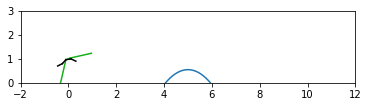

In [21]:
#animate it
try:
    import matplotlib.pyplot as plt
    import matplotlib.animation as ani
    from IPython.display import HTML
    import numpy as np
    %matplotlib inline

    fig1, ax1 = plt.subplots(1,1) #create axes
    ax1.set_aspect('equal')

    def plot_robot(i,m,ax): #update function for animation
        ax.clear()
        ax.set_xlim([-2,12])
        ax.set_ylim([0,3])
       #plot body
        body_xb = m.q[i,1,'x'].value 
        body_yb = m.q[i,1,'y'].value 
        body_xf = m.q[i,1,'x'].value + m.len[('body','T',1)]*cos(m.q[i,1,'thb'].value)
        body_yf = m.q[i,1,'y'].value + m.len[('body','T',1)]*sin(m.q[i,1,'thb'].value)  
        ax.plot([body_xb,body_xf],[body_yb,body_yf],color='xkcd:green')
    
    #plot tail
        tail_xb = body_xb
        tail_yb = body_yb
        th_tail_abs = m.q[i,1,'thb'].value + m.q[i,1,'tht'].value
        tail_xt = m.q[i,1,'x'].value - m.len[('tail','T',1)]*cos(th_tail_abs)
        tail_yt = m.q[i,1,'y'].value - m.len[('tail','T',1)]*sin(th_tail_abs)
        ax.plot([tail_xb,tail_xt],[tail_yb,tail_yt],color='xkcd:green')
    
        #plot neck
        neck_xb = body_xf
        neck_yb = body_yf
        th_neck_abs = m.q[i,1,'thb'].value + m.q[i,1,'thn'].value
        neck_xt = neck_xb + m.len[('neck','T',1)]*cos(th_neck_abs)
        neck_yt = neck_yb + m.len[('neck','T',1)]*sin(th_neck_abs)
        ax.plot([neck_xb,neck_xt],[neck_yb,neck_yt],color='xkcd:green')
    
    #plot gap

        w=0.625
        ci = 5
        Hi = 0.55
        x1 = np.linspace(0,10,100)
        y1 = -w*(x1 - ci)**2 + Hi
#     x1 = np.linspace(-5,4.354,10)
#     x2 = np.linspace(6.335,15,10)
#     y1 = sym.zeros(10)
        plt.plot(x1,y1)
#     plt.plot(x2,y1)

        for s in sides:
            if s == 'R':
                col = 'xkcd:black'
            else:
                col = 'xkcd:black'
            thA = m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value
            thAplus =  m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value+m.q[i,1,'thh2%s'%s].value
            leg1_xt = body_xb
            leg1_yt = body_yb
            leg1_xb = body_xb + m.len[('legH',s,1)]*sin(thA)
            leg1_yb = body_yb - m.len[('legH',s,1)]*cos(thA)
            ax.plot([leg1_xt,leg1_xb],[leg1_yt,leg1_yb],color=col)
    
    #plot leg 2
            leg2_xt = leg1_xb
            leg2_yt = leg1_yb
            leg2_xb = leg2_xt + m.len[('legH',s,2)]*sin(thAplus)
            leg2_yb = leg2_yt - m.len[('legH',s,2)]*cos(thAplus)
            ax.plot([leg2_xt,leg2_xb],[leg2_yt,leg2_yb],color=col)
    
    update = lambda i: plot_robot(i,m,ax1) #lambdify update function

    animate = ani.FuncAnimation(fig1,update,range(1,N+1),interval = 50,repeat=True)

    

except:
    b = 1
HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook

In [22]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
import numpy as np
import sympy as sym
%matplotlib inline
# body_base_angle_arr = [m.q[i,1,'thb']() for i in range(115,196)]
# x1  =  np.linspace(115,195,81)
# plt.xlim([115,195])
# plt.ylim([-0.5,0.5])
# plt.plot(x1,body_base_angle_arr)

# tail_angle_arr = [m.q[i,1,'tht']() for i in range(115,196)]
# x1  =  np.linspace(115,195,81)
# plt.xlim([115,195])
# plt.ylim([-1.6,0.6])
# plt.plot(x1,tail_angle_arr)
# plt.title('Tail and Body-base angles whilst airborn')
# plt.xlabel('N')
# plt.legend([r'Body-Base Angle',r'$Tail Angle$'])
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),&nbsp; shadow=True, ncol=2)

body_base_angle_arr = [m.q[i,1,'thb']() for i in range(115,196)]
tail_angle_arr = [m.q[i,1,'tht']() for i in range(115,196)]
y = body_base_angle_arr
y2 = tail_angle_arr
x  =  np.linspace(115,195,81)
fig = plt.figure(figsize=(20,10))
plt.xlim([115,195])
plt.ylim([-1.6,0.6])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('N',fontsize=22)
plt.ylabel('angle (radians)', fontsize=22)
plt.plot(x, y, label='Body-Base Angle')
plt.plot(x, y2, label='tail angle')
plt.title('Tail and Body-base angles whilst airborn for actuated tail', fontsize=25)
plt.legend([r'Body-Base Angle',r'$Tail Angle$'])
plt.legend(loc='center left', fontsize=25)








KeyError: "Index '(115, 1, 'thb')' is not valid for indexed component 'q'"

In [ ]:
m.ddq.pprint()

In [ ]:
m.q.pprint()

In [ ]:
   
# Torque_leg1L_arr = [m.tau_a[i,'thh1L']() for i in range(1,N+1)]
# for n in range(0,N):
#     Torque_leg1L_arr[n] = Torque_leg1L_arr[n]*Torque_leg1L_arr[n] 
# Torque_leg2L_arr = [m.tau_a[i,'thh2L']() for i in range(1,N+1)]
# for n in range(0,N):
#     Torque_leg2L_arr[n] = Torque_leg2L_arr[n]*Torque_leg2L_arr[n]  
# Torque_leg1R_arr = [m.tau_a[i,'thh1R']() for i in range(1,N+1)]
# for n in range(0,N):
#     Torque_leg1R_arr[n] = Torque_leg1R_arr[n]*Torque_leg1R_arr[n]
    
# Torque_leg2R_arr = [m.tau_a[i,'thh2R']() for i in range(1,N+1)]
# for n in range(0,N):
#     Torque_leg2R_arr[n] = Torque_leg2R_arr[n]*Torque_leg2R_arr[n]

# for n in range(0,N):
#     Torque_legs_arr[n] = Torque_leg2R_arr[n]+Torque_leg1R_arr[n]+Torque_leg1L_arr[n]+Torque_leg2L_arr[n]

    
# Torque_neck_arr = [m.tau_a[i,'thn']() for i in range(1,N+1)]
# for n in range(0,N):
#     Torque_neck_arr[n] = Torque_neck_arr[n]*Torque_neck_arr[n]
                                                               
# for n in range(0,N):
#     Torque_total_arr[n] = Torque_neck_arr[n]+Torque_legs_arr[n]
        
        
# ypos_arr = [m.q[i,1,'y']() for i in range(1,N+1)]
# xpos_arr = [m.q[i,1,'x']() for i in range(1,N+1)]

# for n in range(0,N):
#     xpos_arr[n] = xpos_arr[n]*0.1

# sum_torque = 0
# for n in range(0,N):
#     sum_torque += Torque_total_arr[n]

# nar = np.linspace(1,N,N)
# plt.figure(figsize=(10, 6))
# plt.subplot(2,1,1)
# plt.step(nar, Torque_legs_arr)
# plt.step(nar, ypos_arr)
# plt.step(nar, xpos_arr)
# plt.title('total torques vs y_pos')
# plt.xlabel('N')
# plt.legend([r'$totaltorque$',r'$y_pos'])
# plt.grid(True)

# plt.subplot(2,1,2)
# plt.step(nar, Torque_total_arr)
# plt.step(nar, ypos_arr)
# plt.step(nar, xpos_arr)
# plt.title('leg torques vs y_pos')
# plt.xlabel('N')
# plt.legend([r'$totaltorque$',r'$y_pos'])
# plt.grid(True)


# # plt.figure(figsize=(10, 6))
# # plt.subplot(3,1,1)
# # plt.step(nar, F_BFxar,where='post')
# # plt.step(nar, F_FFxar,where='post')
# # plt.title('Applied Forces (x)')
# # plt.xlabel('N')
# # plt.legend([r'$F_{BFx}$',r'$F_{FFx}$'])
# # plt.grid(True)
# # 
# # plt.subplot(3,1,2)
# # plt.step(nar, F_BFyar,where='post')
# # plt.step(nar, F_FFyar,where='post')
# # plt.title('Applied Forces (y)')
# # plt.xlabel('N')
# # plt.legend([r'$F_{BFy}$',r'$F_{FFy}$'])
# # plt.grid(True)

In [ ]:
# infile = open('5','rb')
# data = pkl.load(infile)
# infile.close()


# # data.update({('q',dof): [m.q[n,p,dof].value for n in range(2,N+1) for p in range(1,P+1)]})

# # infile = open('Raptor - 2seg -unactuated tail','rb')
# # data = pkl.load(infile)
# # infile.close()

# # EOMs = data['EOM']
# # p_footh_s = data['pfooth']
# # v_footh_s = data['vfooth']

In [ ]:
# infile2 = open('2','rb')
# data2 = pkl.load(infile2)
# infile.close()
# data2

In [ ]:
# torque_sum = 0
# for n in range(1,N+1):
#     for j in jointsACT:
#             torque_sum += m.tau_a[n,j]**2
# torque_sum

In [ ]:
# infile2 = open('108','rb')
# data2 = pkl.load(infile2)
# infile.close()
# data2
